In [1]:
# https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231

In [2]:
# https://www.kaggle.com/shadiandisheh/project-of-datascience-homecreditdefaultrisk

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from pickle import load
from pickle import dump
from myTools import *
import datetime
import warnings


# Bagging
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

# Random forest
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Gradient boost
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.ensemble import IsolationForest
#IsolationForest(contamination=0.01)

In [3]:
dfApplication = load(open('dfApplicationReduced.pkl','rb'))
#dfApplication = shuffleDf(dfApplication).reset_index(drop=True)[0:100000]

# Optimisation des paramètres

In [5]:
def evaluate(model, data_transform, title):

    if data_transform == 'DF':
        meanImputer = []
        iterativeImputer = []
        mostFrequentImputer = []
        constantImputer = {}
        power = []
        quantile = []
        kbins10 = []
        kbins50 = []
        kbins100 = []
        minmax = []
        standard = []
        robust =[]
        noScale = []
        ordinal = []
        onehot = []
    elif data_transform == 'RF':
        meanImputer = []
        iterativeImputer = []
        mostFrequentImputer = ['PREV_NAME_CONTRACT_STATUS','PREV_NAME_PRODUCT_TYPE','NAME_TYPE_SUITE','PREV_WEEKDAY_APPR_PROCESS_START','NAME_FAMILY_STATUS','CODE_GENDER','NAME_CONTRACT_TYPE','PREV_NAME_GOODS_CATEGORY']
        constantImputer = {}
        power = []
        quantile = ['INSTALPAYMT_DIFF_DAYS_INSTALLMENT_PAYMENT_NEG']
        kbins10 = ['PREV_RATE_INTEREST_PRIMARY','CREDCARD_AMT_DRAWINGS_ATM_CURRENT']
        kbins50 = ['BURO_DAYS_CREDIT_UPDATE','BURO_DAYS_ENDDATE_FACT','POSCASH_CNT_INSTALMENT_FUTURE']
        kbins100 = ['CREDCARD_AMT_TOTAL_RECEIVABLE','CREDCARD_CNT_INSTALMENT_MATURE_CUM','BURO_AMT_ANNUITY']
        minmax = []
        standard = ['PREV_DAYS_FIRST_DRAWING','POSCASH_CNT_INSTALMENT_FUTURE','CREDCARD_AMT_BALANCE','AMT_CREDIT']
        robust = ['PREV_NFLAG_INSURED_ON_APPROVAL']
        noScale = ['NAME_CONTRACT_TYPE','PREV_NAME_CONTRACT_TYPE','NAME_FAMILY_STATUS','BURO_CREDIT_CURRENCY','PREV_NAME_GOODS_CATEGORY','NAME_TYPE_SUITE','PREV_WEEKDAY_APPR_PROCESS_START']
        ordinal = []
        onehot = ['PREV_NAME_GOODS_CATEGORY','PREV_WEEKDAY_APPR_PROCESS_START','NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE']#,'PREV_NAME_PRODUCT_TYPE','PREV_NAME_CONTRACT_TYPE']
    elif data_transform == 'XG':
        meanImputer = []
        iterativeImputer = []
        mostFrequentImputer = []
        constantImputer = {}
        power = []
        quantile = []
        kbins10 = []
        kbins50 = ['POSCASH_CNT_INSTALMENT']
        kbins100 = ['CREDCARD_AMT_DRAWINGS_ATM_CURRENT','PREV_HOUR_APPR_PROCESS_START']
        minmax = []
        standard = []
        robust =[]
        noScale = []
        ordinal = []
        onehot = ['NAME_TYPE_SUITE','CODE_GENDER']   
        
    return evaluateRocPrCurves(dfApplication, 
                                target='TARGET', 
                                identifier='SK_ID_CURR', 
                                meanImputer=meanImputer, iterativeImputer=iterativeImputer, mostFrequentImputer=mostFrequentImputer, constantImputer=constantImputer,
                                power=power, quantile=quantile, kbins10=kbins10,kbins50=kbins50, kbins100=kbins100,
                                minmax=minmax, standard=standard, robust=robust, noScale=noScale,
                                ordinal=ordinal, onehot=onehot,
                                model=model,
                                display_plot=False,
                                title_plot = title,
                                cv=10)

In [11]:
results = []

# Random forests

## max_depth

### sklearn random forest

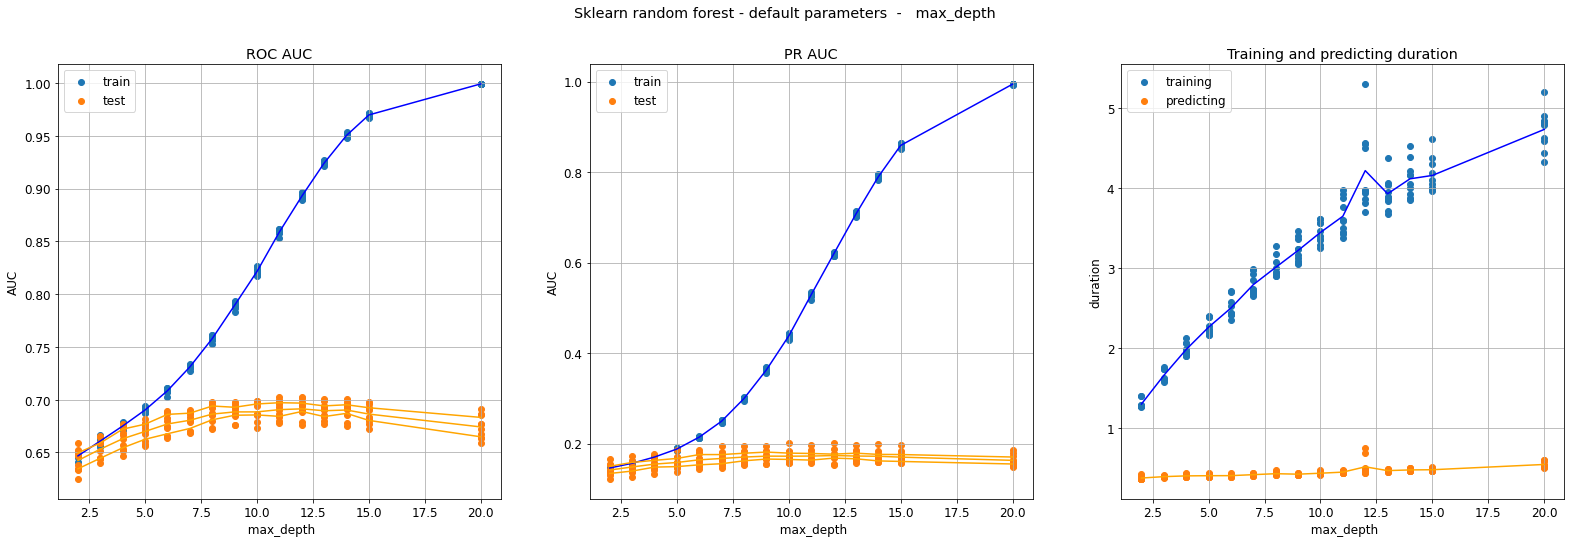

In [17]:
results_tmp = []
lst = [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=param_value, n_jobs=-1)
    title = 'Sklearn random forest - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### imbalanced random forest

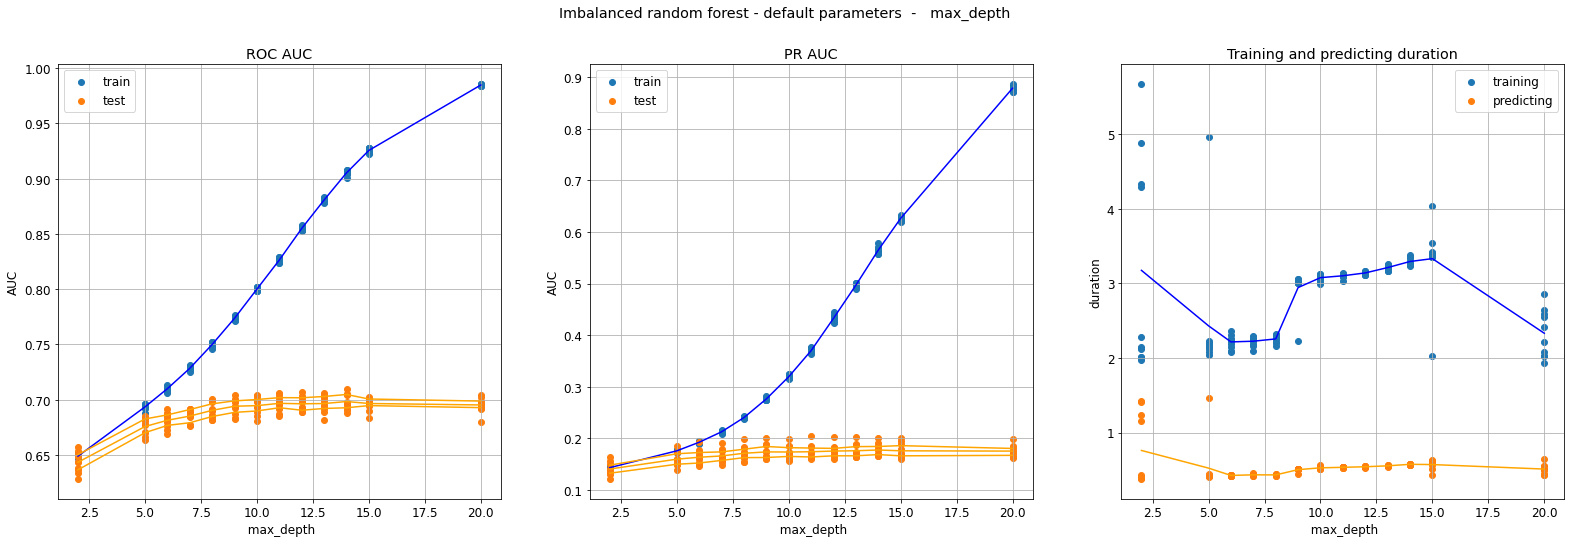

In [22]:
results_tmp = []
lst = [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]
for param_value in lst:
    print(param_value)
    model = BalancedRandomForestClassifier(max_depth=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## max_features

### sklearn random forest

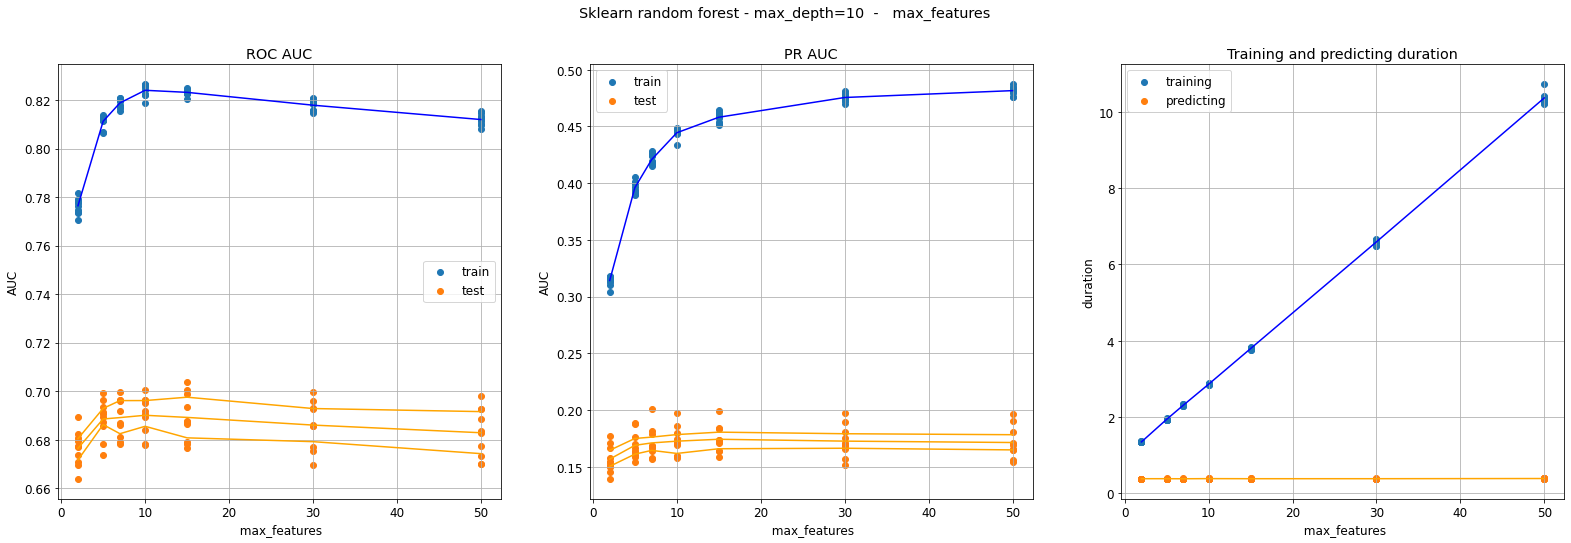

In [24]:
results_tmp = []
lst = [2, 5, 7, 10, 15, 30, 50]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=10, max_features=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10 |  max_features = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

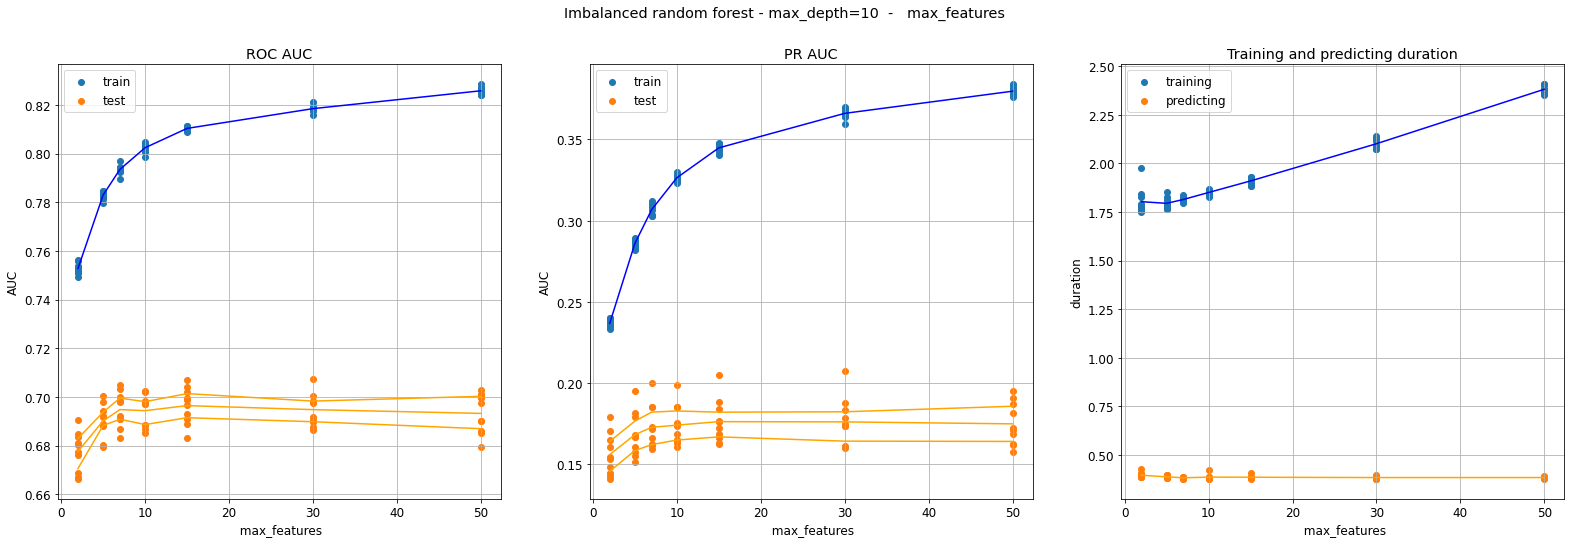

In [26]:
results_tmp = []
lst = [2, 5, 7, 10, 15, 30, 50]
for param_value in lst:
    print(param_value)
    model = BalancedRandomForestClassifier(max_depth=10, max_features=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10 |  max_features = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## min_samples_leaf

### sklearn random forest

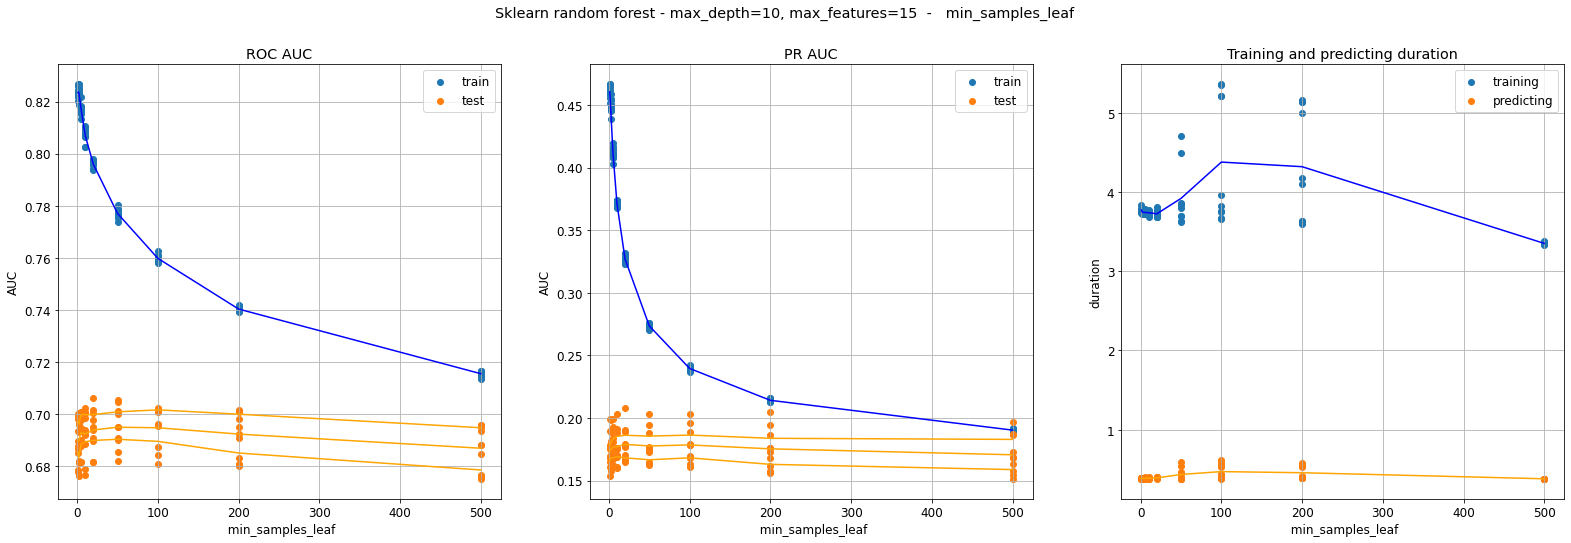

In [29]:
results_tmp = []
lst = [1, 5, 10, 20, 50, 100, 200, 500]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=15 |  min_samples_leaf = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### imbalanced random forest

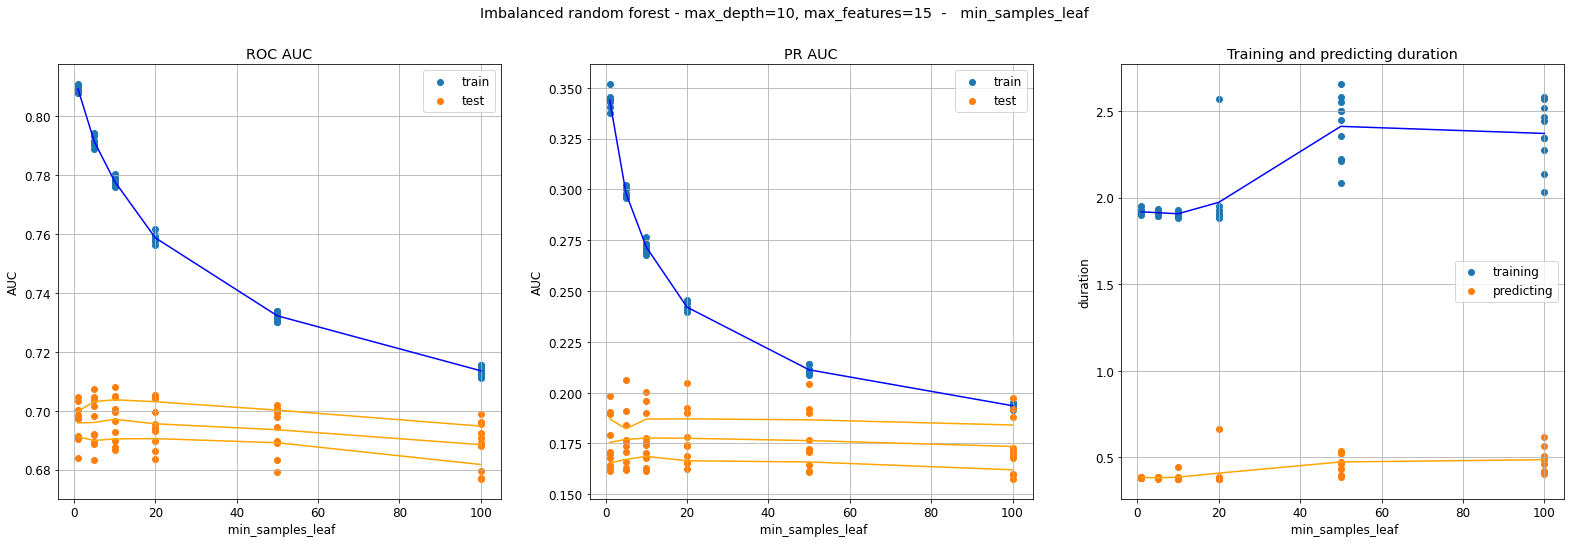

In [32]:
results_tmp = []
lst = [1, 5, 10, 20, 50, 100]
for param_value in lst:
    print(param_value)
    model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=15 |  min_samples_leaf = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## min_samples_split

### sklearn random forest

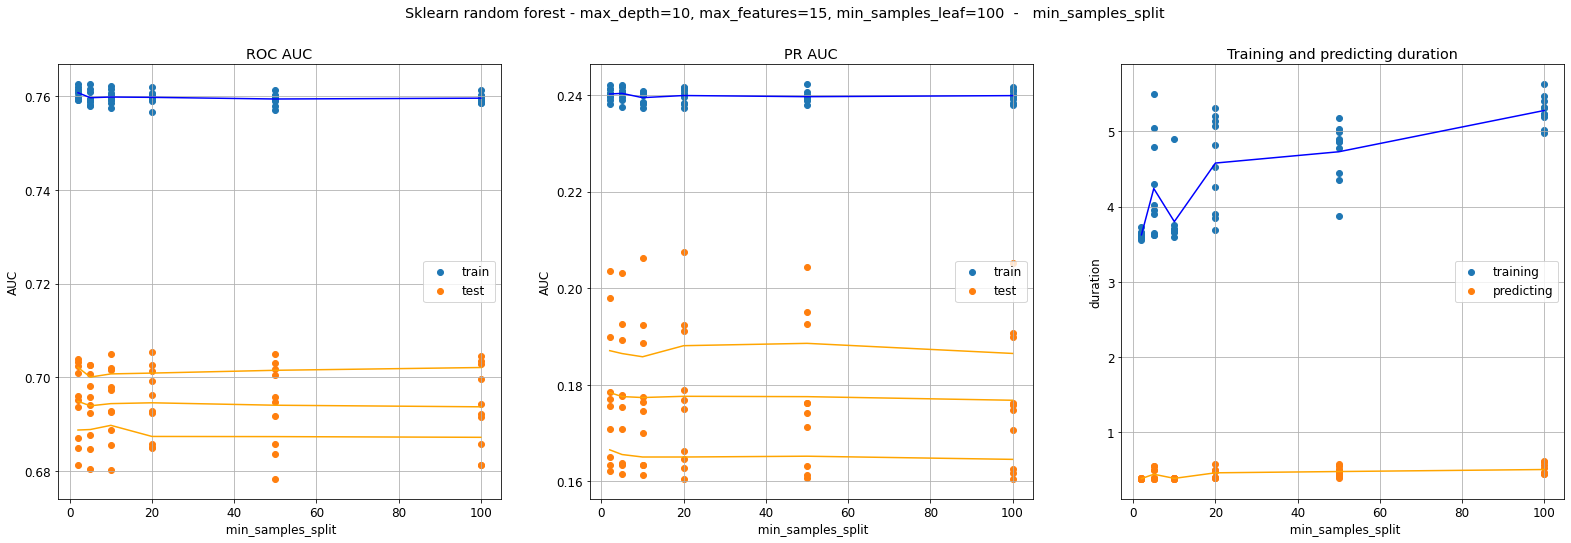

In [35]:
results_tmp = []
lst = [2, 5, 10, 20, 50, 100]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100 |  min_samples_split = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

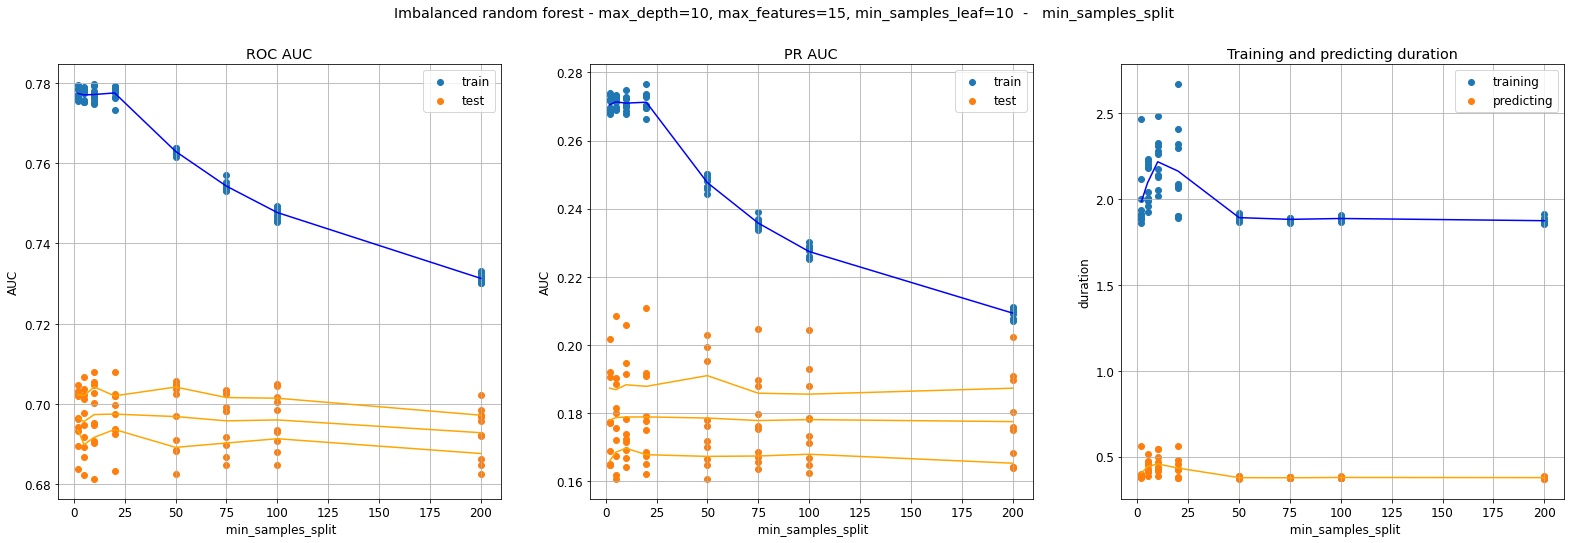

In [41]:
results_tmp = []
lst = [2, 5, 10, 20, 50, 75, 100, 200]
for param_value in lst:
    print(param_value)
    model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10 |  min_samples_split = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Criterion

### sklearn random forest

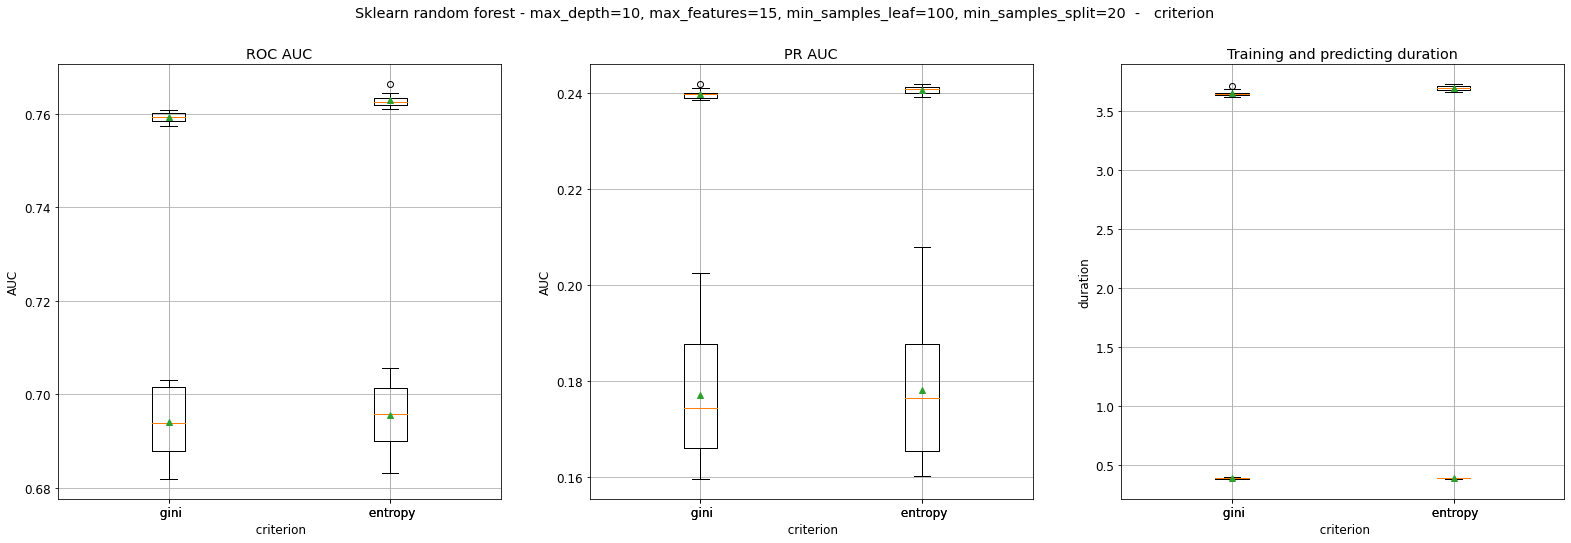

In [38]:
results_tmp = []

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='gini', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20 |  criterion = gini'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20 |  criterion = entropy'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

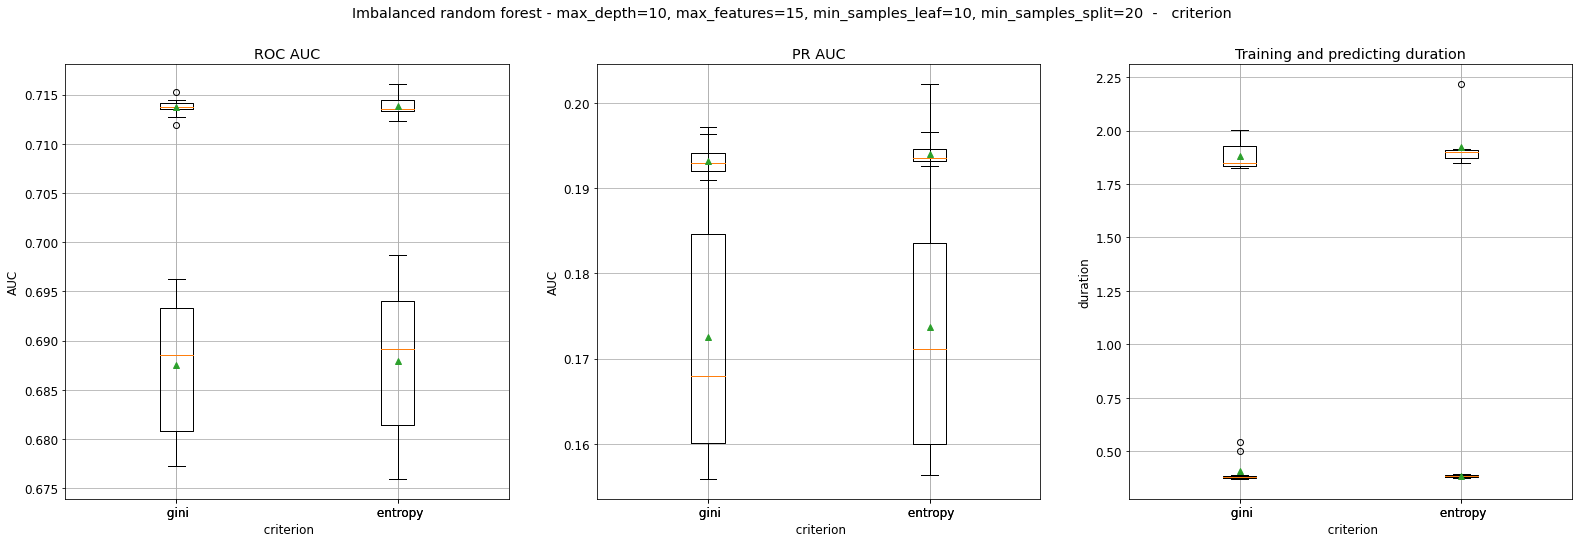

In [42]:
results_tmp = []

model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='gini', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20 |  criterion = gini'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20 |  criterion = entropy'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## class_weight

### sklearn random forest

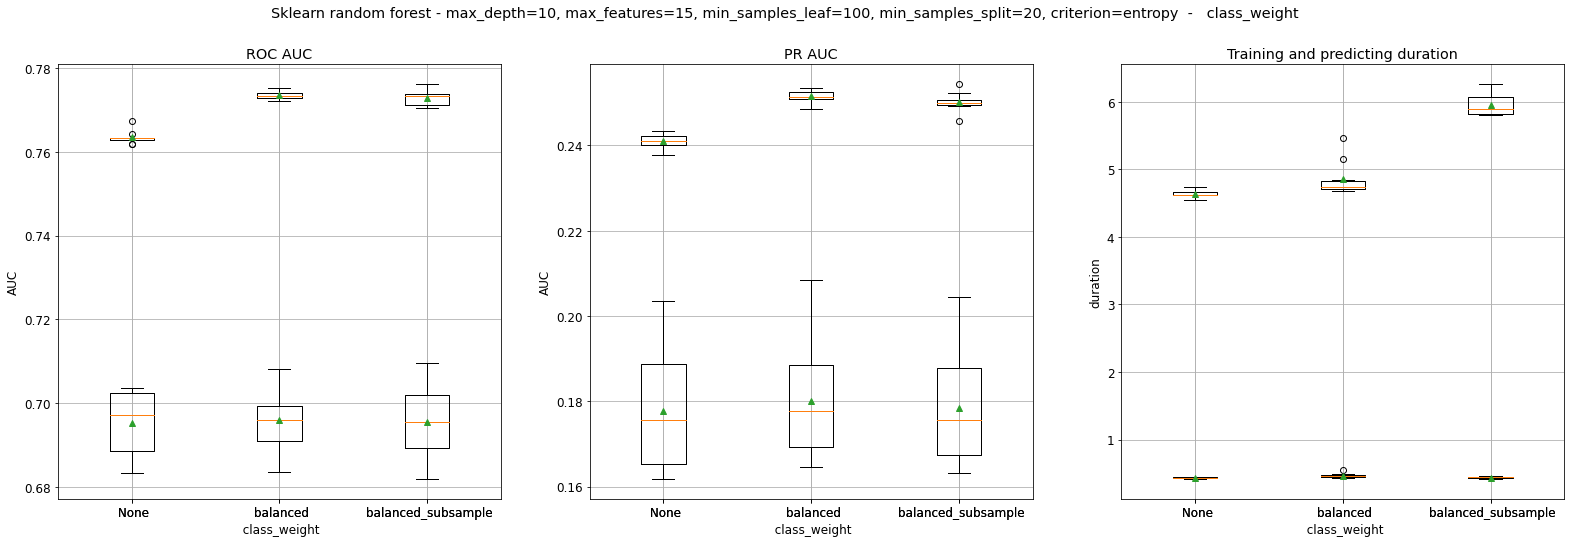

In [43]:
results_tmp = []

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy |  class_weight = None'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy |  class_weight = balanced'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced_subsample', n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy |  class_weight = balanced_subsample'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

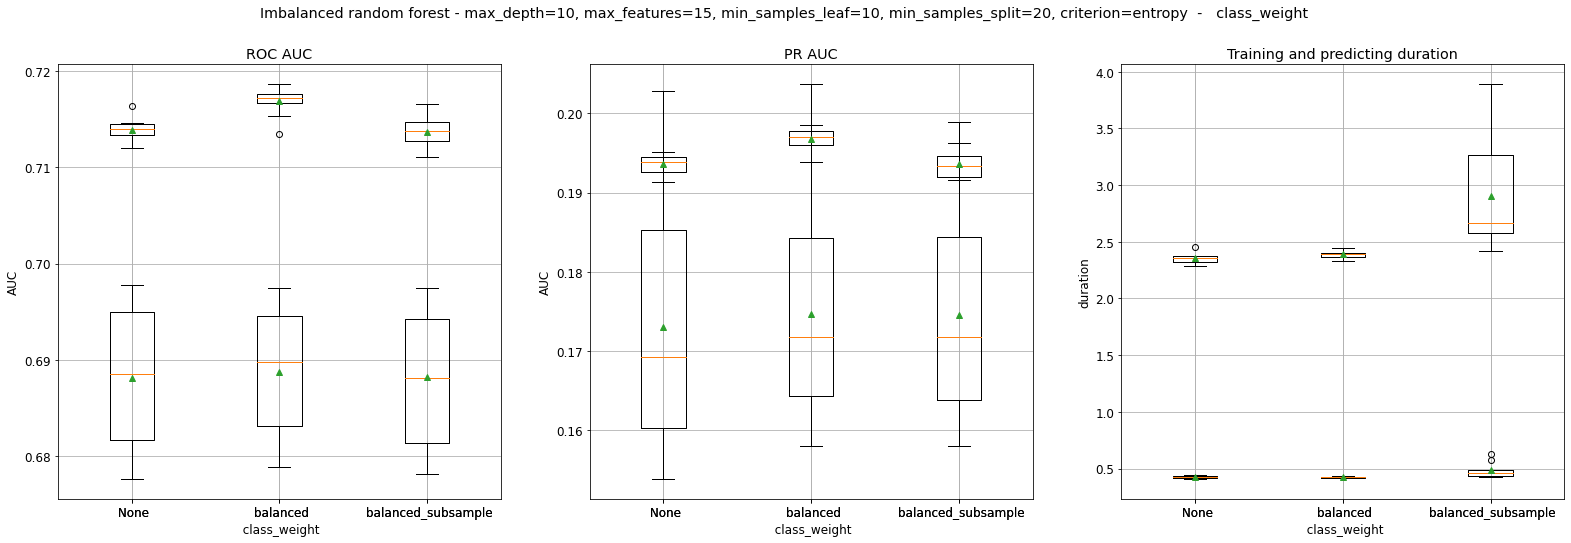

In [44]:
results_tmp = []

model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy |  class_weight = None'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy |  class_weight = balanced'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy', class_weight = 'balanced_subsample', n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy |  class_weight = balanced_subsample'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## Bootstrap

### sklearn random forest

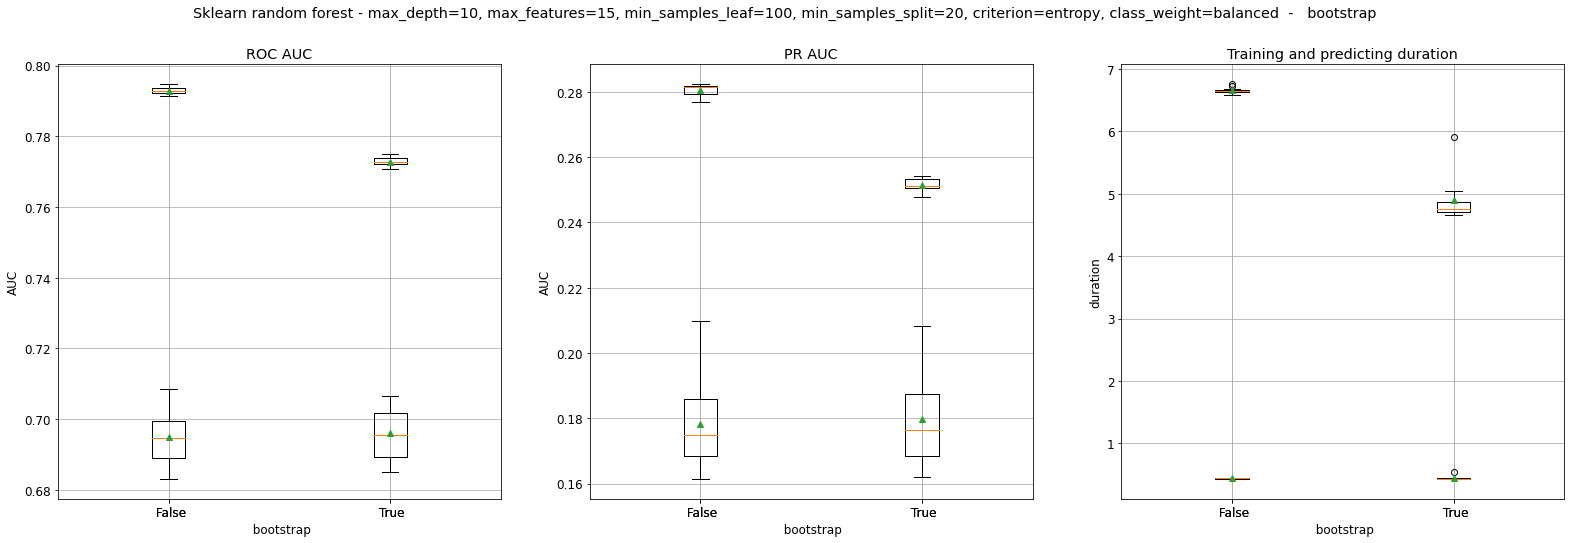

In [46]:
results_tmp = []

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=False, n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight=balanced |  bootstrap = False'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, n_jobs=-1)
title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight=balanced |  bootstrap = True'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

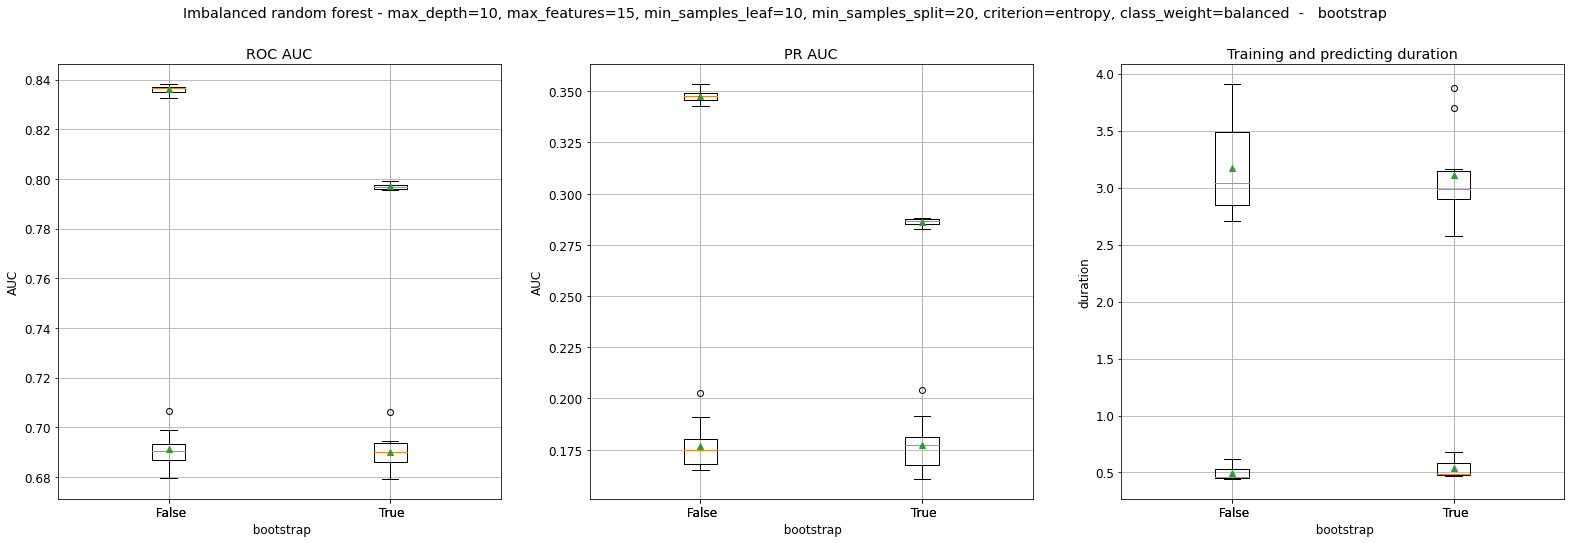

In [47]:
results_tmp = []

model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=False, n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight=balanced |  bootstrap = False'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, n_jobs=-1)
title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight=balanced |  bootstrap = True'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## max_samples

### sklearn random forest

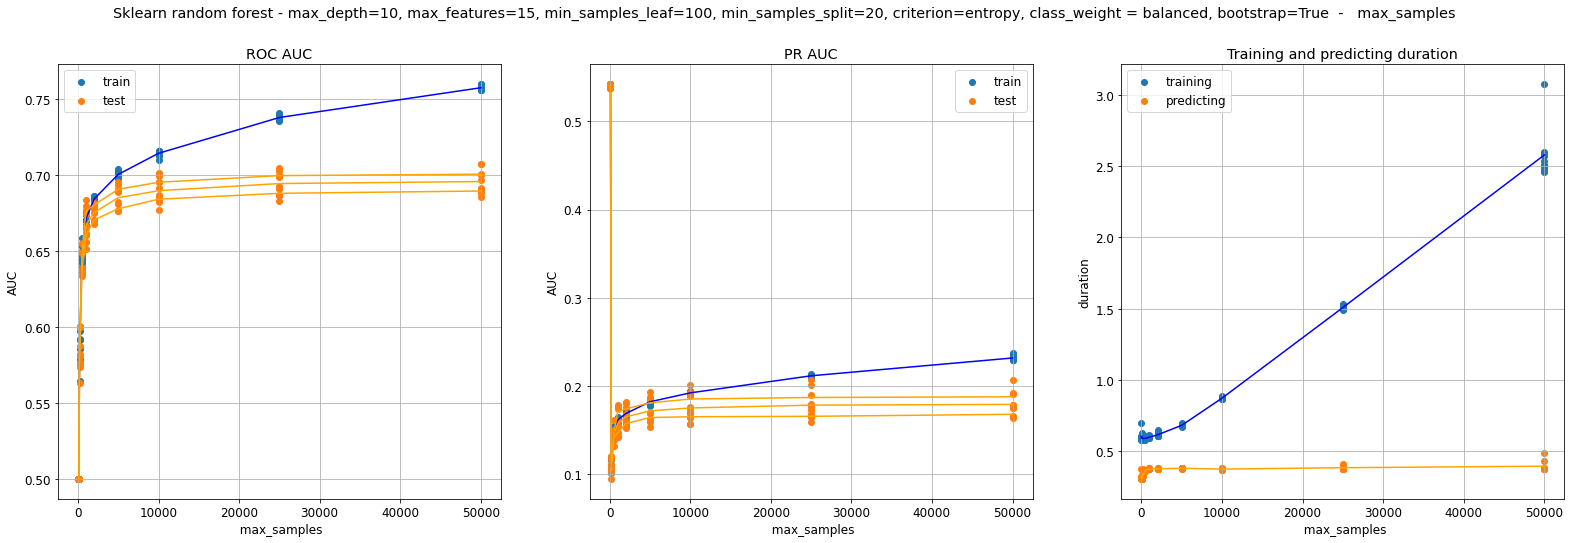

In [57]:
results_tmp = []
lst = [2, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 25000, 50000]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True |  max_samples = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Imbalanced random forest

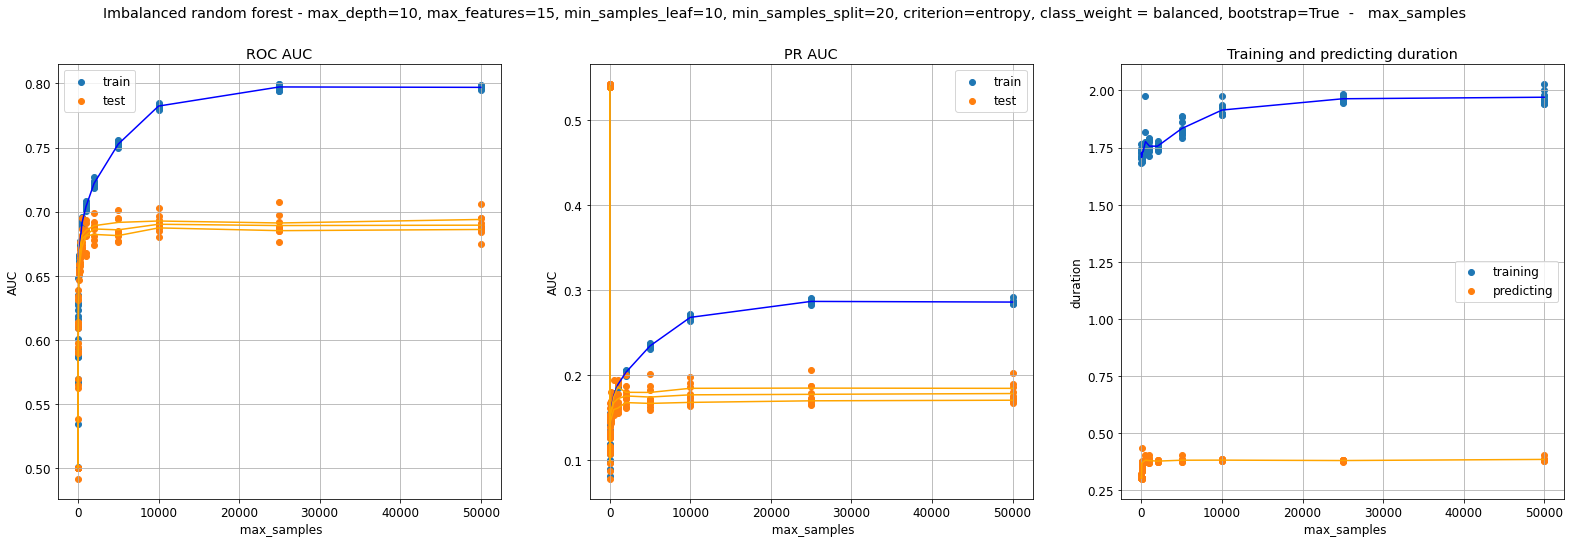

In [59]:
results_tmp = []
lst = [2, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 25000, 50000]
for param_value in lst:
    print(param_value)
    model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True |  max_samples = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## max_leaf_nodes

### sklearn random forest

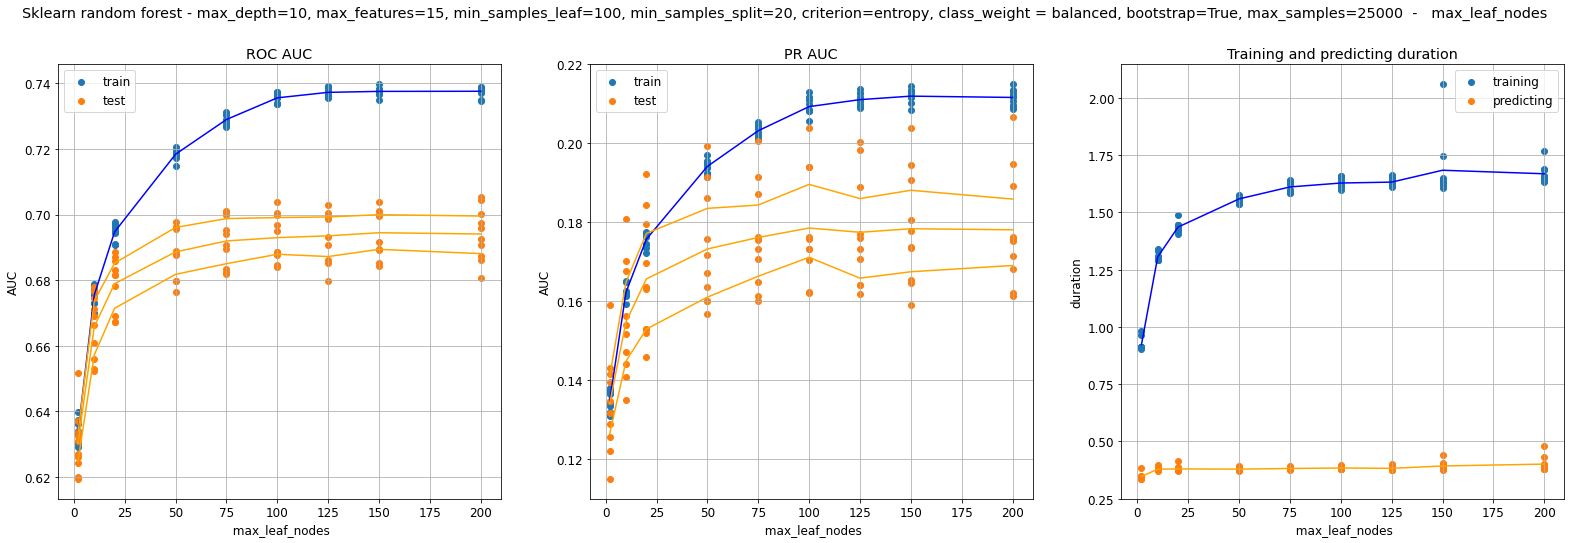

In [64]:
results_tmp = []
lst = [2, 10, 20, 50, 75, 100, 125, 150, 200]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True, max_samples=25000 |  max_leaf_nodes = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

2
10
20
50
75
100
125
150
200


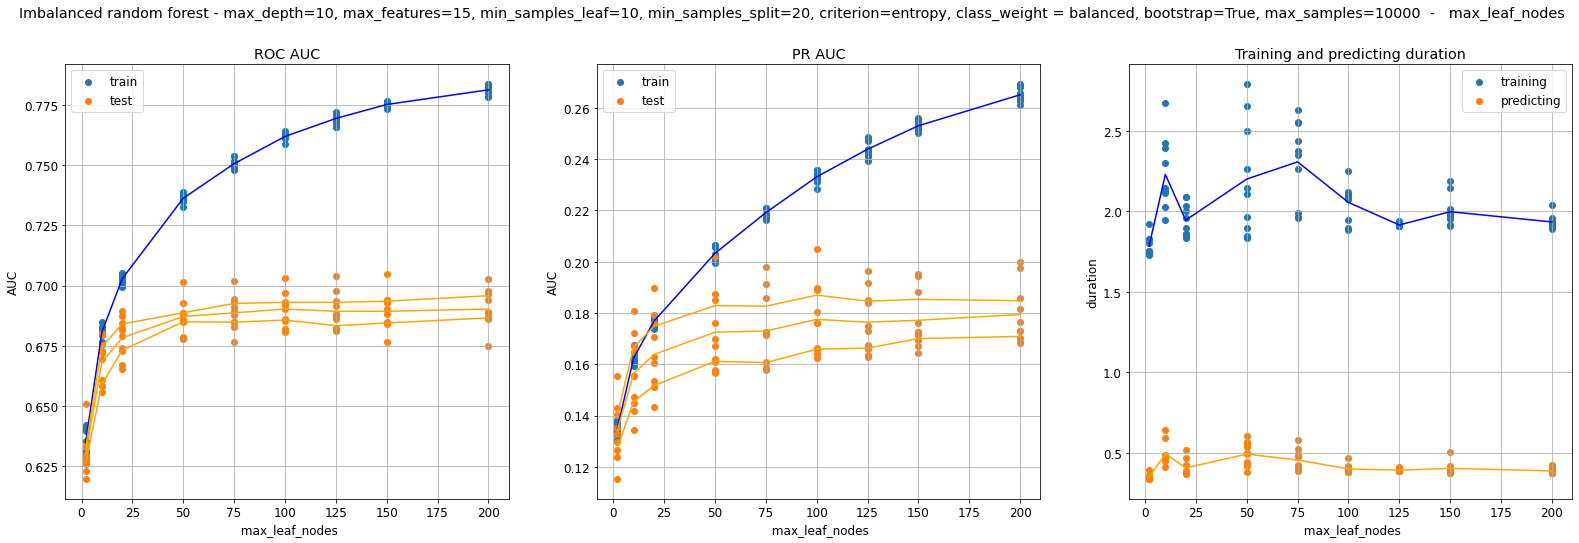

In [65]:
results_tmp = []
lst = [2, 10, 20, 50, 75, 100, 125, 150, 200]
for param_value in lst:
    print(param_value)
    model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=10000, max_leaf_nodes=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True, max_samples=10000 |  max_leaf_nodes = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimators

### sklearn random forest

10
25
50
100
150
200
350
500
800


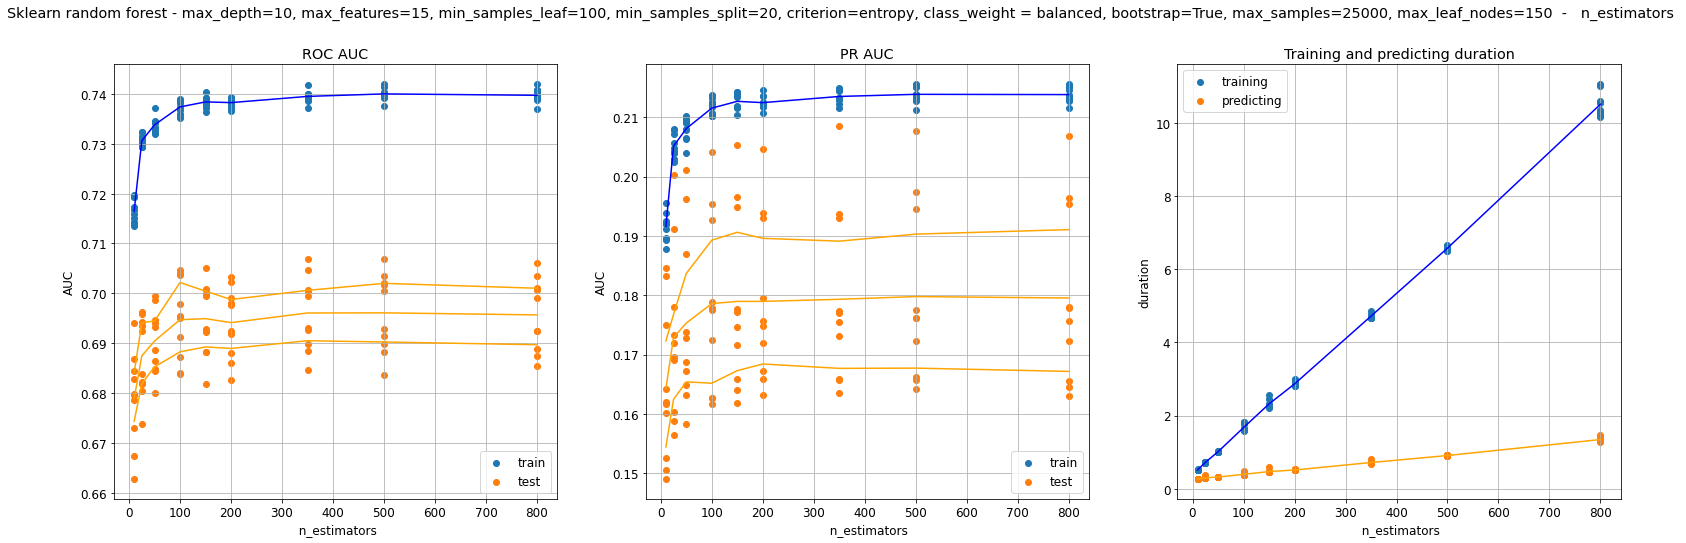

In [67]:
results_tmp = []
lst = [10, 25, 50, 100, 150, 200, 350, 500, 800]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True, max_samples=25000, max_leaf_nodes=150 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

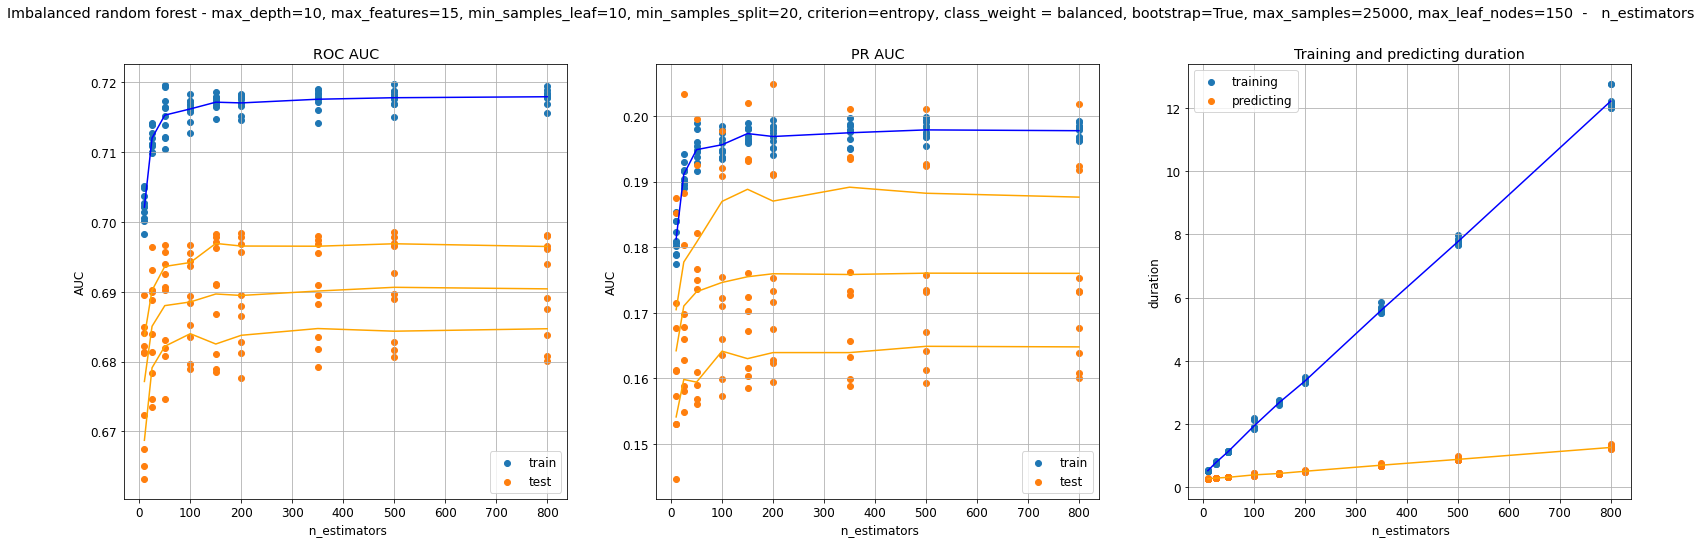

In [69]:
results_tmp = []
lst = [10, 25, 50, 100, 150, 200, 350, 500, 800]
for param_value in lst:
    print(param_value)
    model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=param_value, n_jobs=-1)
    title = 'Imbalanced random forest - max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion=entropy, class_weight = balanced, bootstrap=True, max_samples=25000, max_leaf_nodes=150 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

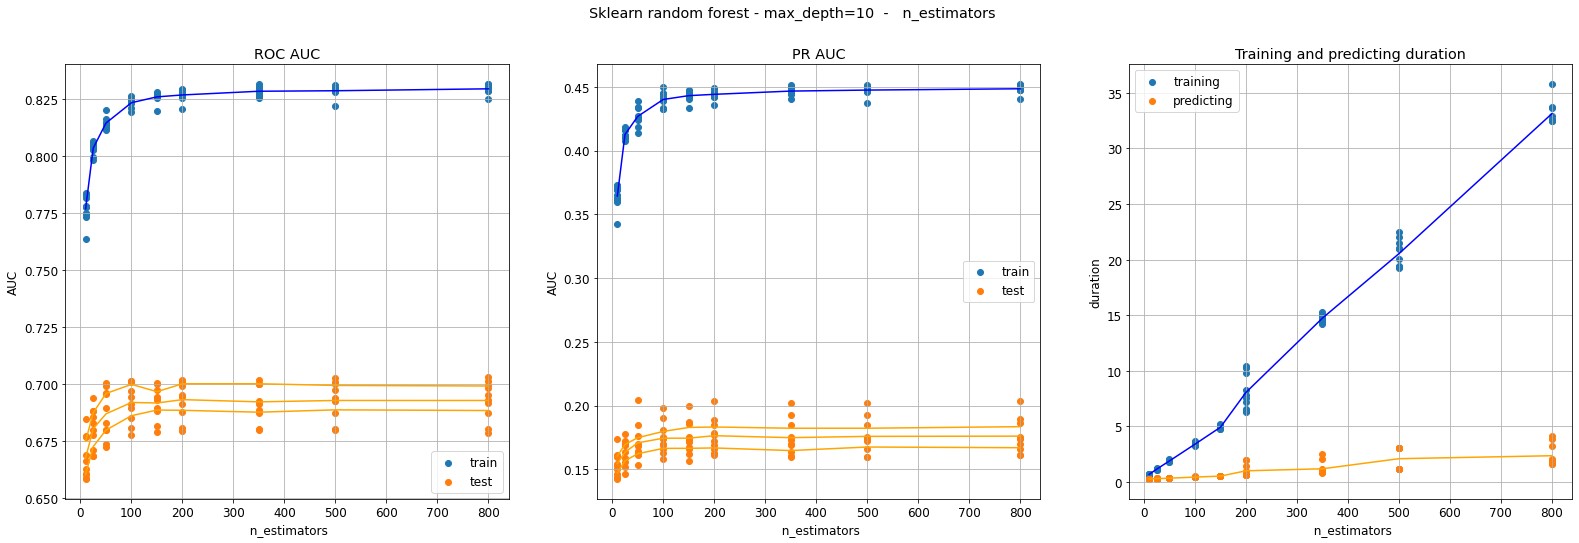

In [20]:
results_tmp = []
lst = [10, 25, 50, 100, 150, 200, 350, 500, 800]
for param_value in lst:
    print(param_value)
    model = RandomForestClassifier(max_depth=10, n_estimators=param_value, n_jobs=-1)
    title = 'Sklearn random forest - max_depth=10 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title = title, data_transform='RF')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Métriques finales random forest

In [73]:
bestmetricsRF = []

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=500, n_jobs=-1)
data_transform = 'RF'
title = 'sklearn random forest'
bestmetricsRF.append(evaluate(model, data_transform, title))
         
model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=500, n_jobs=-1)
data_transform = 'RF'
title = 'imbalanced random forest'
bestmetricsRF.append(evaluate(model, data_transform, title))
         
pd.concat(bestmetricsRF).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

title  roc_auc_train  roc_auc_test  pr_auc_train  \
0     sklearn random forest       0.739903      0.695801      0.213999   
1  imbalanced random forest       0.791485      0.693919      0.271501   

   pr_auc_test  time_train  time_pred  nb_feat  nb_train     timestamp  
0     0.179758   13.119897   1.575041       50     90000  1.615313e+09  
1     0.180870   17.570057   1.620073       50     90000  1.615313e+09

# Gradient boosting

## Max depth

### sklearn gradient boosting

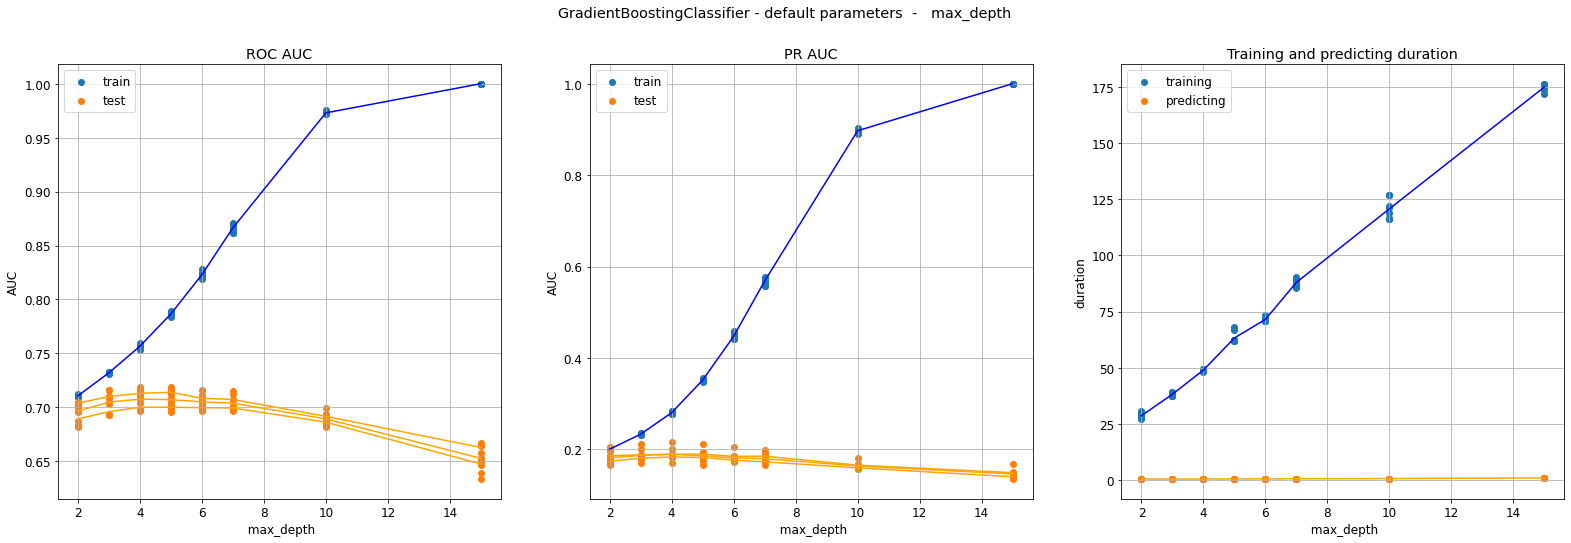

In [26]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 10, 15, 25]
for param_value in lst:
    print(param_value)
    model = GradientBoostingClassifier(max_depth=param_value)
    title = 'GradientBoostingClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### LGBMClassifier

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

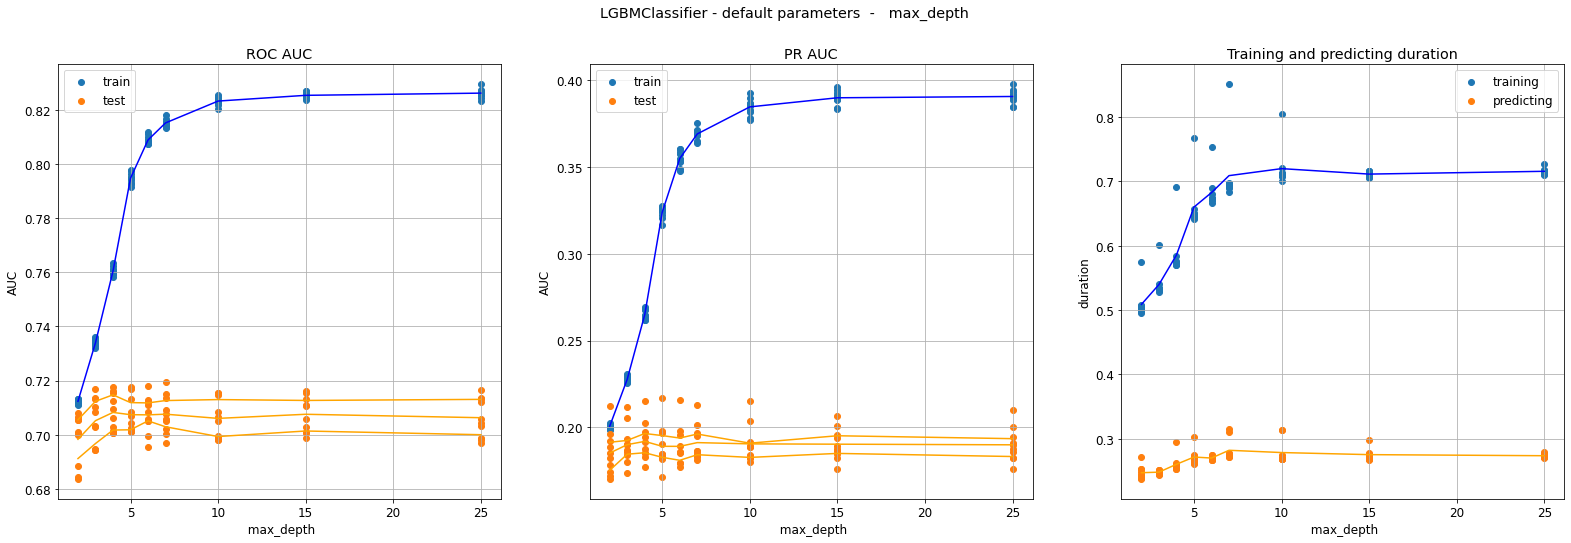

In [25]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 10, 15, 25]
for param_value in lst:
    model = LGBMClassifier(max_depth=param_value, n_jobs=-1)
    title = 'LGBMClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### XG Boost

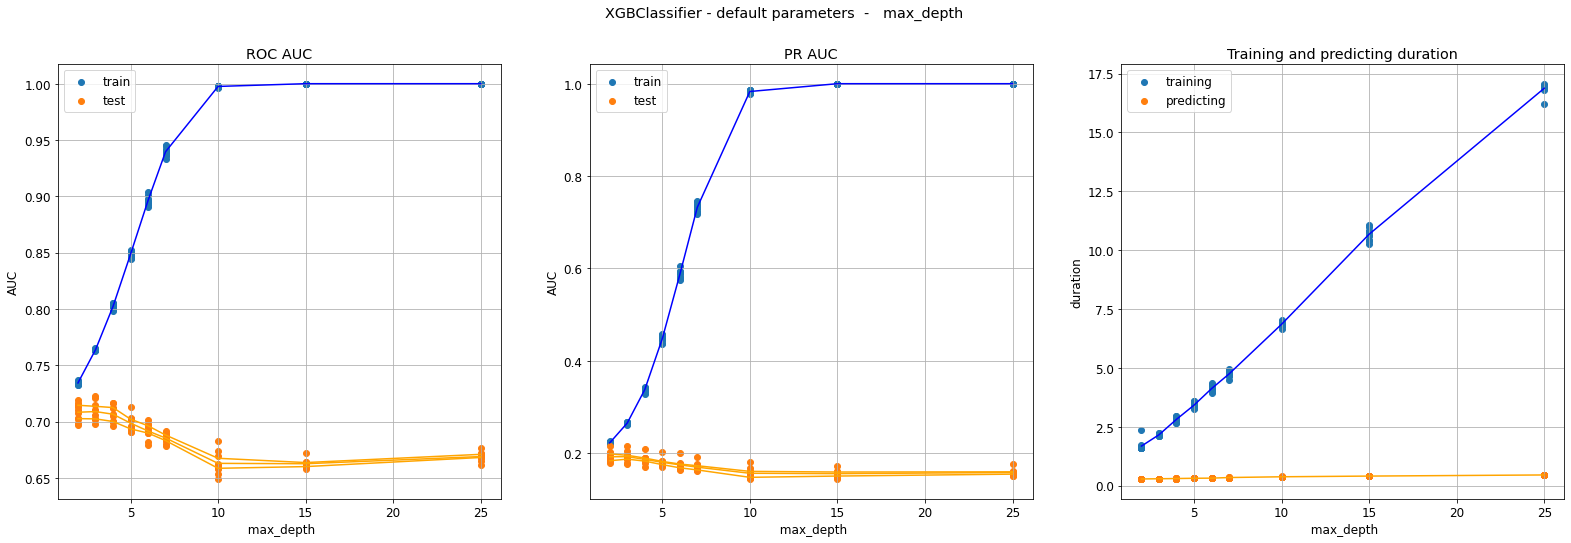

In [29]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 10, 15, 25]
for param_value in lst:
    model = XGBClassifier(max_depth=param_value)
    title = 'XGBClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## learning_rate

### LGBMClassifier

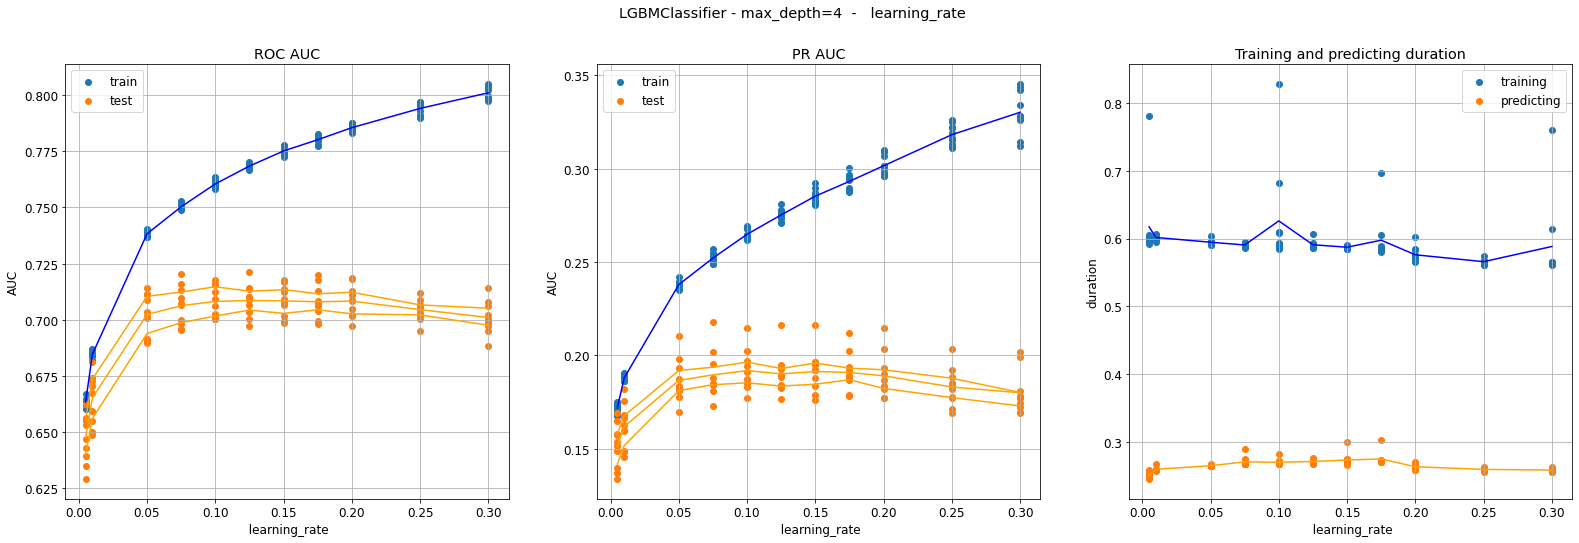

In [24]:
results_tmp = []
lst = [0.005, 0.01, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4 |  learning_rate = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### XG Boost

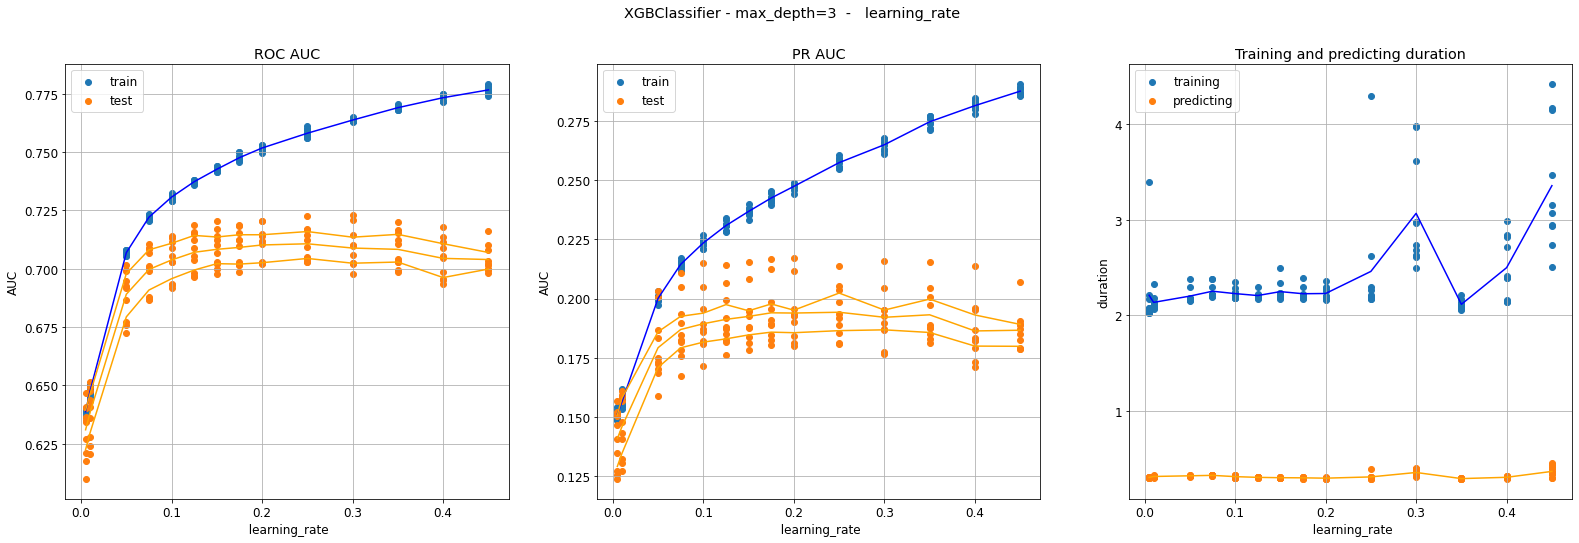

In [20]:
#results_tmp = []
lst = [0.005, 0.01, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25, 0.3]
lst = [0.35, 0.4, 0.45]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=param_value)
    title = 'XGBClassifier - max_depth=3 |  learning_rate = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Specific XGBoost

### gamma

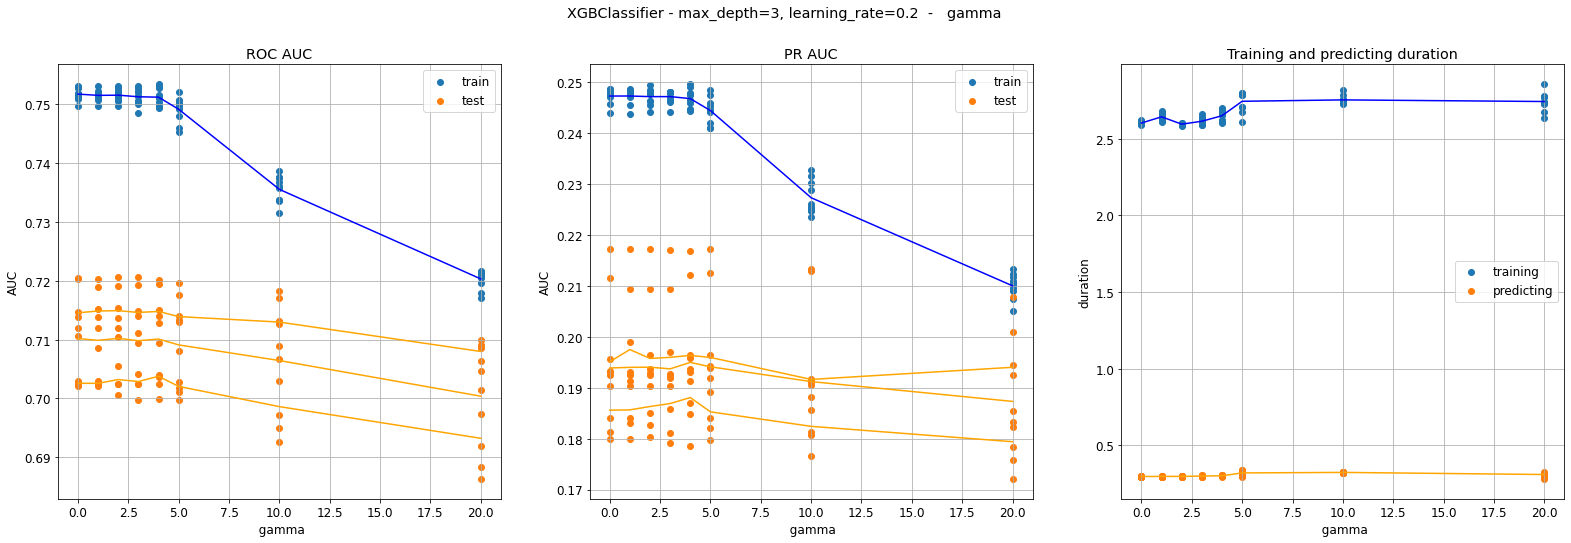

In [52]:
results_tmp = []
lst = [0, 1, 2, 3, 4, 5, 10, 20]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.2, gamma=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.2 |  gamma = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_child_weight

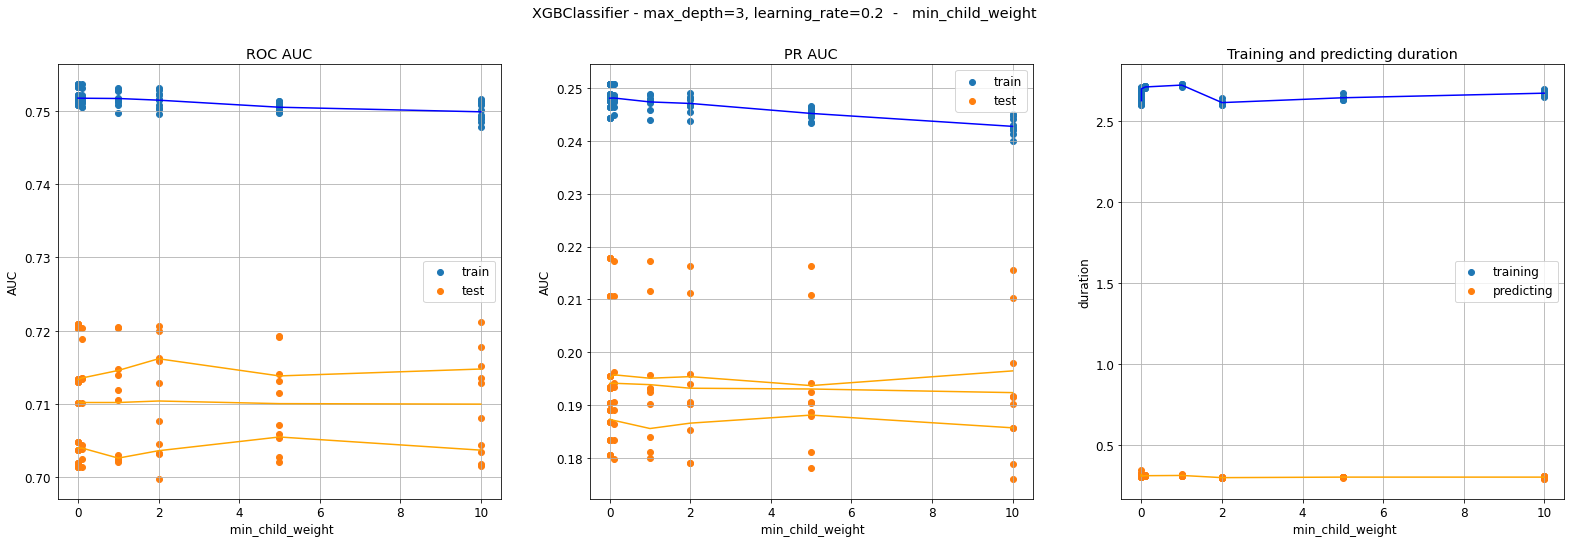

In [54]:
results_tmp = []
lst = [0, 0.00001, 0.0001, 0.001, 0.1, 1, 2, 5, 10]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.2, min_child_weight=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.2 |  min_child_weight = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### max_delta_step

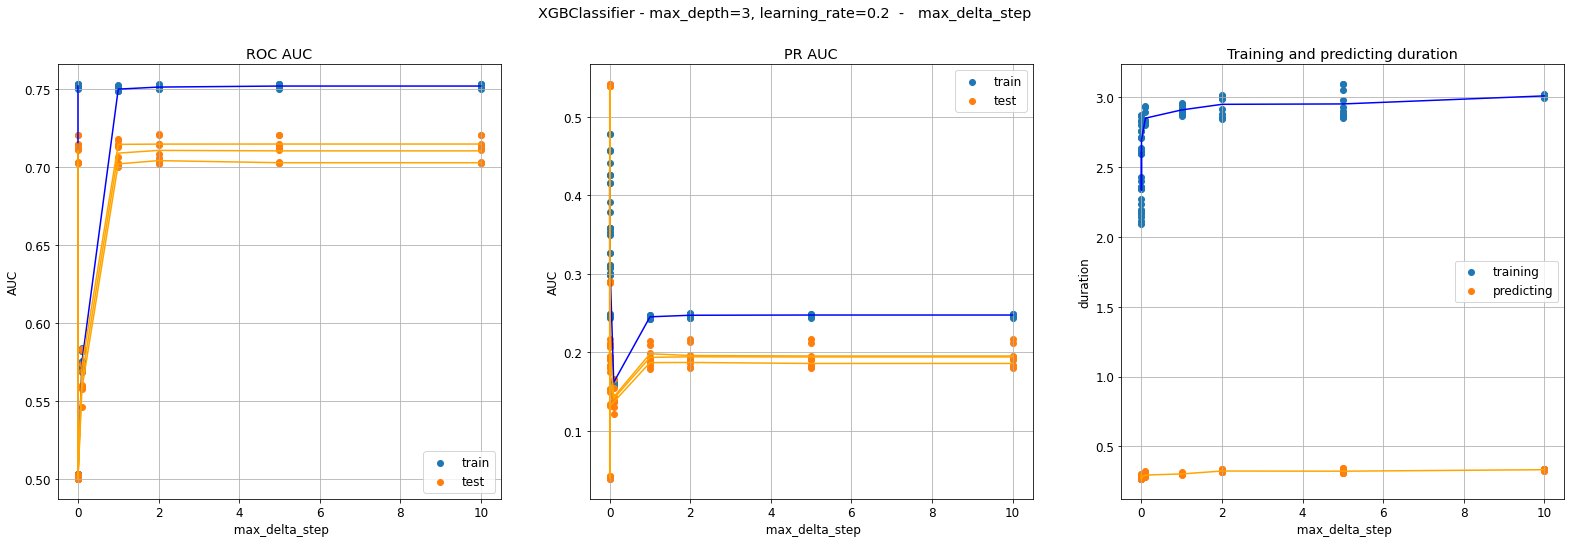

In [55]:
results_tmp = []
lst = [0, 0.00001, 0.0001, 0.001, 0.1, 1, 2, 5, 10]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.2, max_delta_step=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.2 |  max_delta_step = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### eval_metric

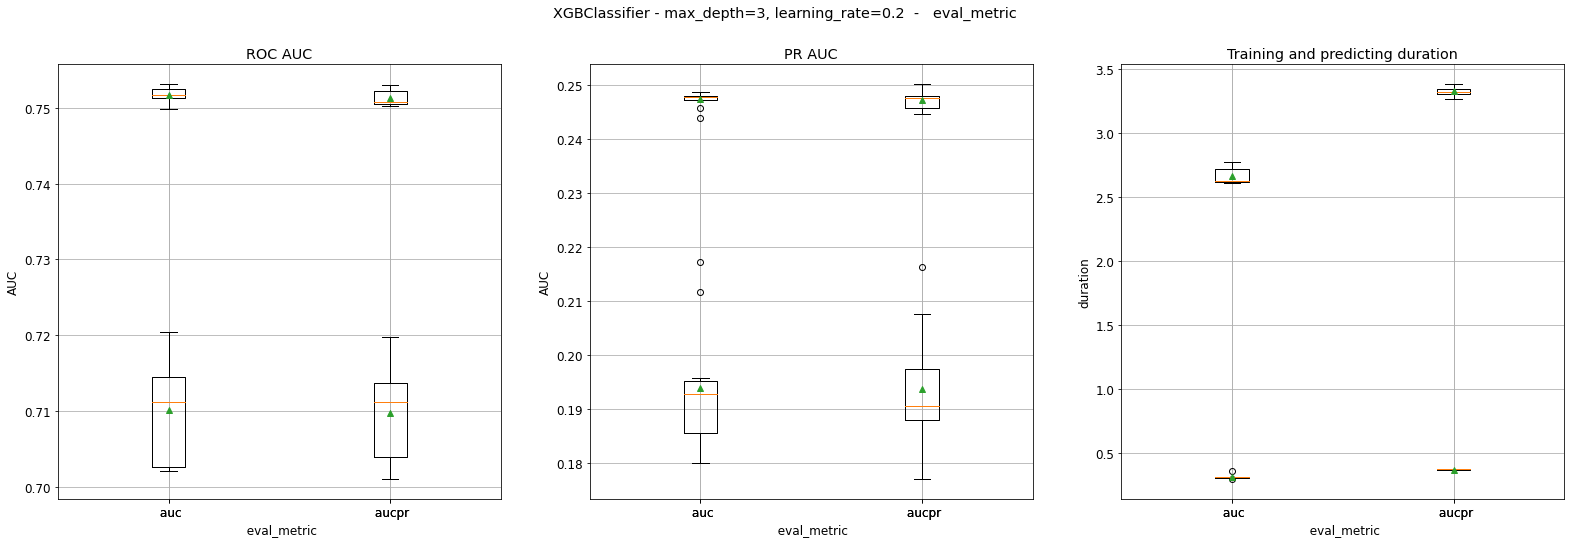

In [57]:
results_tmp = []

model = XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='auc')
title = 'XGBClassifier - max_depth=3, learning_rate=0.2 |  eval_metric = auc'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

model = XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='aucpr')
title = 'XGBClassifier - max_depth=3, learning_rate=0.2 |  eval_metric = aucpr'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## Specific LGBMClassifier

### num_leaves

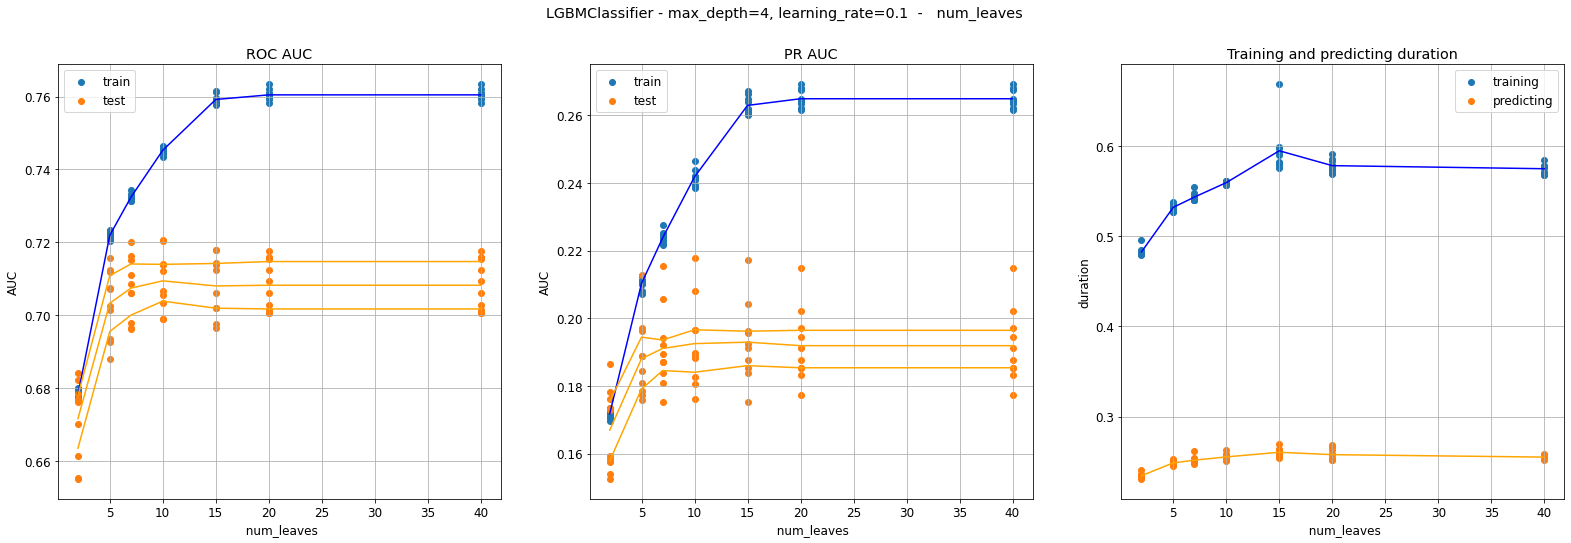

In [30]:
results_tmp = []
lst = [2, 5, 7, 10, 15, 20, 40]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1 |  num_leaves = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### class_weight

[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight
[LightGBM] [Warning] Unknown parameter: class_wight


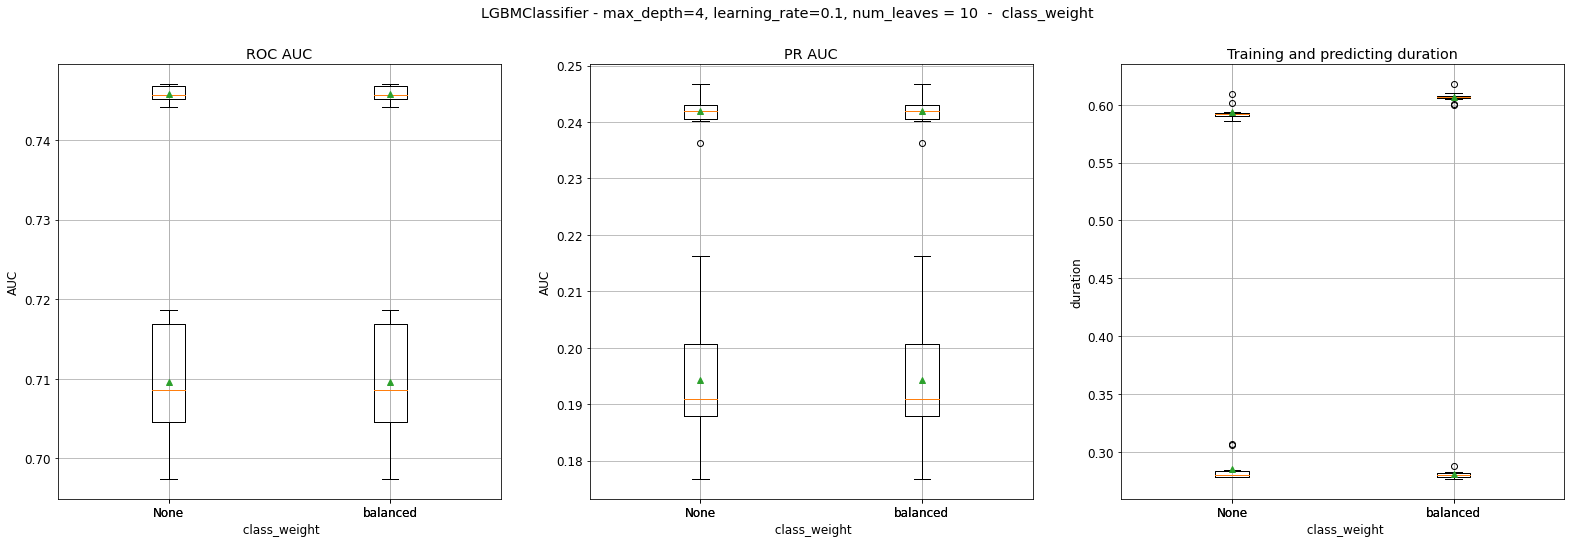

In [33]:
results_tmp = []

model = model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, class_wight=None, n_jobs=-1)
title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves = 10 | class_weight=None'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, class_wight='balanced', n_jobs=-1)
title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves = 10 | class_weight=balanced'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### min_child_samples

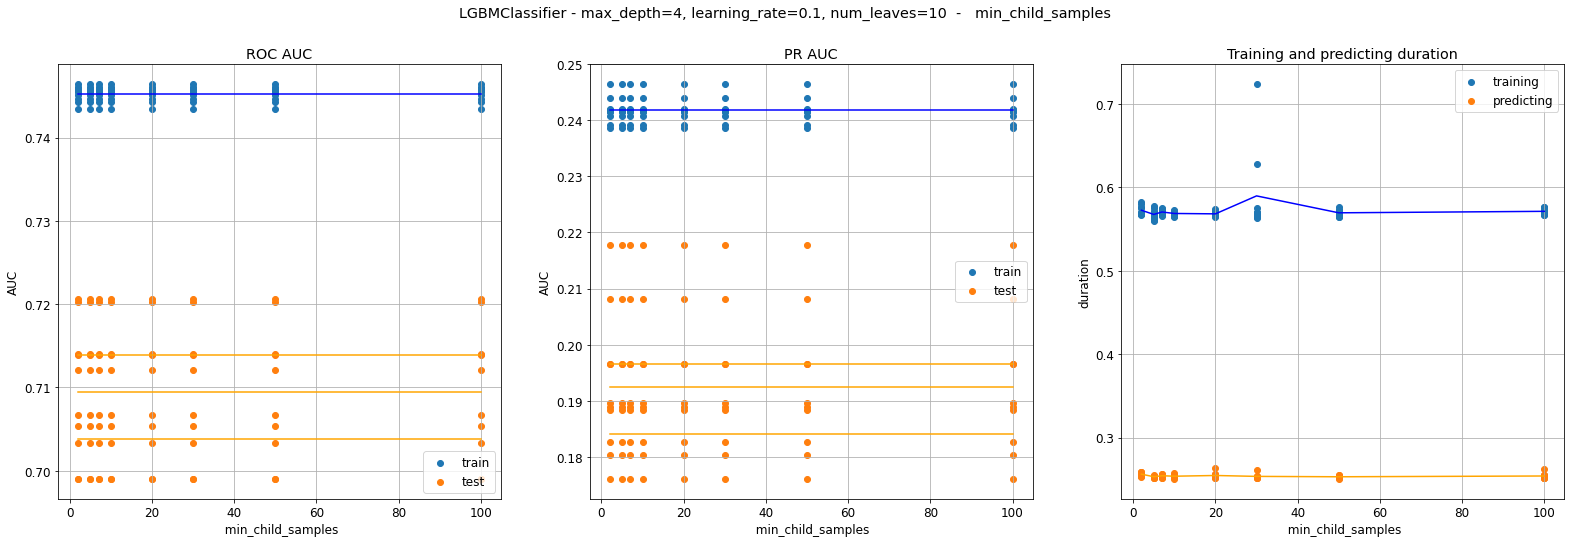

In [35]:
results_tmp = []
lst = [2, 5, 7, 10, 20, 30, 50, 100]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, min_child_sample =param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10 |  min_child_samples = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### subsample_for_bin

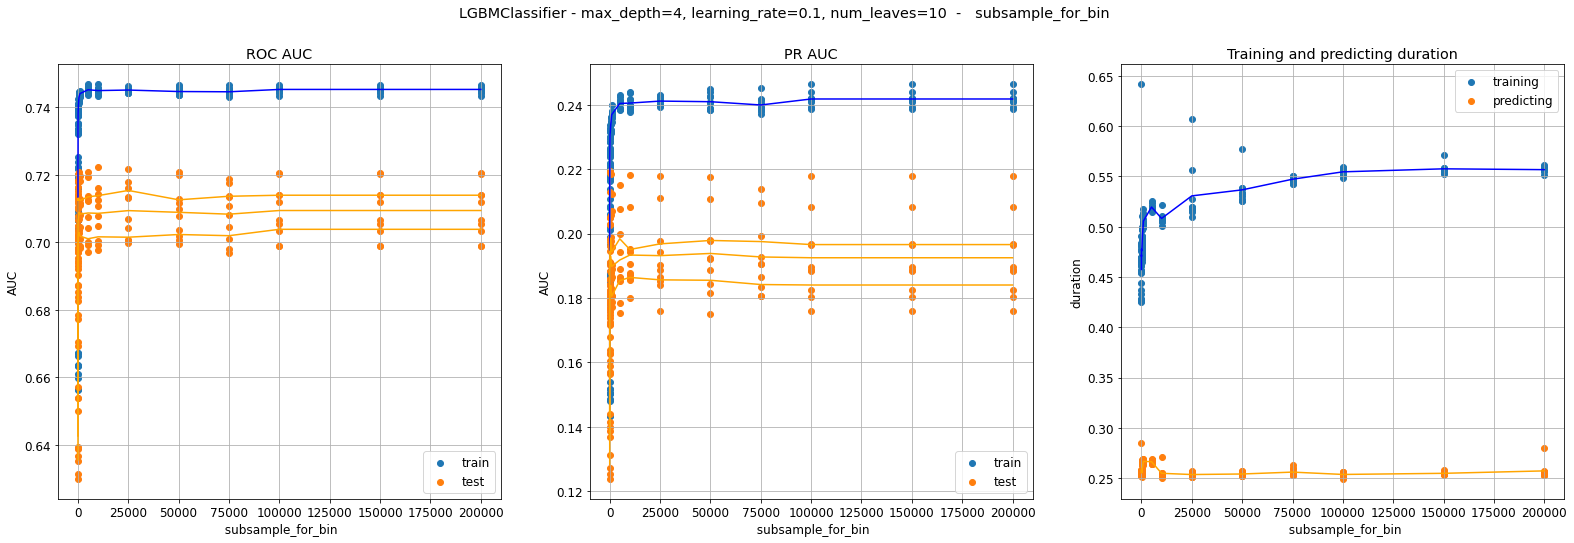

In [39]:
results_tmp = []
lst = [5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000, 25000, 50000, 75000, 100000, 150000, 200000]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10 |  subsample_for_bin = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_split_gain

0
0.1
0.5
1
2
3


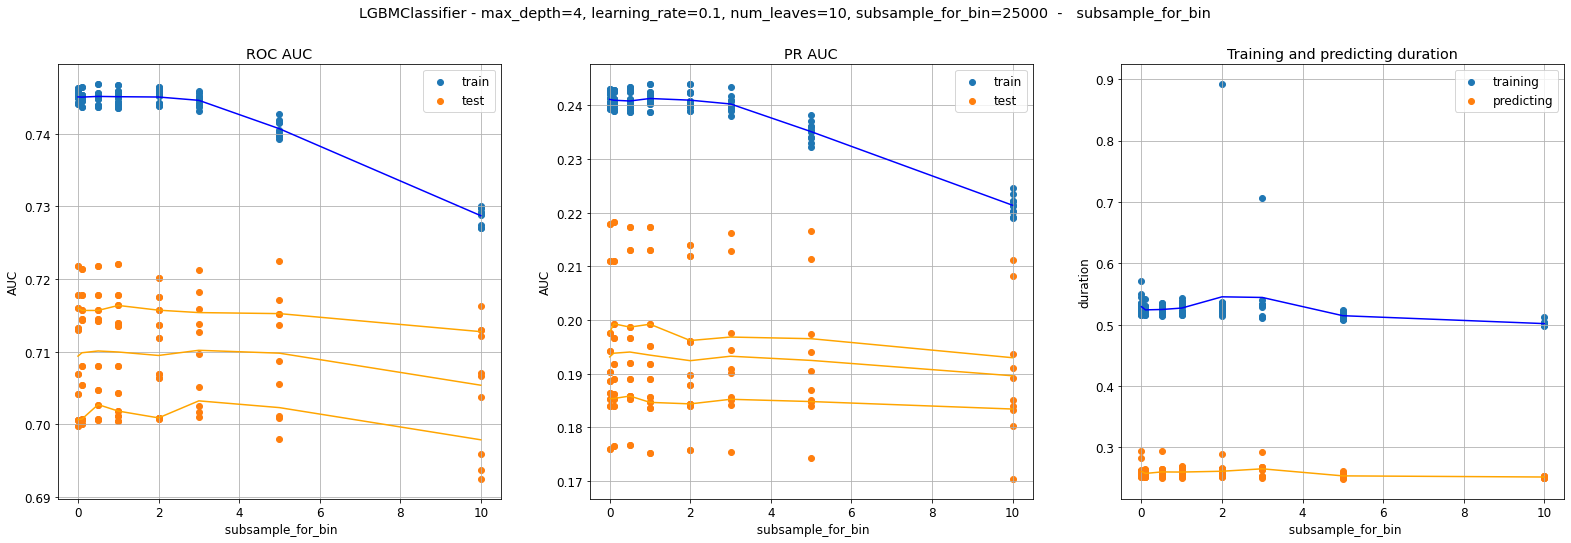

In [44]:
#results_tmp = []
lst = [0, 0.1, 0.5, 1, 2, 3]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, min_split_gain=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000 |  subsample_for_bin = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_child_weight

3


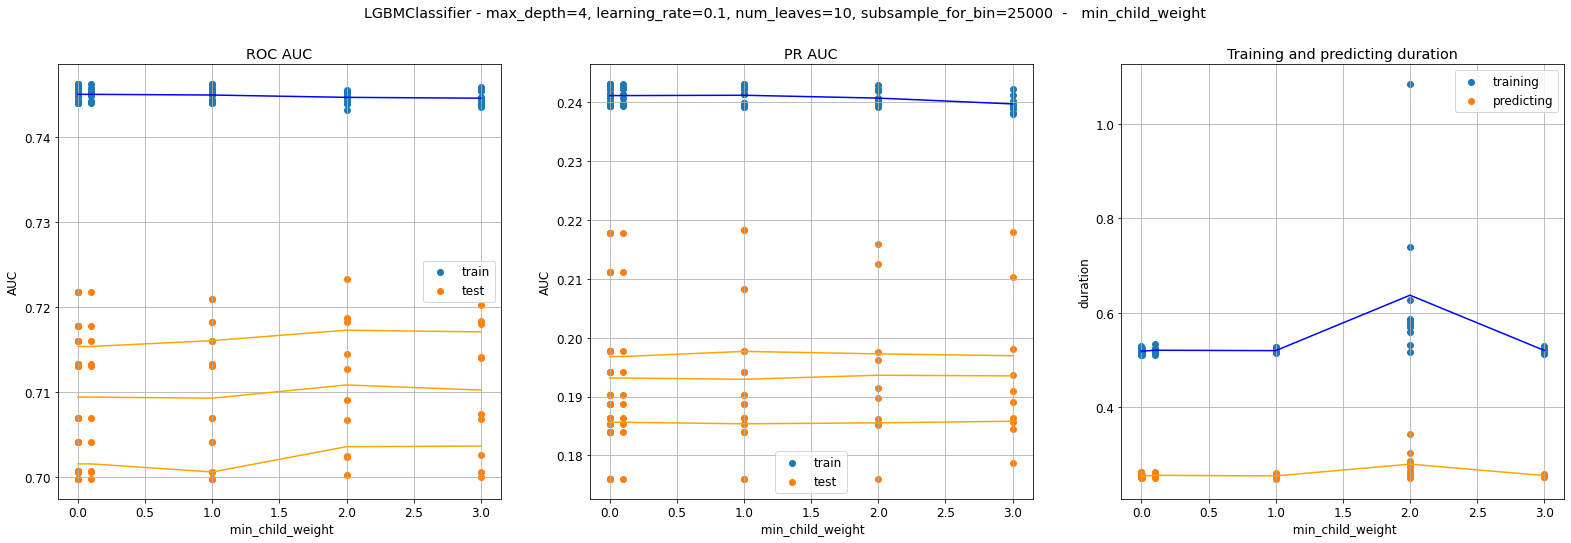

In [47]:
results_tmp = []
lst = [0, 0.00001, 0.0001, 0.001, 0.1, 1, 2, 3]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, min_child_weight=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000 |  min_child_weight = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimators

### XGBoost

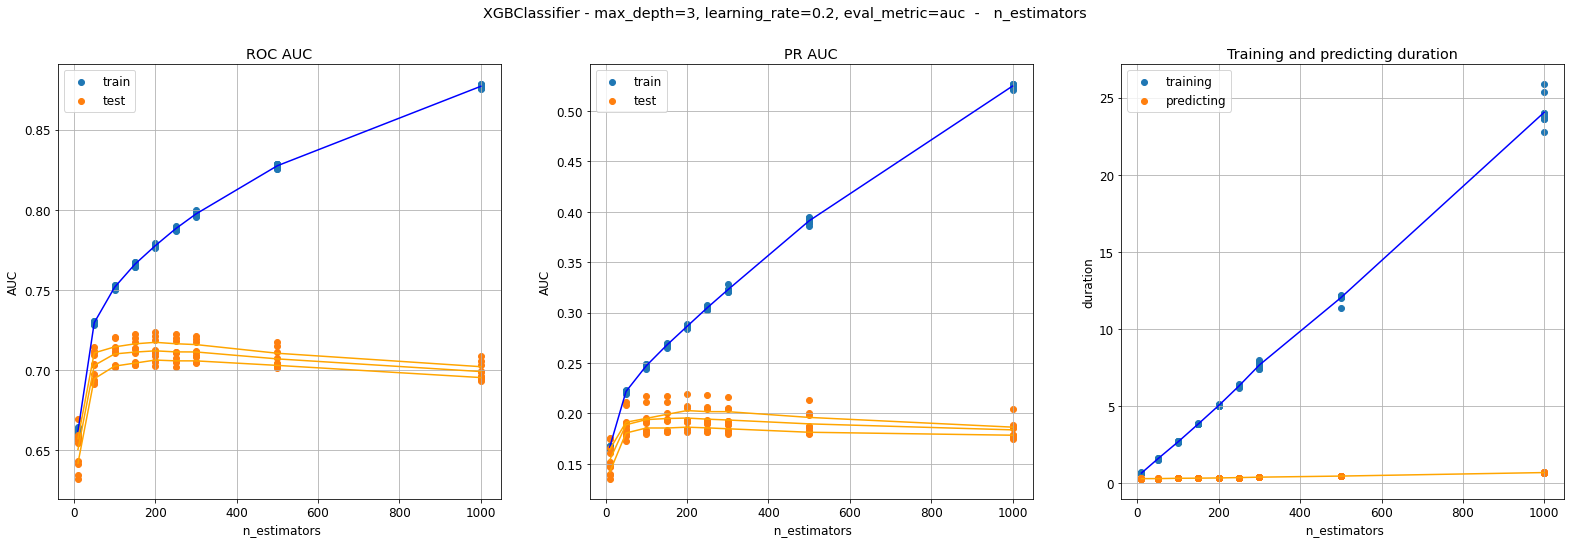

In [58]:
results_tmp = []
lst = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
for param_value in lst:
    model = XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='auc', n_estimators=param_value)
    title = 'XGBClassifier - max_depth=3, learning_rate=0.2, eval_metric=auc |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### LGBMClassifier

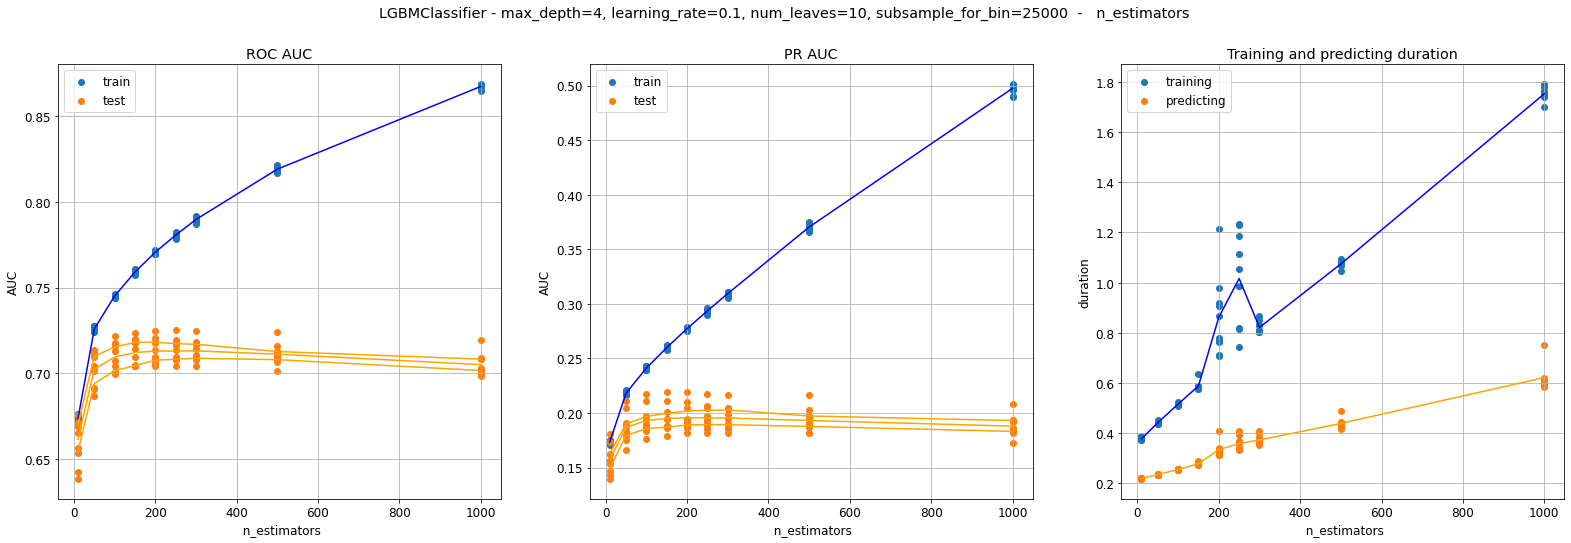

In [50]:
results_tmp = []
lst = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Métriques finales Gradient Boosting

In [59]:
bestmetricsGB = []

model = XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='auc', n_estimators=200)
data_transform = 'XG'
title = 'XGBClassifier'
bestmetricsGB.append(evaluate(model, data_transform, title))
         
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
data_transform = 'XG'
title = 'LGBMClassifier'
bestmetricsGB.append(evaluate(model, data_transform, title))
         
pd.concat(bestmetricsGB).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

title  roc_auc_train  roc_auc_test  pr_auc_train  pr_auc_test  \
0   XGBClassifier       0.777628       0.71211      0.286291     0.195463   
1  LGBMClassifier       0.770630       0.71298      0.277211     0.195775   

   time_train  time_pred  nb_feat  nb_train     timestamp  
0    5.029823   0.334517       50     90000  1.615409e+09  
1    0.717737   0.360471       50     90000  1.615409e+09

# Gradient boosting 2

## Max depth

### LGBMClassifier

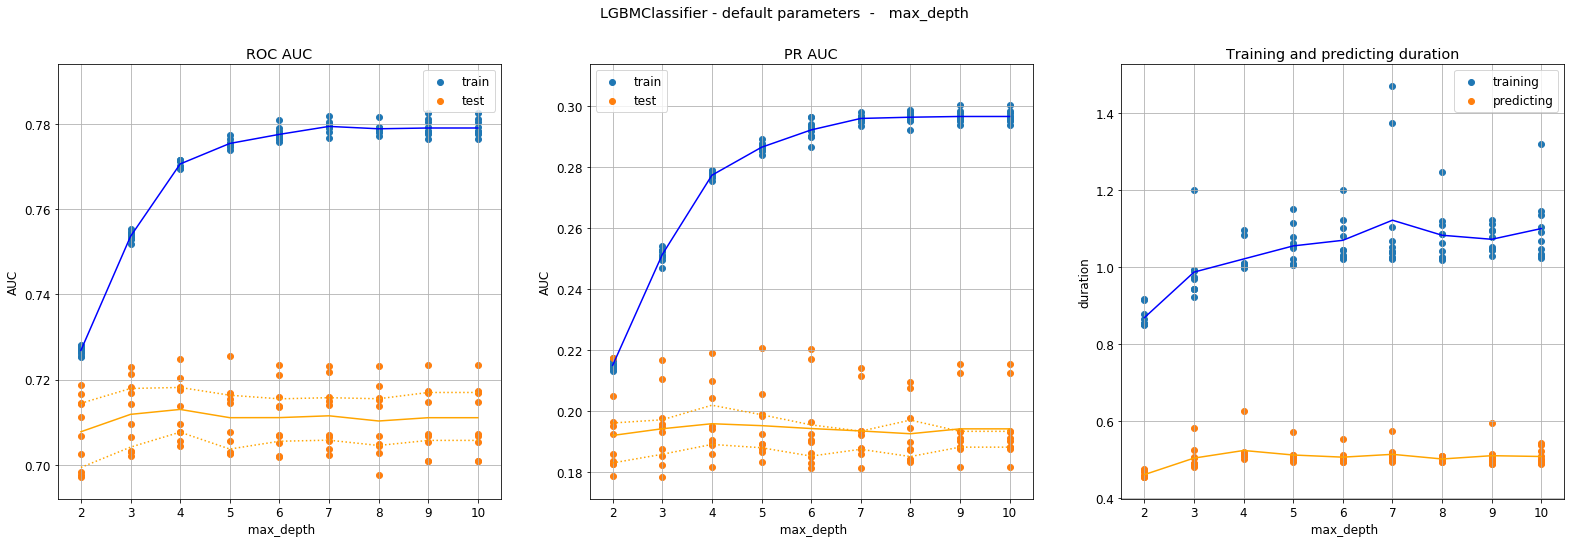

In [56]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for param_value in lst:
    model = LGBMClassifier(max_depth=param_value, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    title = 'LGBMClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### XG Boost

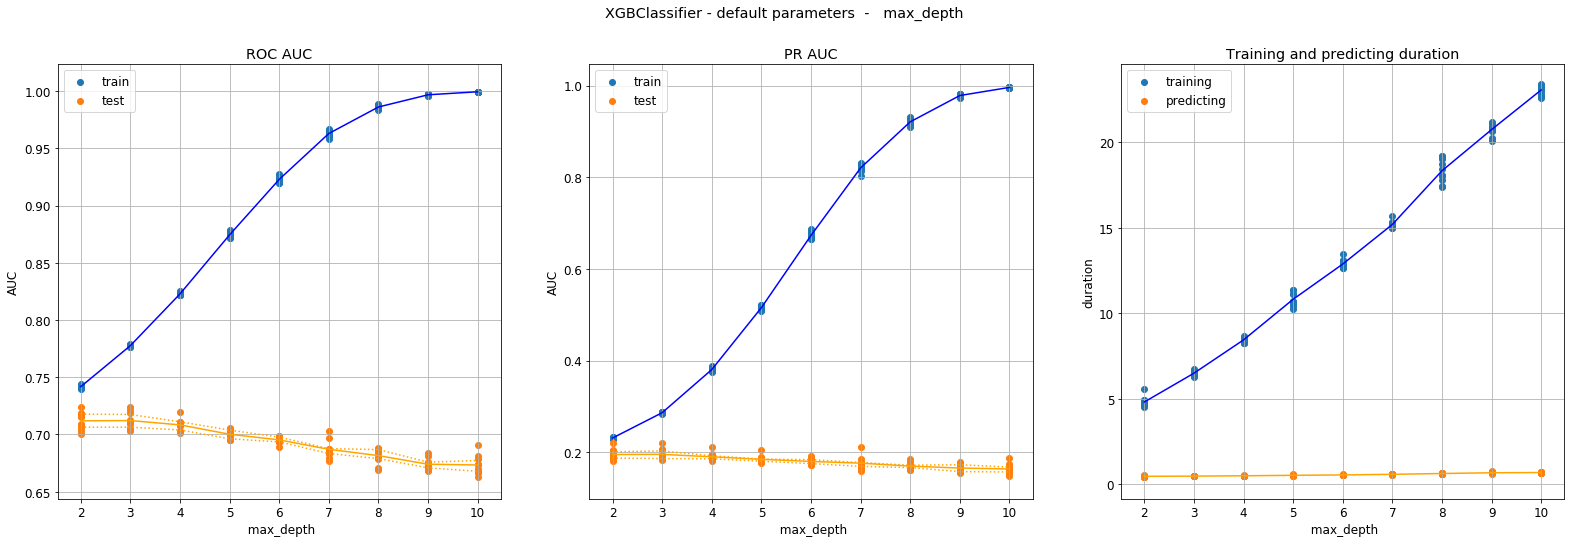

In [57]:
results_tmp = []
lst = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for param_value in lst:
    model = XGBClassifier(max_depth=param_value, learning_rate=0.2, eval_metric='auc', n_estimators=200)
    title = 'XGBClassifier - default parameters |  max_depth = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## learning_rate

### LGBMClassifier

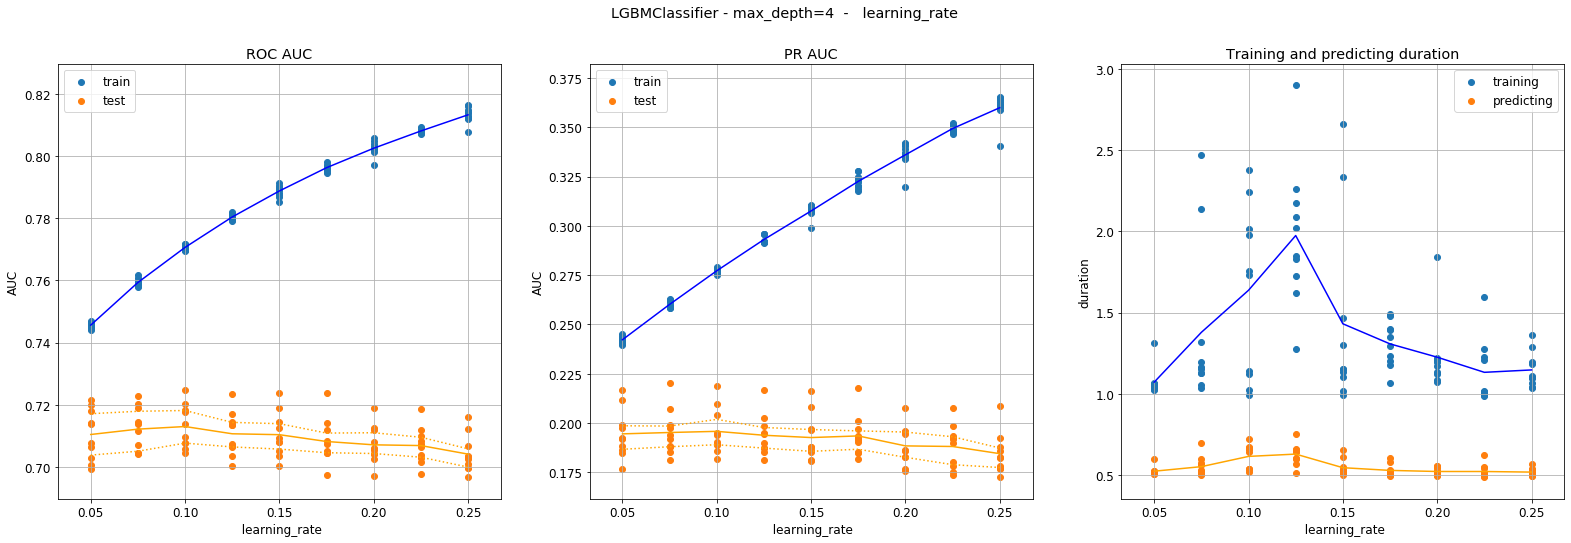

In [62]:
results_tmp = []
lst = [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]
for param_value in lst:
    #print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=param_value, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4 |  learning_rate = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### XG Boost

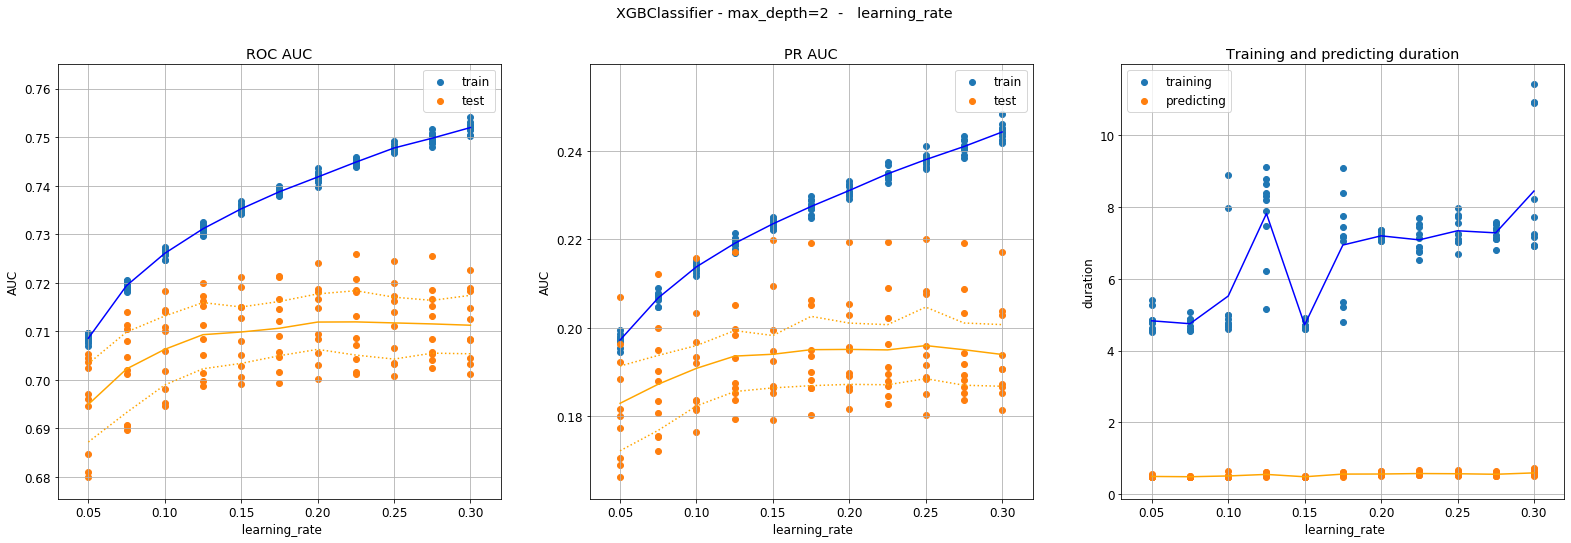

In [65]:
#results_tmp = []
lst = [0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25]
lst=[0.275, 0.3]
for param_value in lst:
    model = XGBClassifier(max_depth=2, learning_rate=param_value, eval_metric='auc', n_estimators=200)
    title = 'XGBClassifier - max_depth=2 |  learning_rate = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Specific XGBoost

### gamma

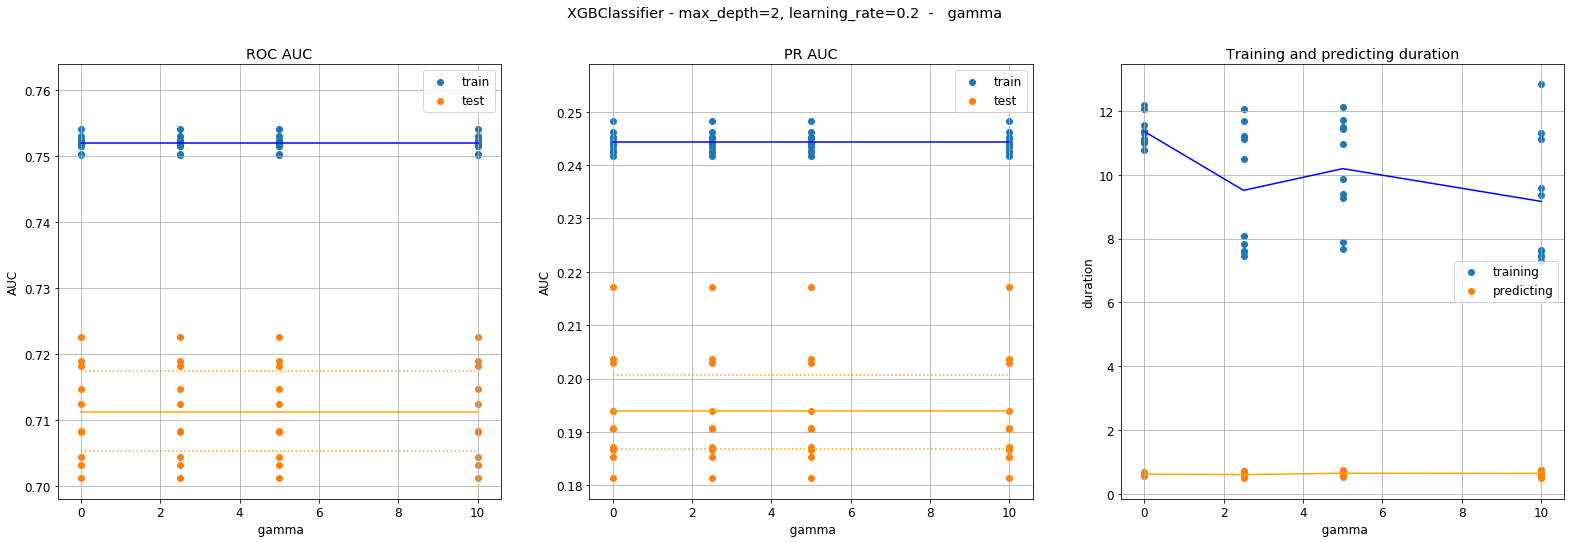

In [67]:
results_tmp = []
lst = [0, 2.5, 5, 10]
for param_value in lst:
    
    XGBClassifier(max_depth=2, learning_rate=0.2, eval_metric='auc', n_estimators=200)
    title = 'XGBClassifier - max_depth=2, learning_rate=0.2 |  gamma = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_child_weight

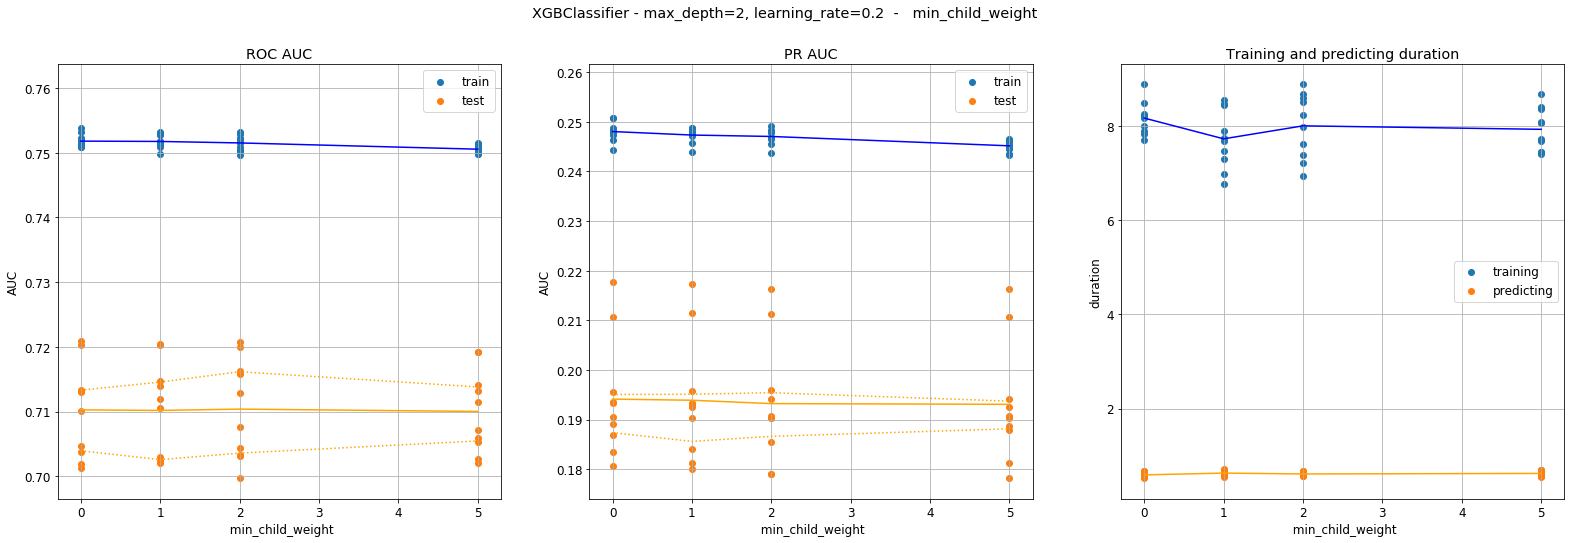

In [69]:
results_tmp = []
lst = [0, 1, 2, 5]
for param_value in lst:
    model = XGBClassifier(max_depth=2, learning_rate=0.2, min_child_weight=param_value)
    title = 'XGBClassifier - max_depth=2, learning_rate=0.2 |  min_child_weight = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### max_delta_step

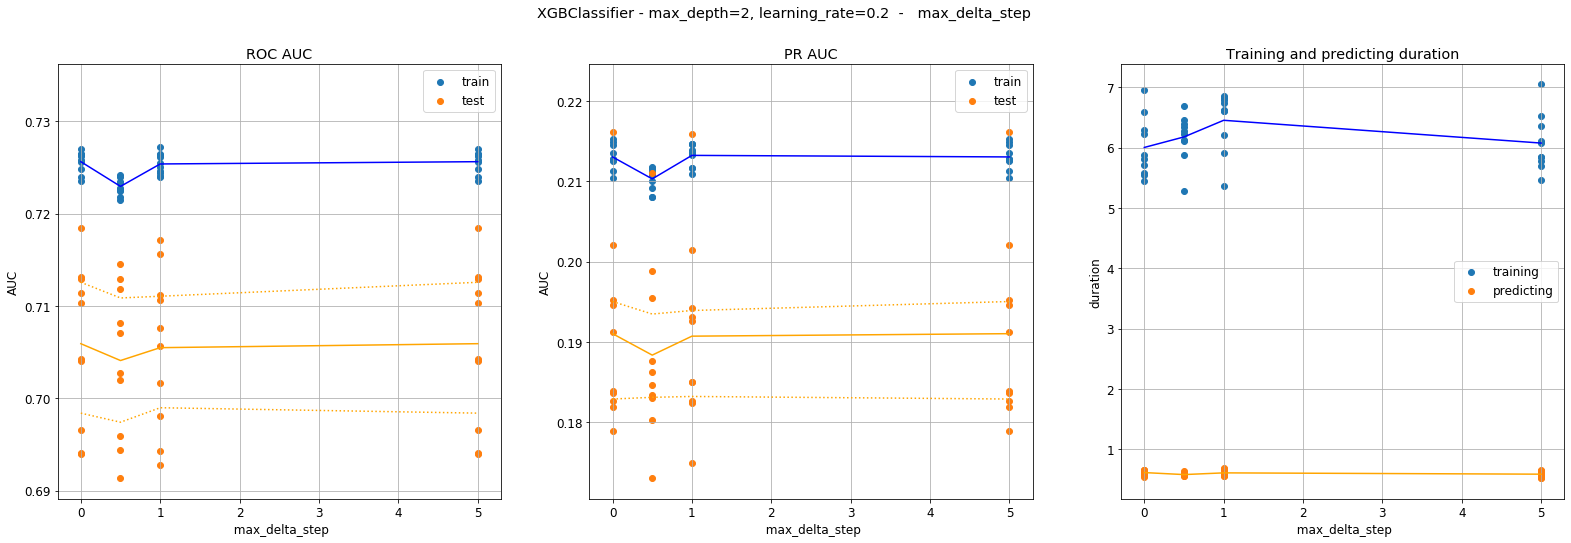

In [70]:
results_tmp = []
lst = [0, 0.5, 1, 5]
for param_value in lst:
    model = XGBClassifier(max_depth=2, learning_rate=0.2, max_delta_step=param_value)
    title = 'XGBClassifier - max_depth=2, learning_rate=0.2 |  max_delta_step = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### eval_metric

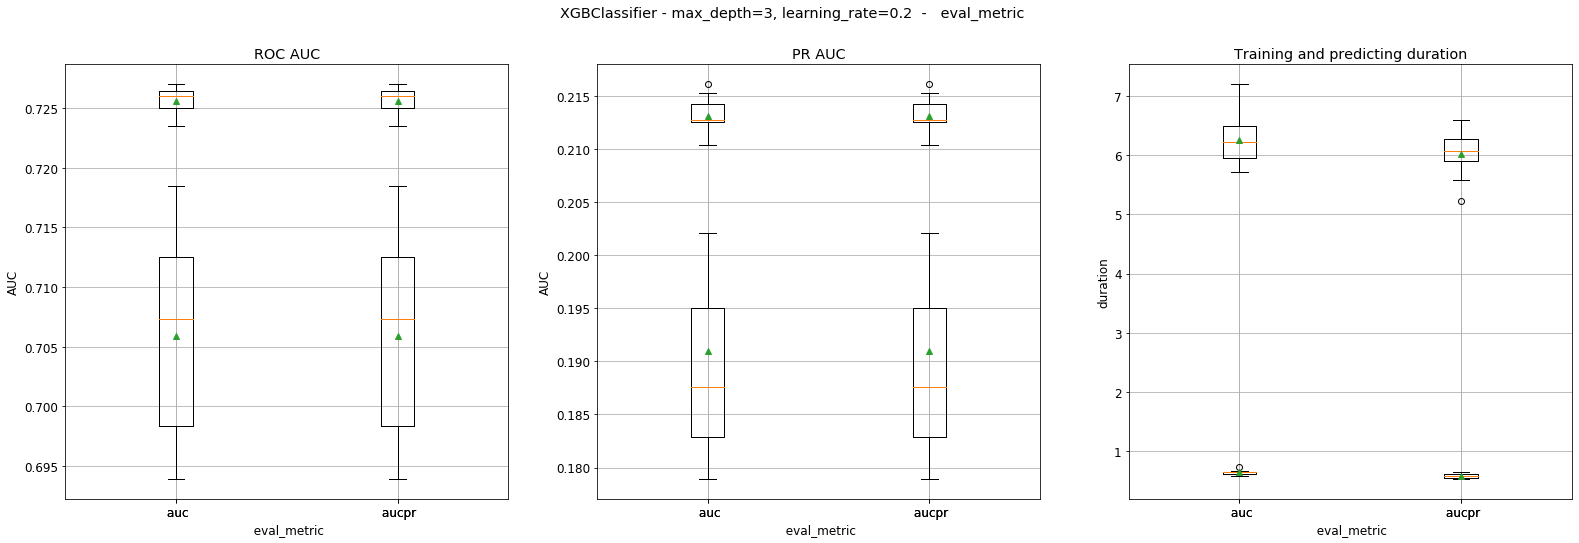

In [71]:
results_tmp = []

model = XGBClassifier(max_depth=2, learning_rate=0.2, eval_metric='auc')
title = 'XGBClassifier - max_depth=3, learning_rate=0.2 |  eval_metric = auc'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

model = XGBClassifier(max_depth=2, learning_rate=0.2, eval_metric='aucpr')
title = 'XGBClassifier - max_depth=3, learning_rate=0.2 |  eval_metric = aucpr'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## Specific LGBMClassifier

### num_leaves

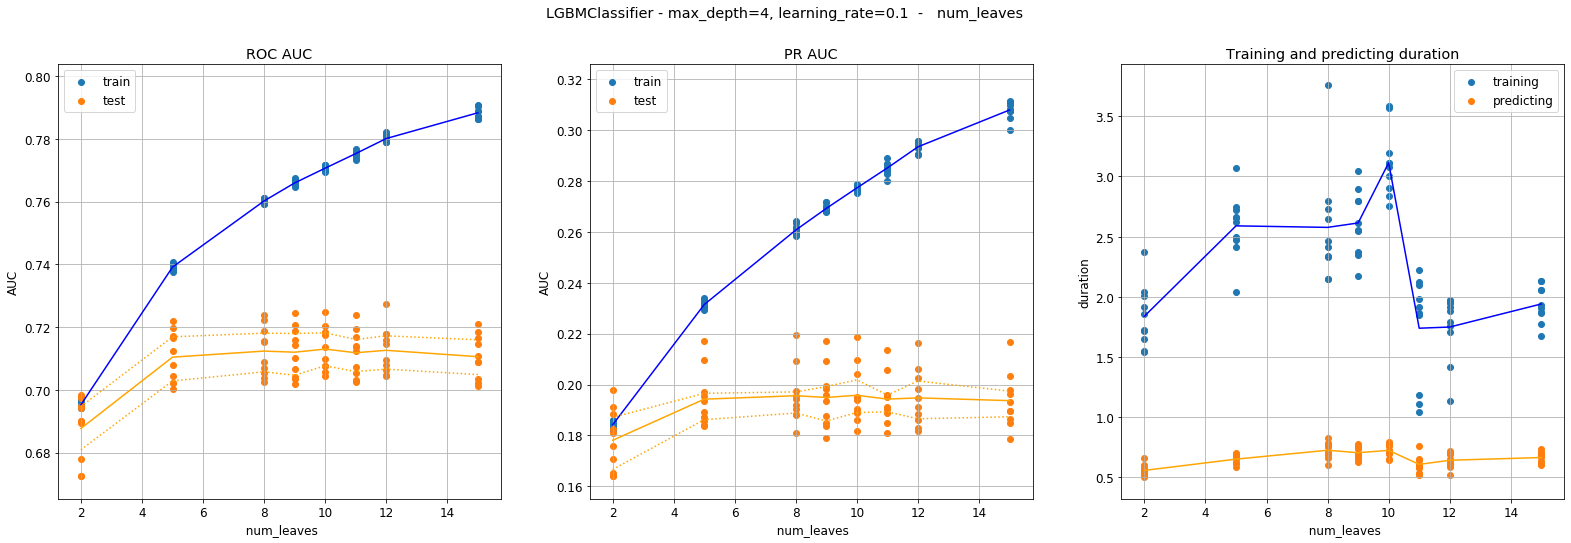

In [75]:
results_tmp = []
lst = [2, 5, 8, 9, 10, 11, 12, 15]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=param_value, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1 |  num_leaves = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### class_weight

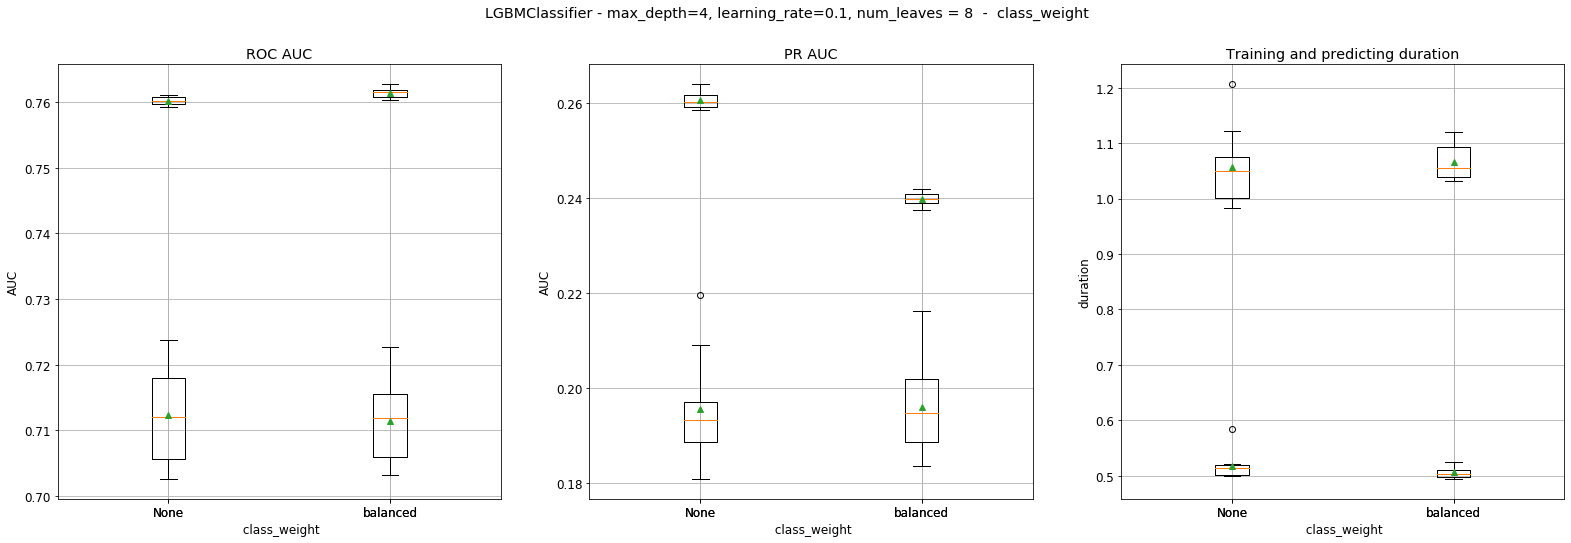

In [83]:
results_tmp = []

model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, class_weight=None, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves = 8 | class_weight=None'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, class_weight='balanced', subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves = 8 | class_weight=balanced'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

### min_child_samples

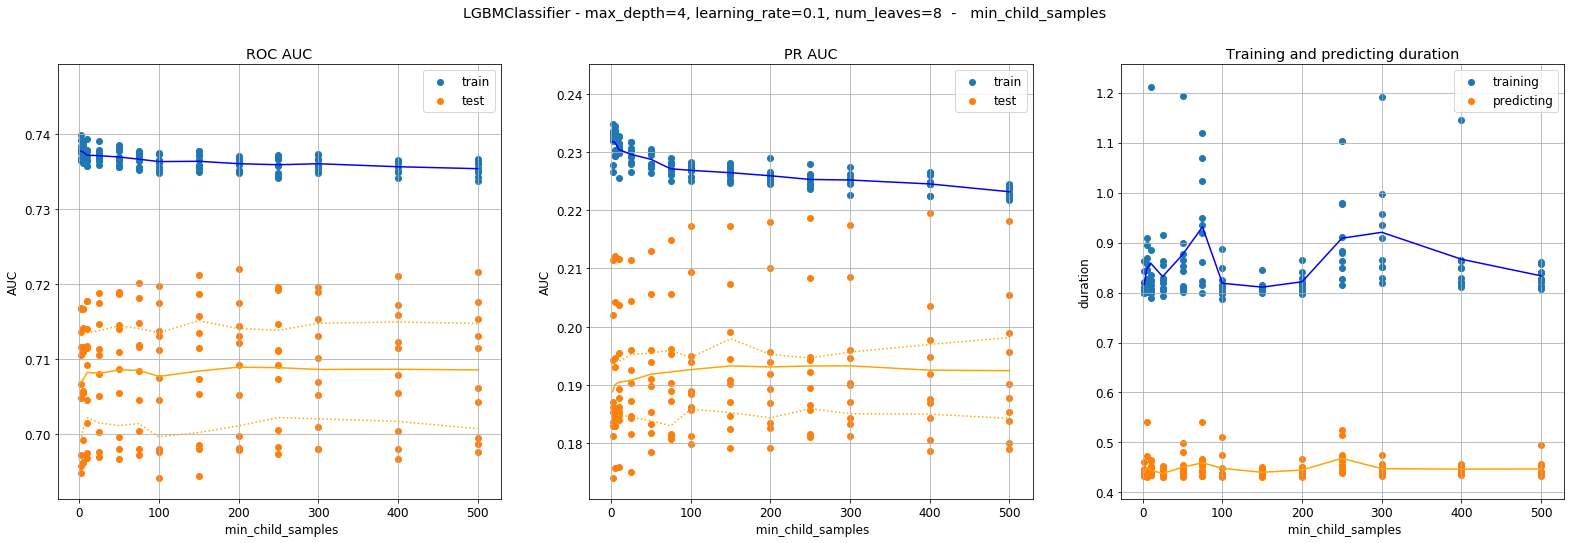

In [87]:
results_tmp = []
lst = [2, 5, 10, 25, 50, 75, 100, 150, 200, 250, 300, 400, 500]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples =param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=8 |  min_child_samples = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### subsample_for_bin

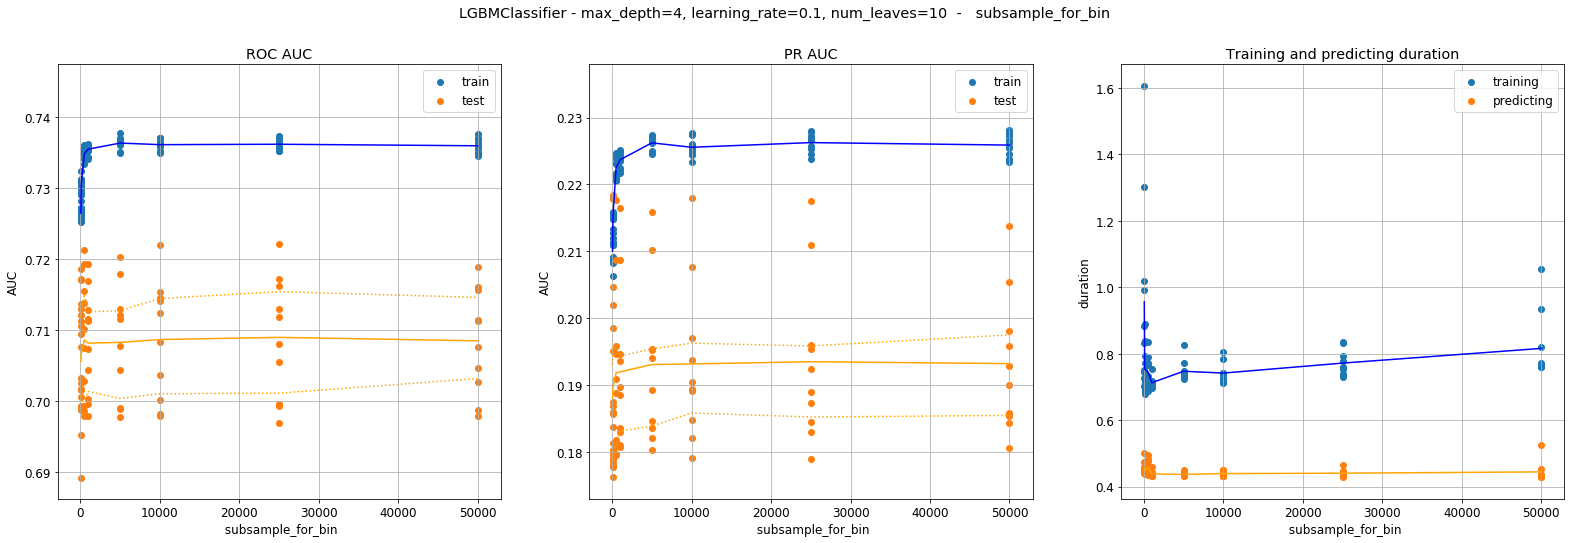

In [89]:
results_tmp = []
lst = [50, 100, 500, 1000, 5000, 10000, 25000, 50000]
for param_value in lst:
    print(param_value)
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10 |  subsample_for_bin = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_split_gain

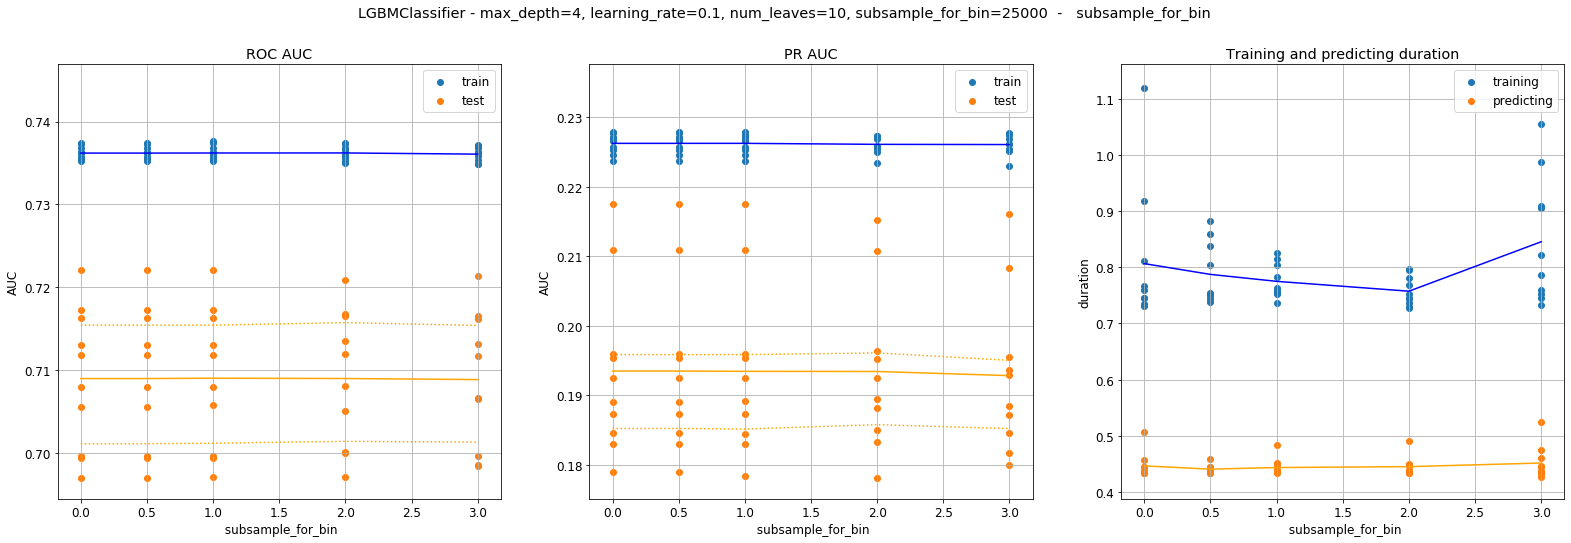

In [90]:
results_tmp = []
lst = [0, 0.5, 1, 2, 3]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=25000, min_split_gain=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000 |  subsample_for_bin = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### min_child_weight

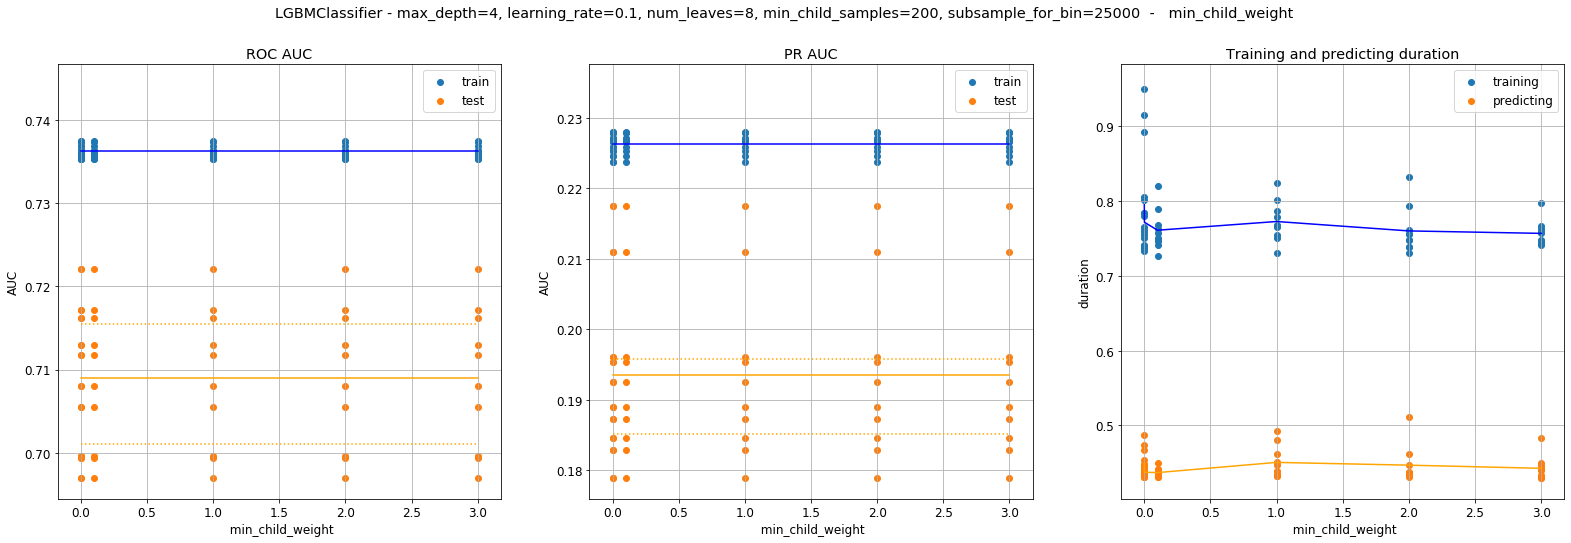

In [92]:
results_tmp = []
lst = [0, 0.001, 0.1, 1, 2, 3]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=25000, min_child_weight=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=25000 |  min_child_weight = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimators

### XGBoost

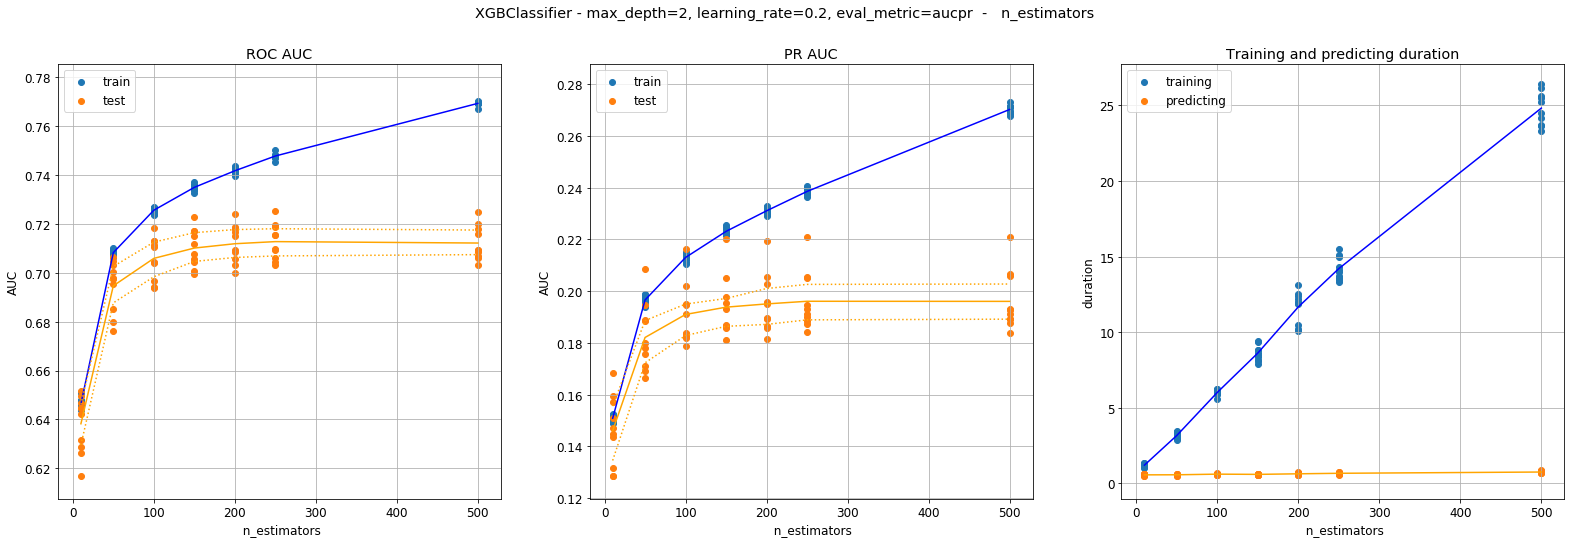

In [72]:
results_tmp = []
lst = [10, 50, 100, 150, 200, 250,500]
for param_value in lst:
    model = XGBClassifier(max_depth=2, learning_rate=0.2, eval_metric='aucpr', n_estimators=param_value)
    title = 'XGBClassifier - max_depth=2, learning_rate=0.2, eval_metric=aucpr |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### LGBMClassifier

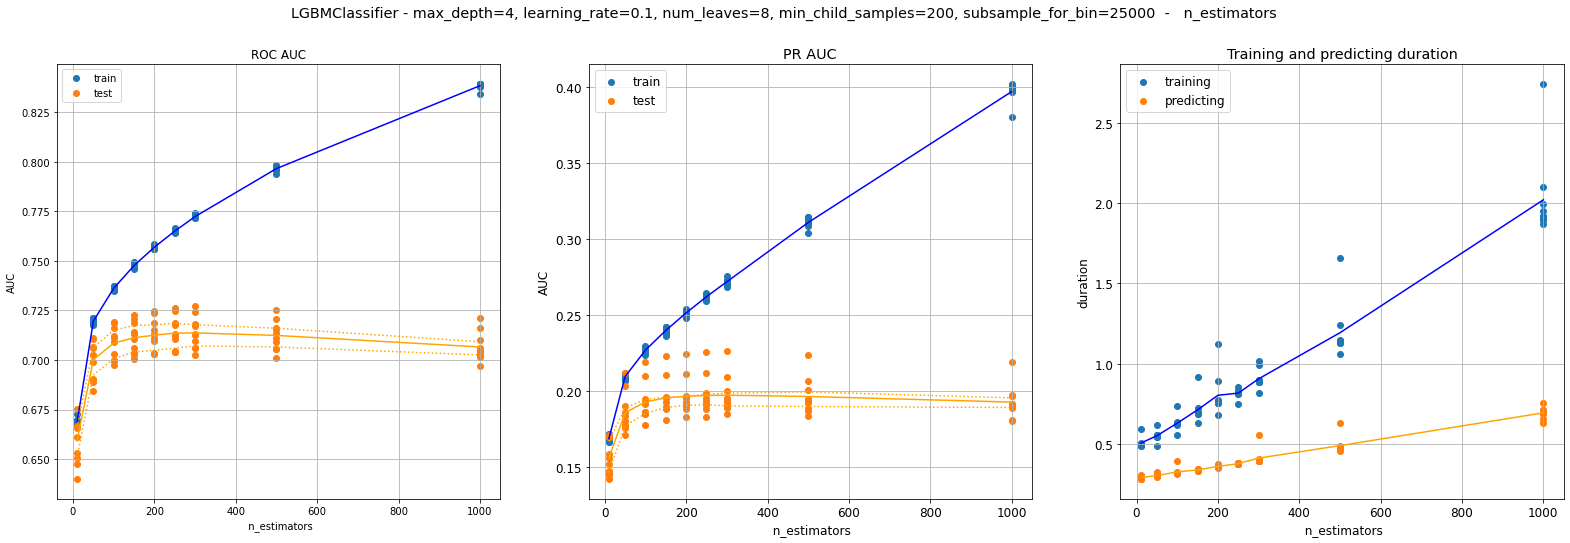

NameError: name 'results' is not defined

In [7]:
results_tmp = []
lst = [10, 50, 100, 150, 200, 250, 300, 500, 1000]
for param_value in lst:
    model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=25000, n_estimators=param_value, n_jobs=-1)
    title = 'LGBMClassifier - max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=25000 |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

### Métriques finales Gradient Boosting

In [6]:
bestmetricsGB = []

model = XGBClassifier(max_depth=2, learning_rate=0.2, eval_metric='aucpr', n_estimators=250)
data_transform = 'XG'
title = 'XGBClassifier 2'
bestmetricsGB.append(evaluate(model, data_transform, title))
         
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=25000, n_estimators=250, n_jobs=-1)
data_transform = 'XG'
title = 'LGBMClassifier 2'
bestmetricsGB.append(evaluate(model, data_transform, title))
         
pd.concat(bestmetricsGB).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

title  roc_auc_train  roc_auc_test  pr_auc_train  pr_auc_test  \
0   XGBClassifier 2       0.747443      0.711648      0.238519     0.195214   
1  LGBMClassifier 2       0.764982      0.713535      0.261905     0.196990   

   time_train  time_pred  nb_feat  nb_train     timestamp  
0    3.645785   0.369545       50     90000  1.615907e+09  
1    0.938779   0.375076       50     90000  1.615907e+09

# EasyEnsembleClassifier

## sampling_strategy

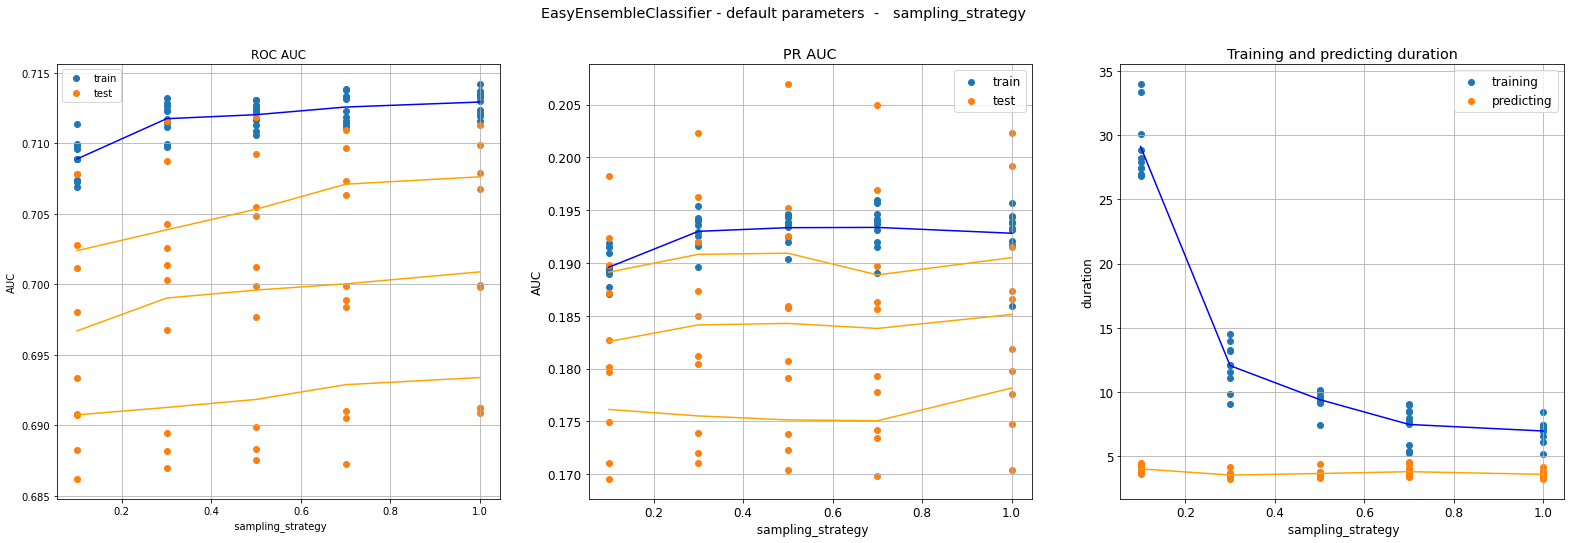

In [11]:
results_tmp = []
lst = [0.1, 0.3, 0.5, 0.7, 1]
for param_value in lst:
    print(param_value)
    model = EasyEnsembleClassifier(sampling_strategy=param_value, n_jobs=-1)
    title = 'EasyEnsembleClassifier - default parameters |  sampling_strategy = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## base_estimator

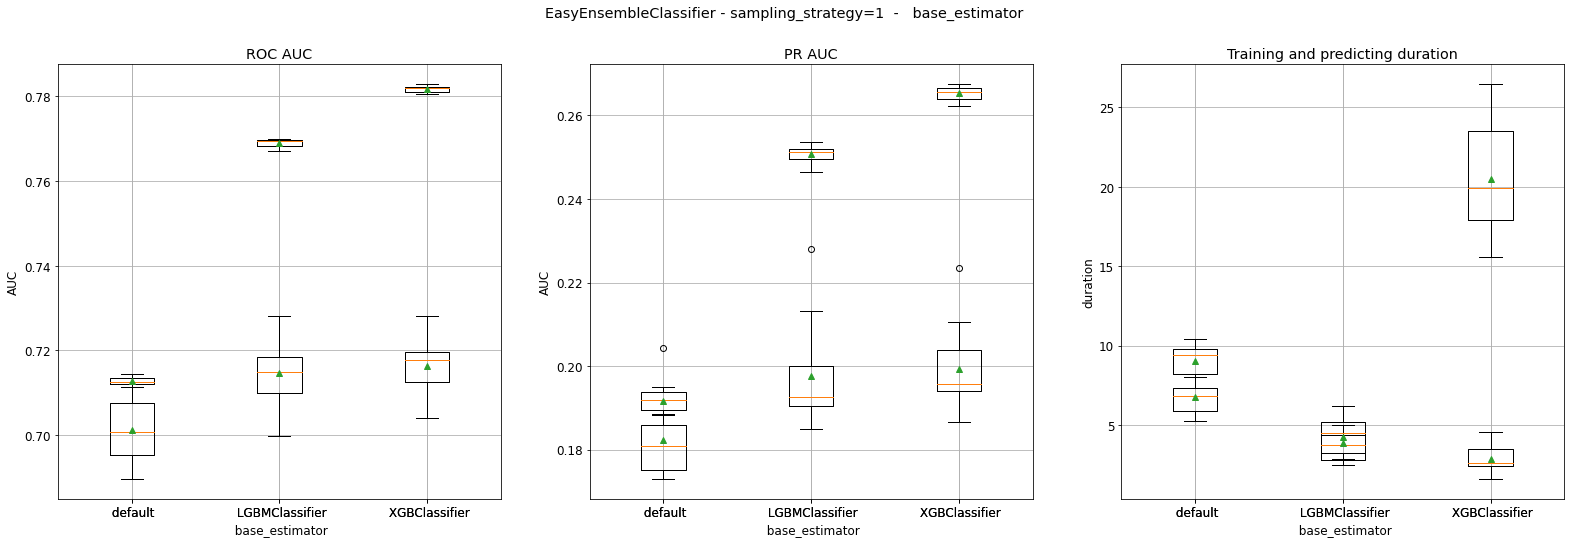

In [15]:
results_tmp = []

model = EasyEnsembleClassifier(sampling_strategy=1, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1 |  base_estimator = default'
res = evaluate(model=model, title = title, data_transform='RF')
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1), n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1 |  base_estimator = LGBMClassifier'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='auc', n_estimators=200), n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1 |  base_estimator = XGBClassifier'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## replacement

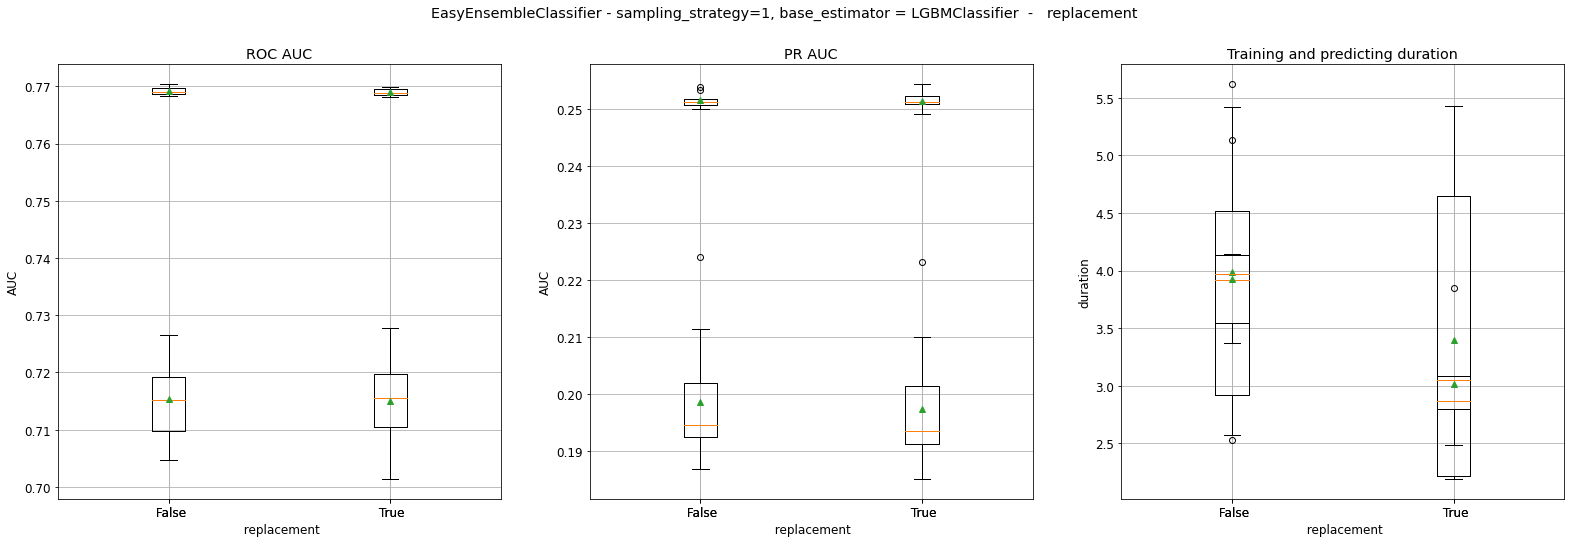

In [19]:
results_tmp = []

base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)

model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, replacement=False, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  replacement = False'
res = evaluate(model=model, title = title, data_transform='XG')Replacement
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, replacement=True, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  replacement = True'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## warm_start

/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:353: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:353: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:353: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/pierre/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:353: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
/home/pierre/anaconda3/lib/p

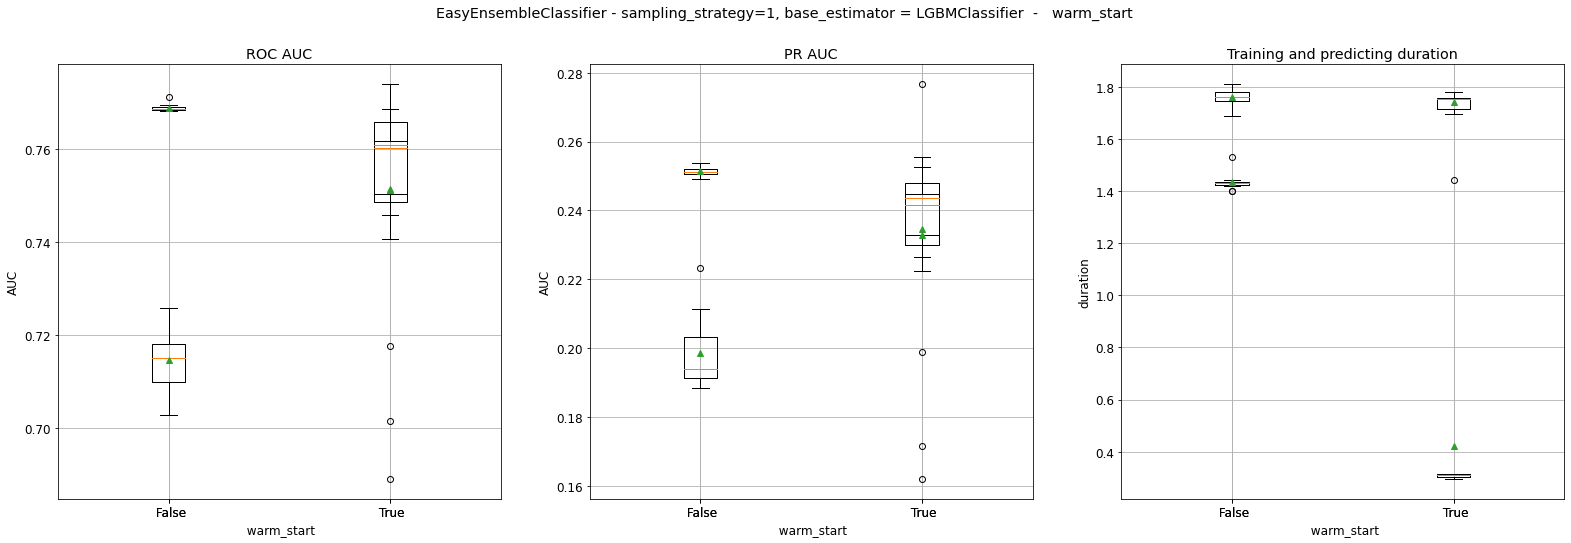

In [30]:
results_tmp = []

base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)

model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, warm_start=False, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  warm_start = False'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, warm_start=True, n_jobs=-1)
title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  warm_start = True'
res = evaluate(model=model, title = title, data_transform='XG')
results_tmp.append(res)

displayPlotParamOptimBox(results_tmp)

results.extend(results_tmp)

## n_estimators

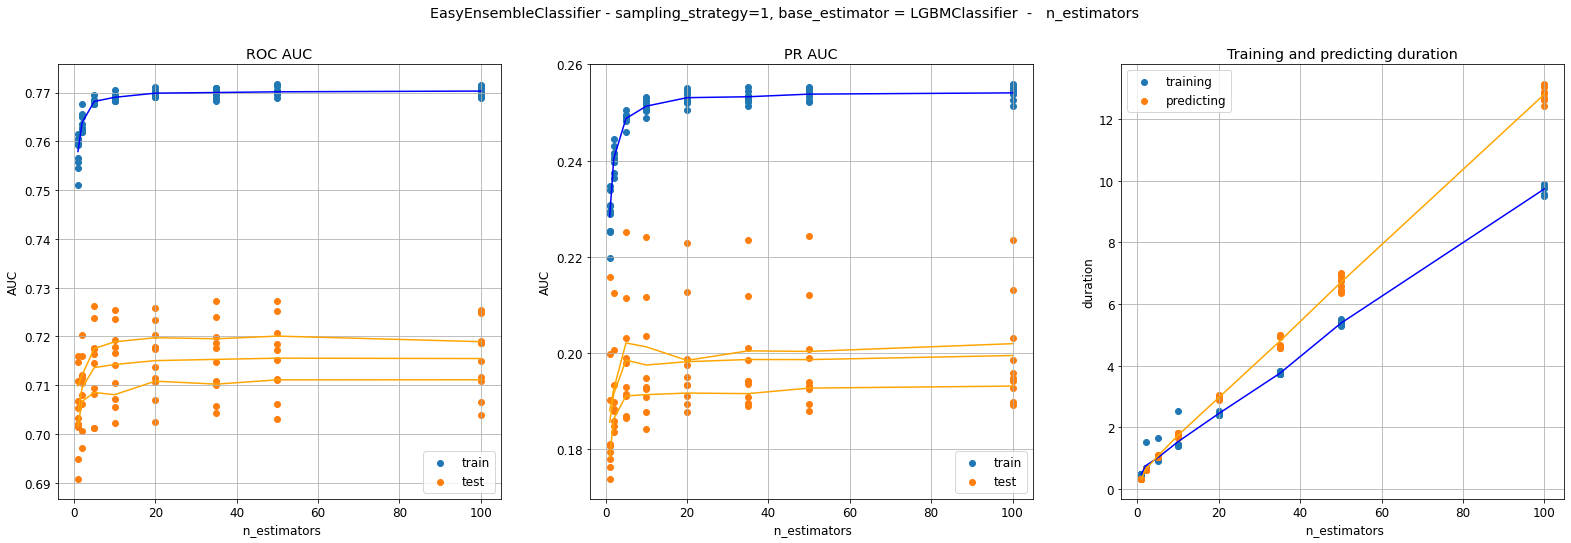

In [23]:
results_tmp = []
lst = [1, 2, 5, 10, 20, 35, 50, 100]
base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
for param_value in lst:
    print(param_value)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=param_value, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

# Bilan des métriques

In [19]:
bestmetrics = []

model = RandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=100, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=500, n_jobs=-1)
data_transform = 'RF'
title = 'sklearn random forest'
bestmetrics.append(evaluate(model, data_transform, title))
         
model = BalancedRandomForestClassifier(max_depth=10, max_features=15, min_samples_leaf=10, min_samples_split=20, criterion='entropy',class_weight = 'balanced', bootstrap=True, max_samples=25000, max_leaf_nodes=150, n_estimators=500, n_jobs=-1)
data_transform = 'RF'
title = 'imbalanced random forest'
bestmetrics.append(evaluate(model, data_transform, title))
         
model = XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='auc', n_estimators=200)
data_transform = 'XG'
title = 'XGBClassifier'
bestmetrics.append(evaluate(model, data_transform, title))
         
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
data_transform = 'XG'
title = 'LGBMClassifier'
bestmetrics.append(evaluate(model, data_transform, title))

base_estimator=LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
title = 'EasyEnsembleClassifier with LGBMClassifier'
res = evaluate(model=model, title = title, data_transform='XG')
bestmetrics.append(res)

base_estimator=XGBClassifier(max_depth=3, learning_rate=0.2, eval_metric='auc', n_estimators=200)
model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
title = 'EasyEnsembleClassifier with XGBClassifier'
res = evaluate(model=model, title = title, data_transform='XG')
bestmetrics.append(res)
         
pd.concat(bestmetrics).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

title  roc_auc_train  roc_auc_test  \
0                       sklearn random forest       0.739543      0.695677   
1                    imbalanced random forest       0.790799      0.694210   
2                               XGBClassifier       0.777628      0.712110   
3                              LGBMClassifier       0.770630      0.712980   
4  EasyEnsembleClassifier with LGBMClassifier       0.770058      0.715387   
5   EasyEnsembleClassifier with XGBClassifier       0.783024      0.716507   

   pr_auc_train  pr_auc_test  time_train  time_pred  nb_feat  nb_train  \
0      0.213490     0.179433    9.632250   1.271101       50     90000   
1      0.270393     0.180969    9.645485   1.206320       50     90000   
2      0.286291     0.195463    6.096905   0.486745       50     90000   
3      0.277211     0.195775    0.964665   0.494229       50     90000   
4      0.253546     0.198863    5.353284   7.165971       50     90000   
5      0.268539     0.200038   32.138521   4.394450       50     90000   

      timestamp  
0  1.615621e+09  
1  1.615621e+09  
2  1.615621e+09  
3  1.615621e+09  
4  1.615622e+09  
5  1.615622e+09

In [ ]:
CatBoost

# Optimisation de EasyEnsembleClassifier avec LGBMClassifier - 1

In [12]:
warnings.filterwarnings("ignore")

## max_depth de LGBM

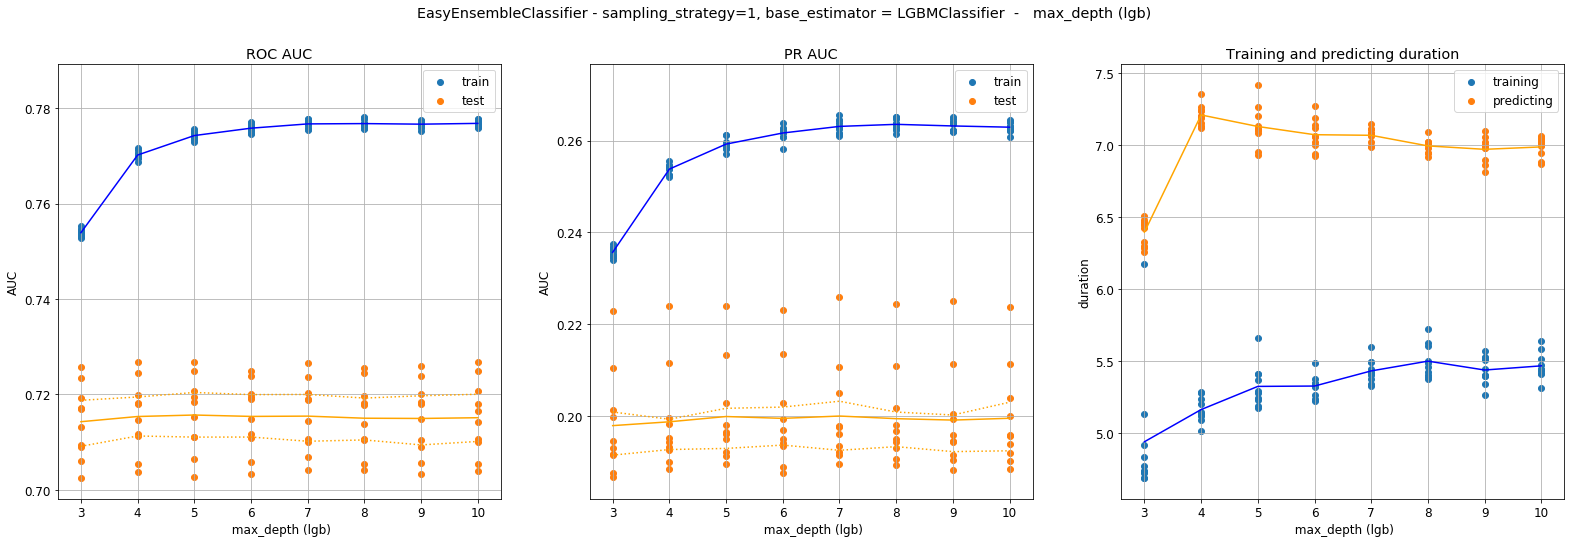

In [14]:
results_tmp = []
lst = [3, 4, 5, 6, 7, 8, 9, 10]

for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=param_value, learning_rate=0.1, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  max_depth (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## learning_rate de LGBM

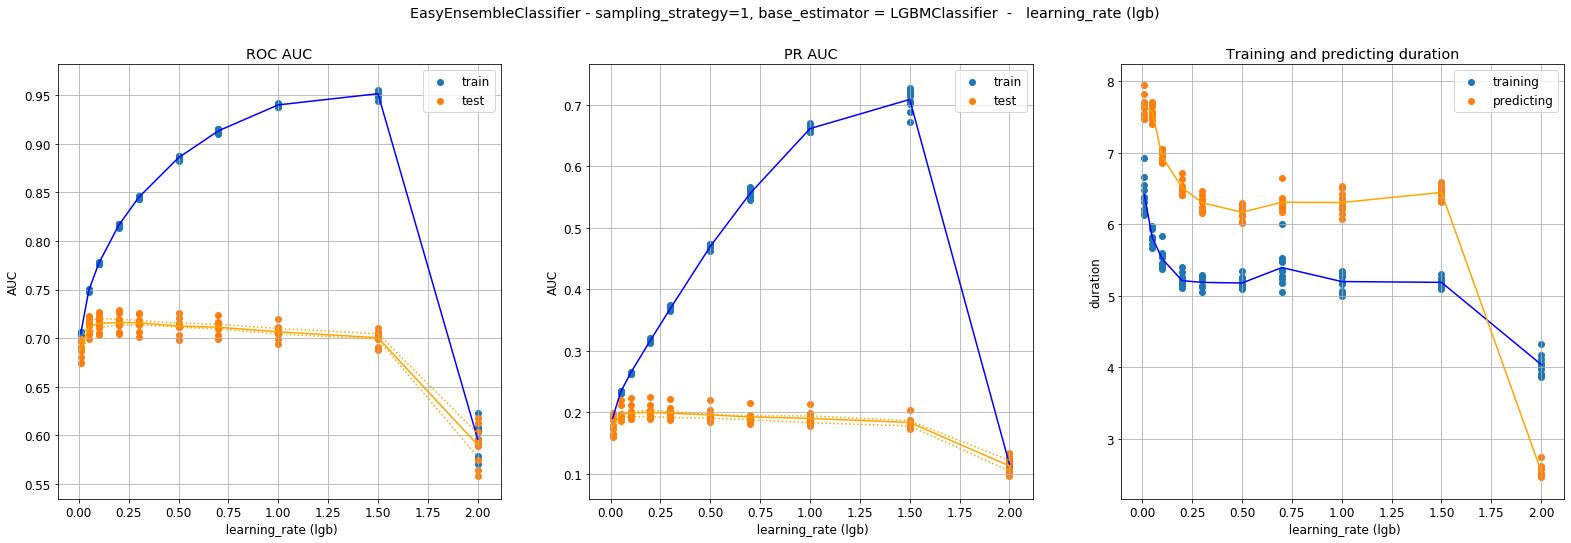

In [17]:
results_tmp = []
lst = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 1.5, 2]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=8, learning_rate=param_value, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  learning_rate (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

0.01
0.05
0.1
0.15
0.25
0.3


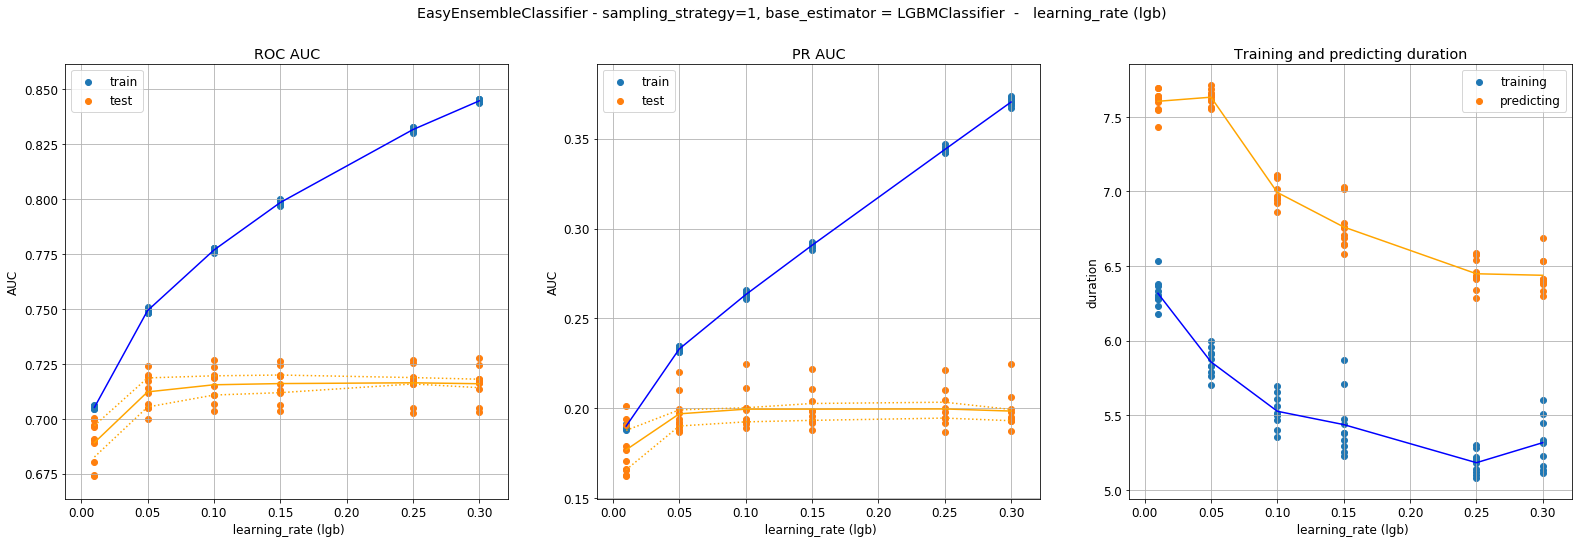

In [18]:
results_tmp = []
lst = [0.01, 0.05, 0.1, 0.15, 0.25, 0.3]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=8, learning_rate=param_value, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  learning_rate (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## num_leaves de LGBM

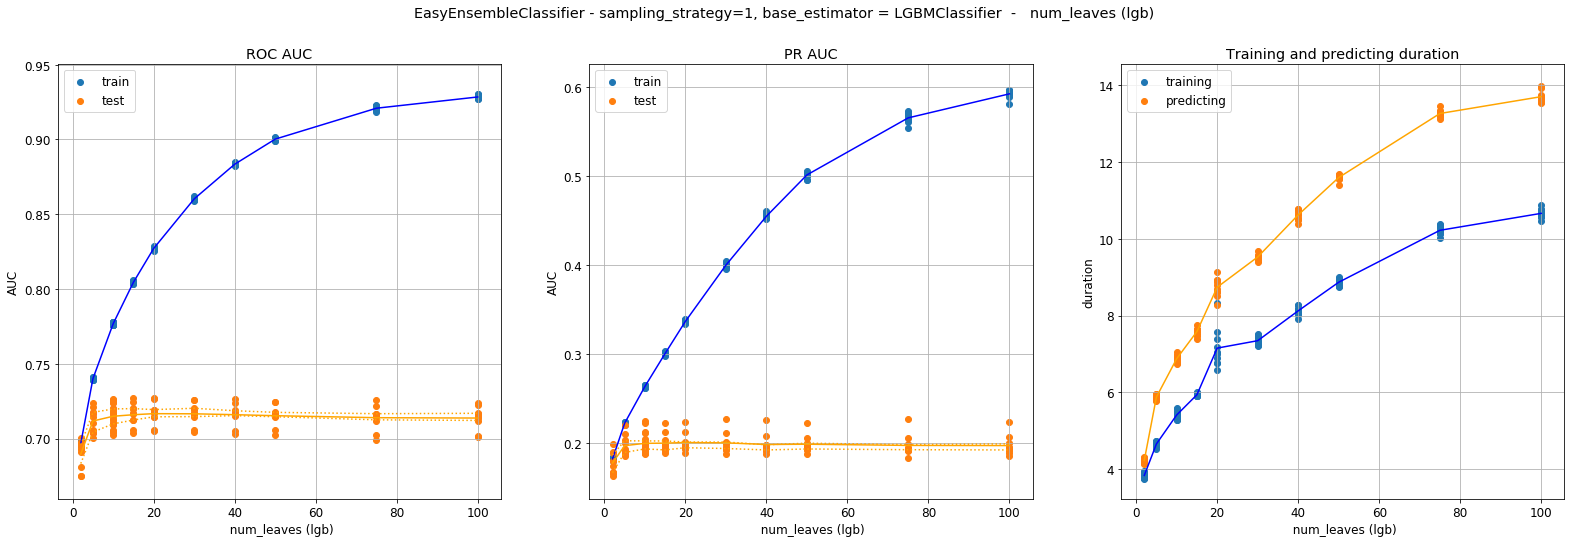

In [22]:
results_tmp = []
lst = [2, 5, 10, 15, 20, 30, 40, 50, 75, 100]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=8, learning_rate=0.1, num_leaves=param_value, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  num_leaves (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## subsample_for_bin de LGBM

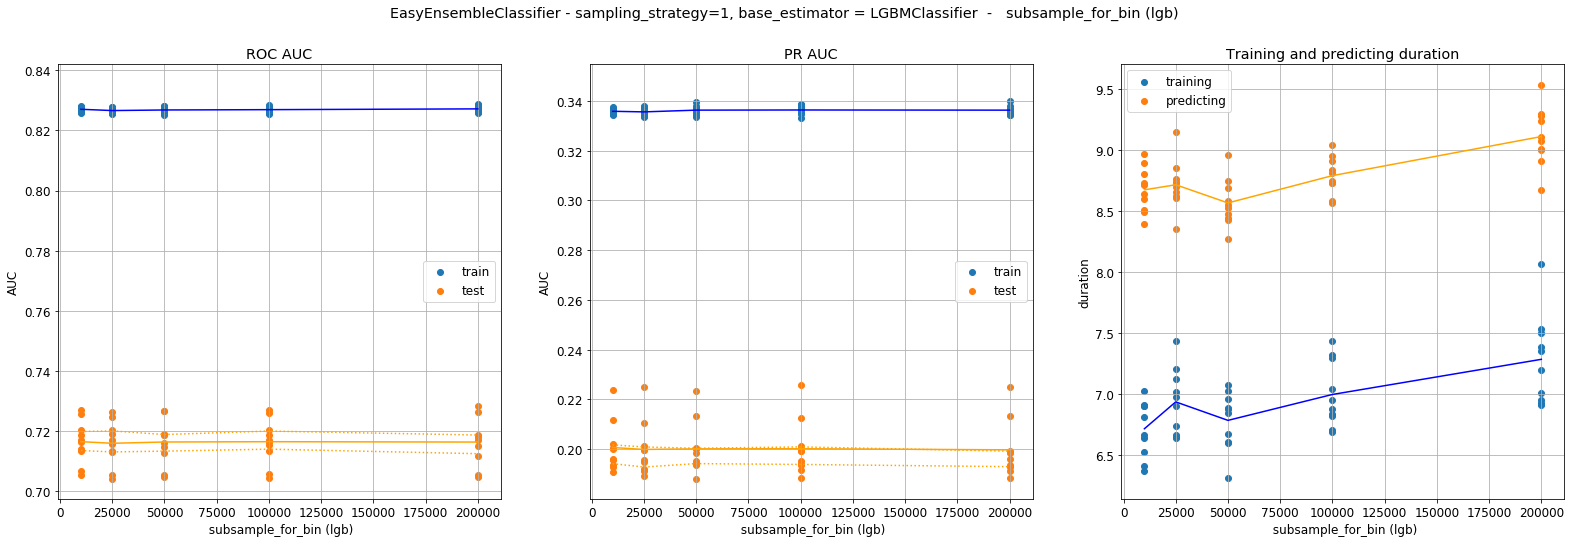

In [24]:
results_tmp = []
lst = [10000, 25000, 50000, 100000, 200000]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=8, learning_rate=0.1, num_leaves=20, subsample_for_bin=param_value, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  subsample_for_bin (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimators de LGBM

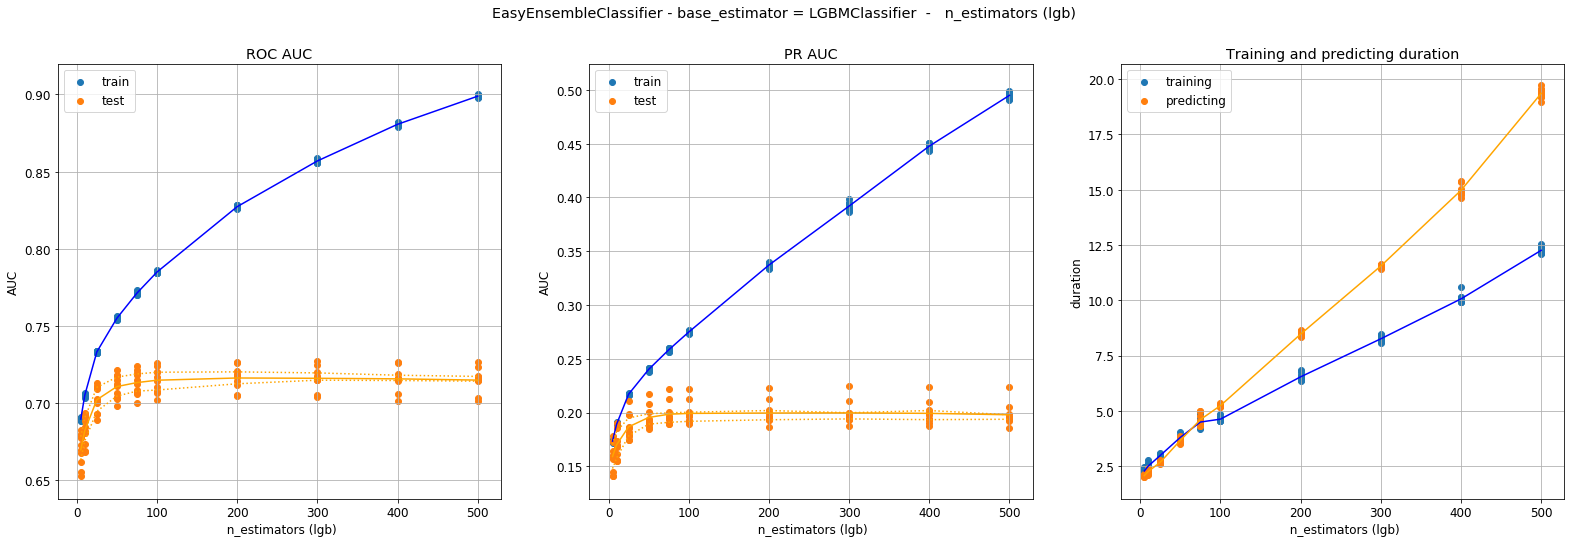

In [27]:
results_tmp = []
lst = [5, 10, 25, 50, 75, 100, 200, 300, 400, 500]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=8, learning_rate=0.1, num_leaves=20, subsample_for_bin=10000, n_estimators=param_value, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - base_estimator = LGBMClassifier |  n_estimators (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## sampling_stategy

0.1
0.25
0.3
0.35
0.4
0.5
0.6
0.75
1


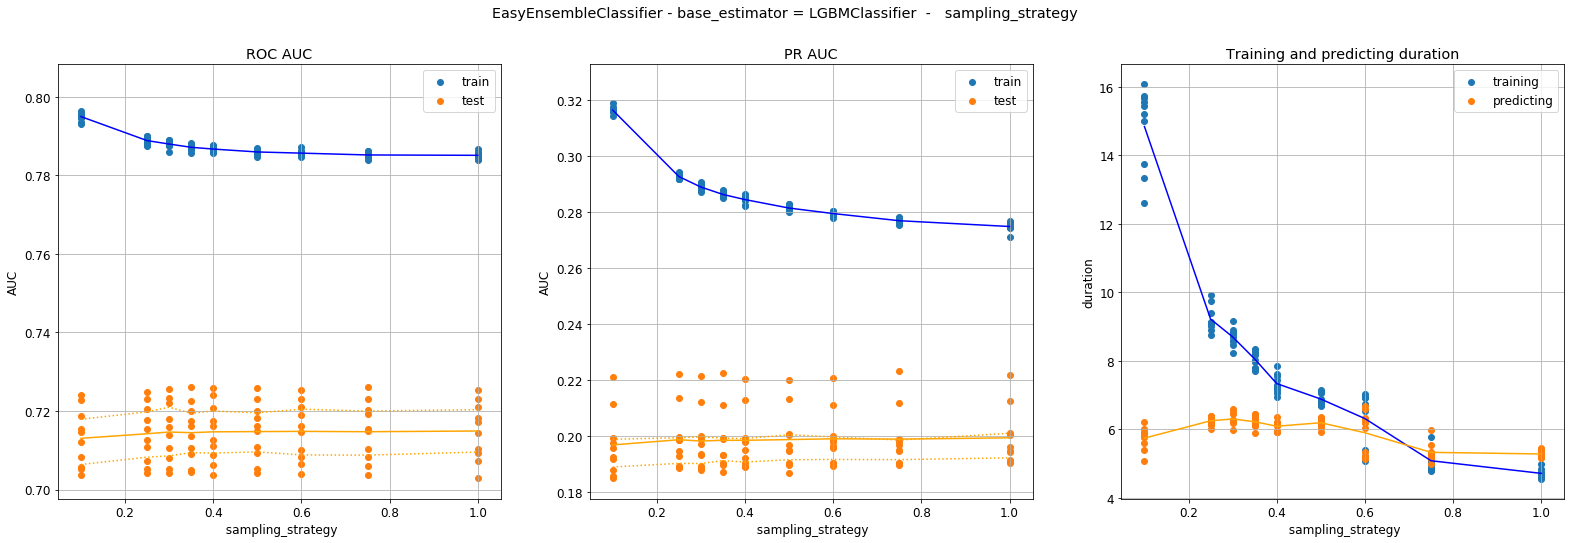

In [28]:
results_tmp = []
lst = [0.1, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.75, 1]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=8, learning_rate=0.1, num_leaves=20, subsample_for_bin=10000, n_estimators=100, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=param_value, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - base_estimator = LGBMClassifier |  sampling_strategy = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimator

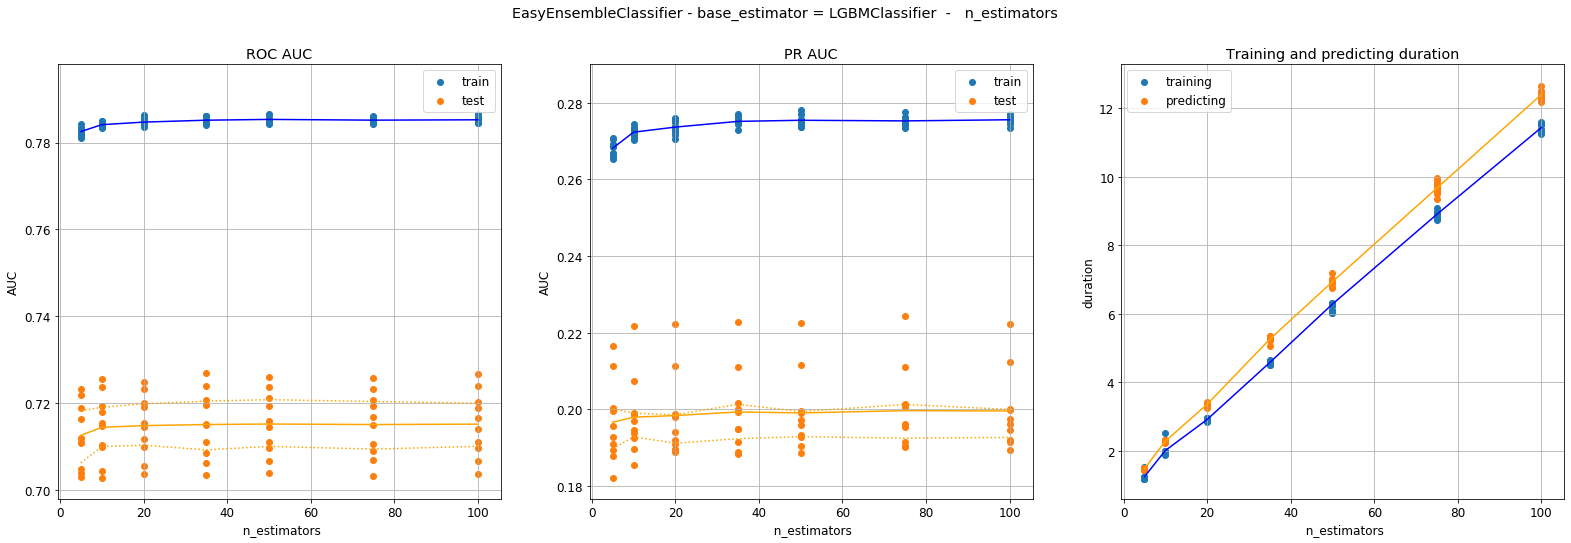

In [30]:
results_tmp = []
lst = [5, 10, 20, 35, 50, 75, 100]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=8, learning_rate=0.1, num_leaves=20, subsample_for_bin=10000, n_estimators=100, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=param_value, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - base_estimator = LGBMClassifier |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## Bilan

In [31]:
base_estimator=LGBMClassifier(max_depth=8, learning_rate=0.1, num_leaves=20, subsample_for_bin=10000, n_estimators=100, n_jobs=-1)
model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
title = 'EasyEnsembleClassifier with LGBMClassifier - full optim 1'
res = evaluate(model=model, title = title, data_transform='XG')
bestmetrics.append(res)
         
pd.concat(bestmetrics).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

title  roc_auc_train  \
0                                      sklearn random forest       0.739543   
1                                   imbalanced random forest       0.790799   
2                                              XGBClassifier       0.777628   
3                                             LGBMClassifier       0.770630   
4                 EasyEnsembleClassifier with LGBMClassifier       0.770058   
5                  EasyEnsembleClassifier with XGBClassifier       0.783024   
6  EasyEnsembleClassifier with LGBMClassifier - full optim 1       0.785065   

   roc_auc_test  pr_auc_train  pr_auc_test  time_train  time_pred  nb_feat  \
0      0.695677      0.213490     0.179433    9.632250   1.271101       50   
1      0.694210      0.270393     0.180969    9.645485   1.206320       50   
2      0.712110      0.286291     0.195463    6.096905   0.486745       50   
3      0.712980      0.277211     0.195775    0.964665   0.494229       50   
4      0.715387      0.253546     0.198863    5.353284   7.165971       50   
5      0.716507      0.268539     0.200038   32.138521   4.394450       50   
6      0.714778      0.275478     0.199041    4.868761   5.227894       50   

   nb_train     timestamp  
0     90000  1.615621e+09  
1     90000  1.615621e+09  
2     90000  1.615621e+09  
3     90000  1.615621e+09  
4     90000  1.615622e+09  
5     90000  1.615622e+09  
6     90000  1.615633e+09

# Optimisation de EasyEnsembleClassifier avec LGBMClassifier - 2

In [12]:
warnings.filterwarnings("ignore")

## max_depth de LGBM

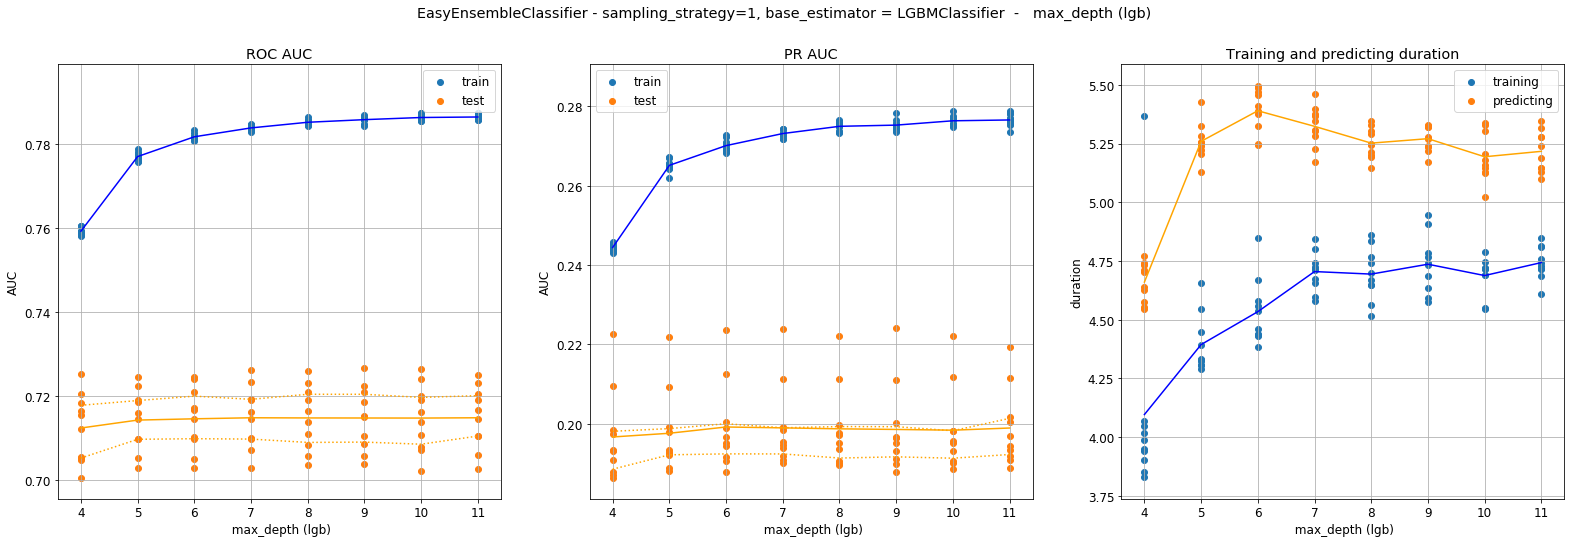

In [34]:
results_tmp = []
lst = [4, 5, 6, 7, 8, 9, 10, 11]

for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=param_value, learning_rate=0.1, num_leaves=10, subsample_for_bin=10000, n_estimators=100, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  max_depth (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## learning_rate de LGBM

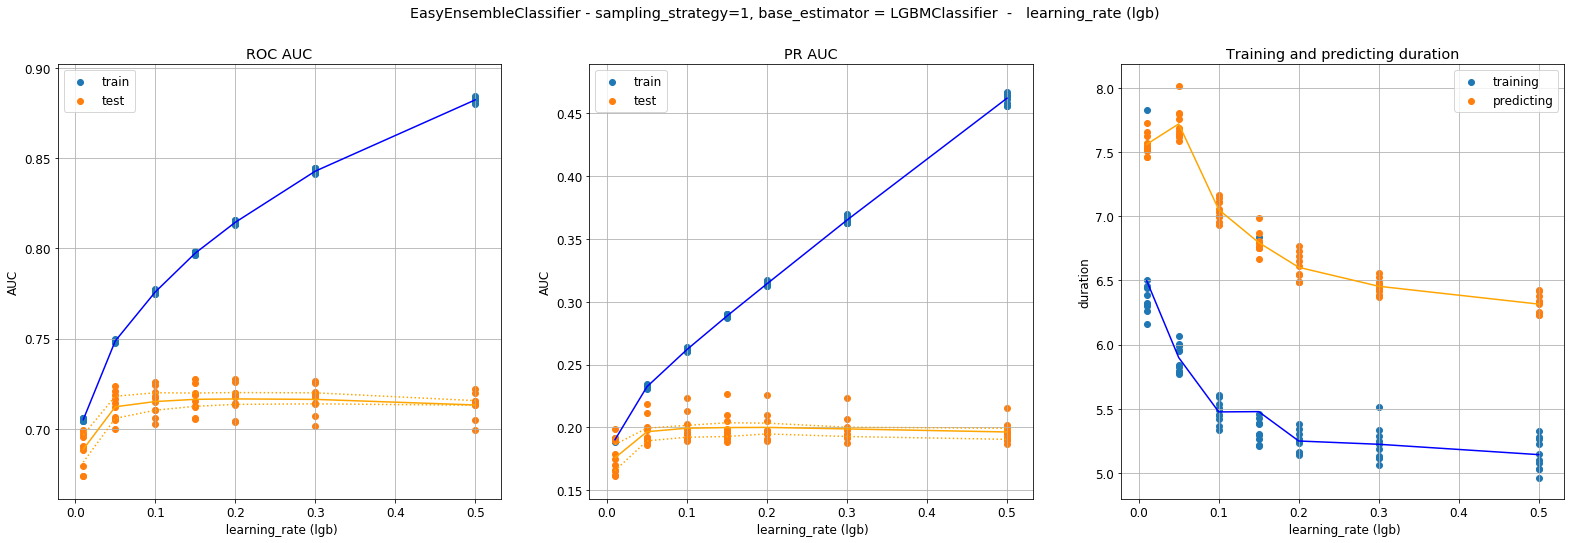

In [40]:
results_tmp = []
lst = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=6, learning_rate=param_value, num_leaves=10, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  learning_rate (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## num_leaves de LGBM

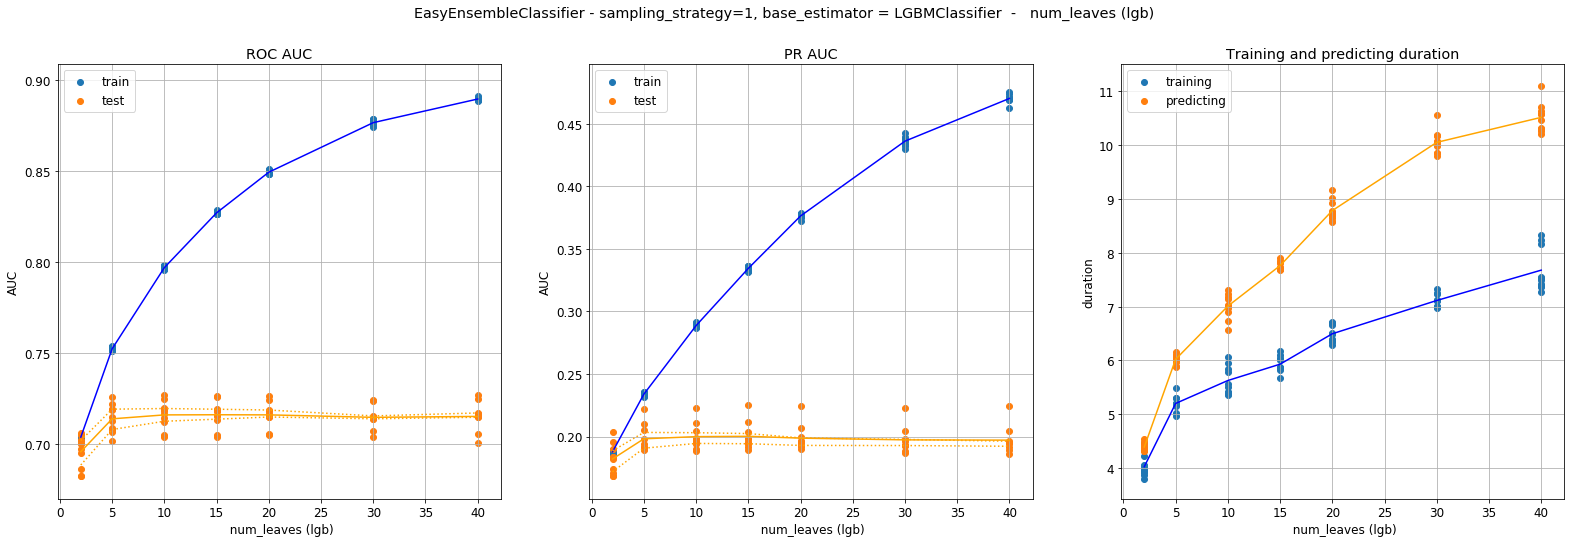

In [42]:
results_tmp = []
lst = [2, 5, 10, 15, 20, 30, 40]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=6, learning_rate=0.15, num_leaves=param_value, subsample_for_bin=25000, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  num_leaves (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## subsample_for_bin de LGBM

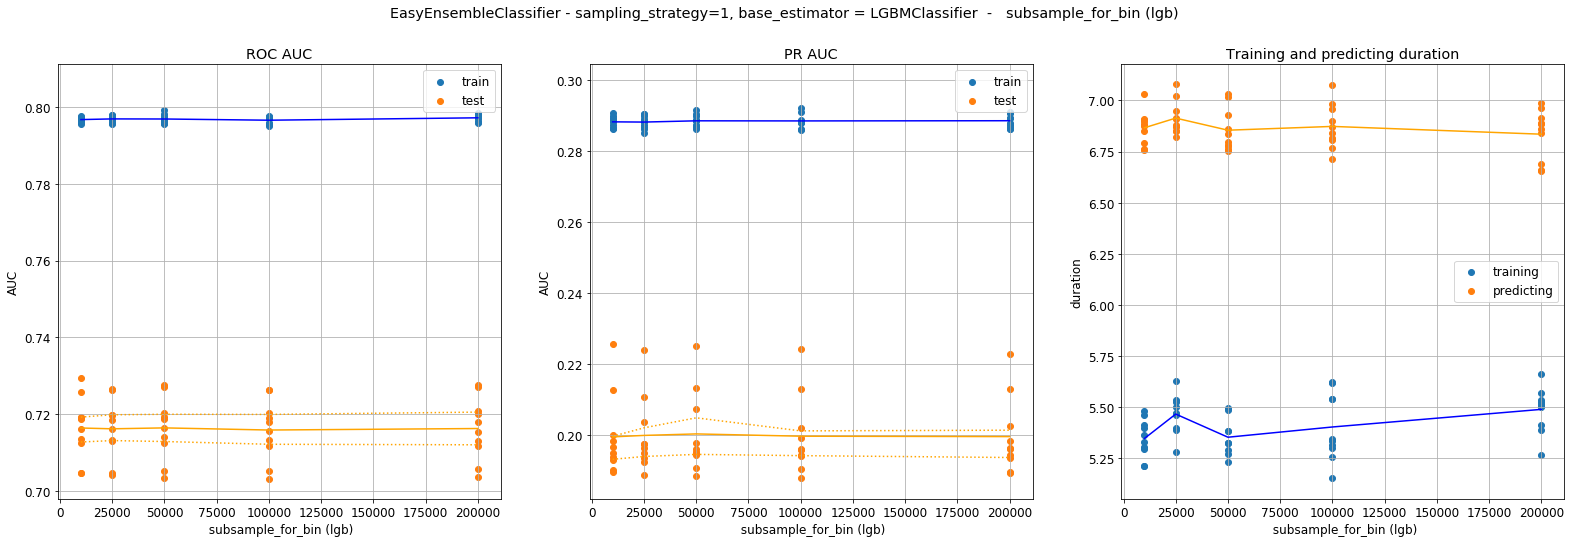

In [45]:
results_tmp = []
lst = [10000, 25000, 50000, 100000, 200000]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=6, learning_rate=0.15, num_leaves=10, subsample_for_bin=param_value, n_estimators=200, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - sampling_strategy=1, base_estimator = LGBMClassifier |  subsample_for_bin (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimators de LGBM

150


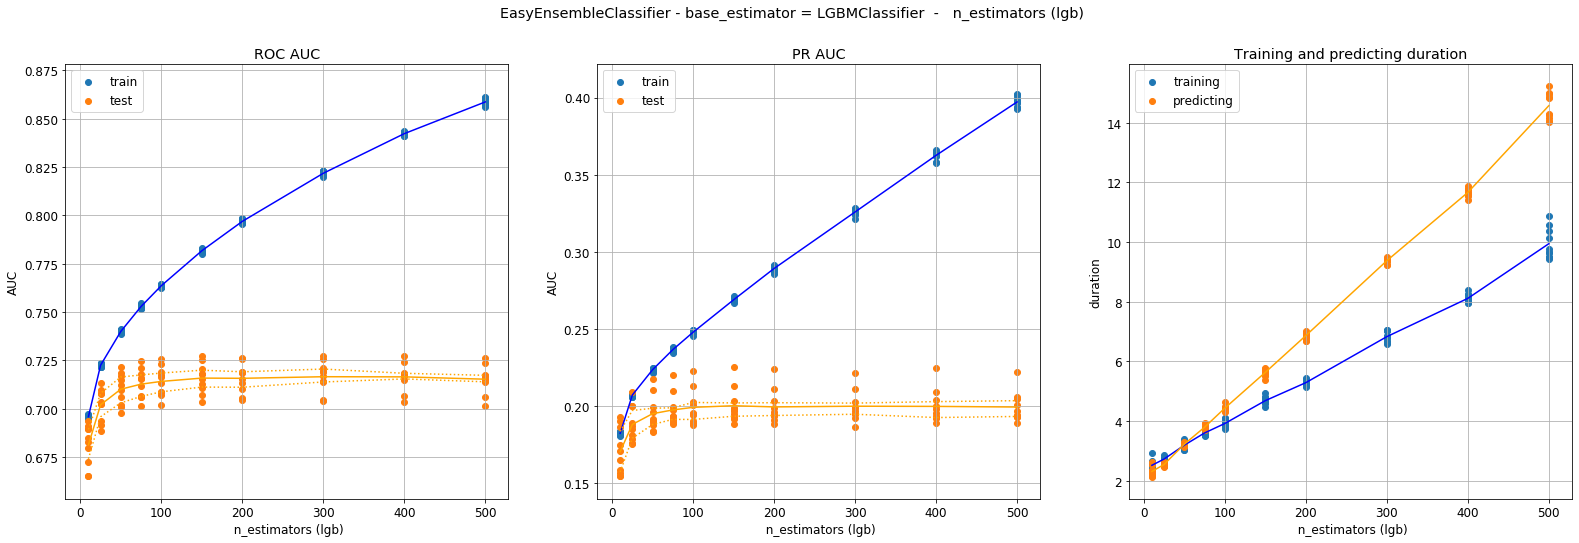

In [48]:
#results_tmp = []
lst = [10, 25, 50, 75, 100, 200, 300, 400, 500]
lst = [150]
for param_value in lst:
    print(param_value)
    base_estimator=LGBMClassifier(max_depth=6, learning_rate=0.15, num_leaves=10, subsample_for_bin=10000, n_estimators=param_value, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - base_estimator = LGBMClassifier |  n_estimators (lgb) = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## sampling_stategy

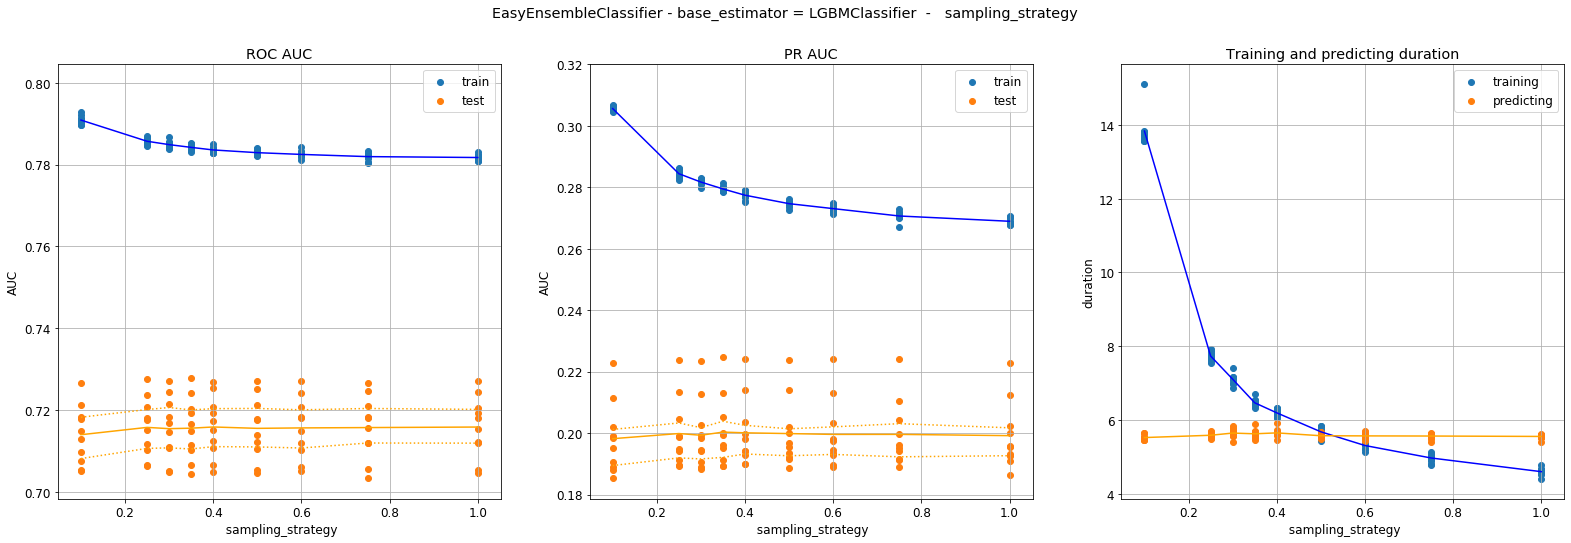

In [52]:
results_tmp = []
lst = [0.1, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.75, 1]
for param_value in lst:
    #print(param_value)
    base_estimator=LGBMClassifier(max_depth=6, learning_rate=0.15, num_leaves=10, subsample_for_bin=10000, n_estimators=150, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=param_value, base_estimator=base_estimator, n_estimators=35, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - base_estimator = LGBMClassifier |  sampling_strategy = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## n_estimator

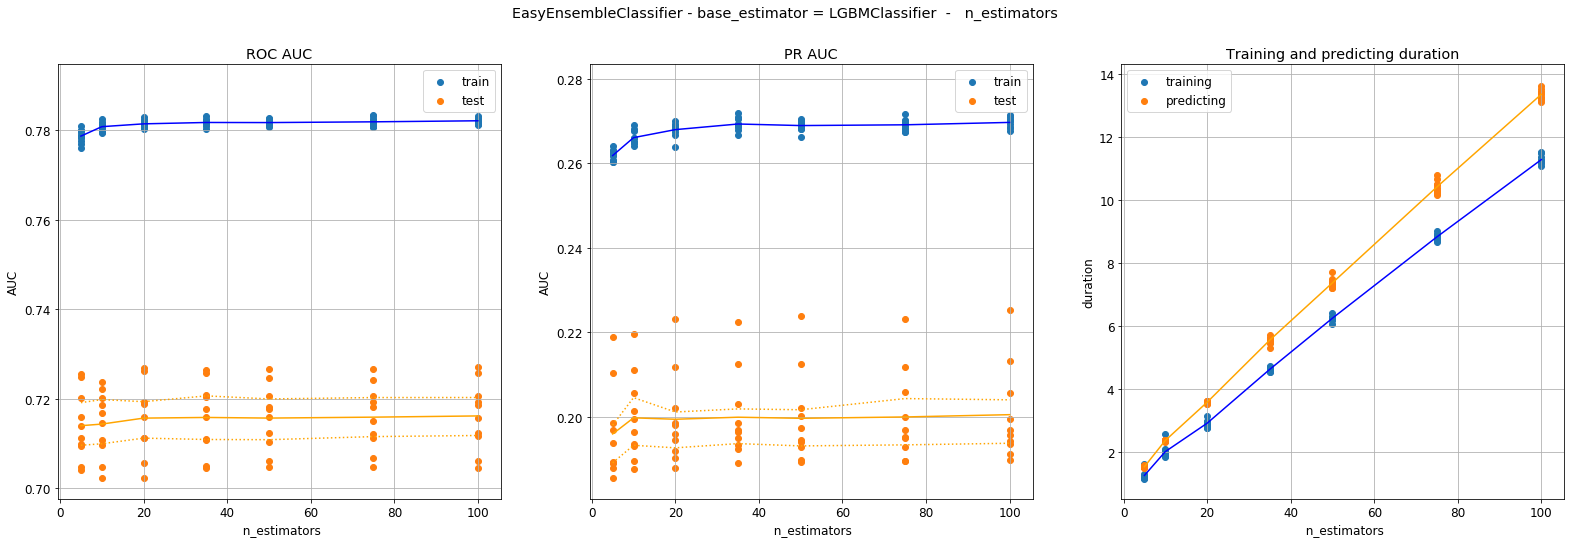

In [53]:
results_tmp = []
lst = [5, 10, 20, 35, 50, 75, 100]
for param_value in lst:
    #print(param_value)
    base_estimator=LGBMClassifier(max_depth=6, learning_rate=0.15, num_leaves=10, subsample_for_bin=10000, n_estimators=150, n_jobs=-1)
    model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=param_value, warm_start=False, n_jobs=-1)
    title = 'EasyEnsembleClassifier - base_estimator = LGBMClassifier |  n_estimators = ' + str(param_value)
    res = evaluate(model=model, title=title, data_transform='XG')
    results_tmp.append(res)
    
displayPlotParamOptim(results_tmp)

results.extend(results_tmp)

## BILAN FINAL

In [97]:
data_transform = 'XG'
bestmetrics = []

model = XGBClassifier(max_depth=2, learning_rate=0.2, eval_metric='aucpr', n_estimators=250)
title = 'XGBClassifier'
bestmetrics.append(evaluate(model, data_transform, title))
         
model = LGBMClassifier(max_depth=4, learning_rate=0.1, num_leaves=8, min_child_samples=200, subsample_for_bin=25000, n_estimators=250, n_jobs=-1)
title = 'LGBMClassifier'
bestmetrics.append(evaluate(model, data_transform, title))

base_estimator=LGBMClassifier(max_depth=6, learning_rate=0.15, num_leaves=10, subsample_for_bin=10000, n_estimators=150, n_jobs=-1)
model = EasyEnsembleClassifier(sampling_strategy=1, base_estimator=base_estimator, n_estimators=20, warm_start=False, n_jobs=-1)
title = 'EasyEnsembleClassifier with LGBMClassifier'
bestmetrics.append(evaluate(model, data_transform, title))

pd.concat(bestmetrics).groupby('title').mean().reset_index().sort_values('timestamp').reset_index(drop=True)

title  roc_auc_train  roc_auc_test  \
0                               XGBClassifier       0.747815      0.712773   
1                              LGBMClassifier       0.765151      0.714272   
2  EasyEnsembleClassifier with LGBMClassifier       0.780918      0.715688   

   pr_auc_train  pr_auc_test  time_train  time_pred  nb_feat  nb_train  \
0      0.238575     0.196105    6.207162   0.519821       50     90000   
1      0.261537     0.197222    1.268498   0.588193       50     90000   
2      0.267265     0.199192    3.063927   3.565809       50     90000   

      timestamp  
0  1.615664e+09  
1  1.615664e+09  
2  1.615664e+09

In [105]:
dfApplicationComplete = load(open('dfApplicationComplete.pkl','rb'))
dfApplicationComplete = shuffleDf(dfApplicationComplete).reset_index(drop=True)
dfApplicationComplete = dfApplicationComplete[list(dfApplication.columns)]

In [104]:
for col in list(dfApplication.columns):
    if col not in dfApplicationComplete.columns:
        print(col)

In [ ]:
results_tmp = []
for r in results:
    if r.title[0].find('LGBMClassifier') >= 0:
        results_tmp.append(r)
displayPlotParamOptim(results_tmp)

In [ ]:
for res in results:
    res.at[res[res.title == 'Sklearn bagging |  bootstrap = False, bootstrap_features=False'].index,'title'] = 'Sklearn bagging |  bootstrap sample/feature = False/False'
    res.at[res[res.title == 'Sklearn bagging |  bootstrap = True, bootstrap_features=False'].index,'title'] = 'Sklearn bagging |  bootstrap sample/feature = True/False'
    res.at[res[res.title == 'Sklearn bagging |  bootstrap = False, bootstrap_features=True'].index,'title'] = 'Sklearn bagging |  bootstrap sample/feature = False/True'
    res.at[res[res.title == 'Sklearn bagging |  bootstrap = True, bootstrap_features=True'].index,'title'] = 'Sklearn bagging |  bootstrap sample/feature = True/True'

In [ ]:
result_tmp = load(open('results_tmp.pkl','rb'))
displayPlotParamOptim(result_tmp, show_quantile=False)
displayPlotParamOptim(result_tmp, show_quantile=True)
displayPlotParamOptimBox(result_tmp)